In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
library(harmony)
library(future)
library(ggplot2)
library(trqwe)
library(unix)
library(readr)
library(reshape2)
library(rmcorr)
library(pheatmap)
library(dplyr)
library(Seurat)
library(data.table)
source("/rds/general/user/emacdona/projects/covid19-transcriptome/live/sc_rnaseq/scripts/functions/glmm_functions_4.R")

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Rcpp

Warning message:
“package ‘readr’ was built under R version 4.1.3”

Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
setwd("/rds/general/user/emacdona/projects/covid19-transcriptome/live/sc_rnaseq/DA/")

In [3]:
data<-mcreadRDS("../all_compartments_qc.rds",mc.core=4)

In [4]:
data

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [5]:
unique(data@meta.data$level_1)
unique(data@meta.data$level_2)


[1] "monocyte" "T reg"    "DC"       "T CD4+"   "NK"       "T CD8+"  
 [7] "RBC"      "B"        "MAIT"     "T g/d"    "B_ASC"    "Platelet"
[13] "HSPC"

[1] "CD14mono"           "T reg"              "CD16mono"          
 [4] "pDC"                "T CD4 Naive"        "NK"                
 [7] "T CD4 Helper"       "T CD8 CTL"          "Int.mono"          
[10] "T CD4 CTL"          "RBC"                "B_ASC_dividing"    
[13] "B_switched_mem"     "NK CD56 bright"     "T CD8 Naive"       
[16] "DC2"                "MAIT"               "T g/d"             
[19] "B_naive"            "NKT"                "T CD8 Mem"         
[22] "B_ASC_IgA"          "Platelet"           "HSPC"              
[25] "B_ASC_IgM"          "B_non-switched_mem" "DC3"               
[28] "B_ASC_IgG"          "DC1"                "T CD4 cycling"     
[31] "B_CD11c"            "T CD8 EMRA"         "ILC"               
[34] "ASDC"               "B_ASC_other"

In [6]:
###################
# Sample numbers for emily
####################

In [7]:
length(unique(data@meta.data$sample_id))
length(unique(data@meta.data$individual_id))
length(unique(data@meta.data$cell_id))

[1] 187

[1] 61

[1] 580040

In [8]:
#############################
# IDs for Lisa
#############################

In [9]:
meta<-data@meta.data

In [10]:
head(meta)
dim(meta)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,nCount_ADT_raw,nFeature_ADT_raw,nCount_RNA_raw,nFeature_RNA_raw,soupxOnAdt,⋯,level_1,level_2,level_3,level_4,individual_id,new_ethnicity,corrected_ethnicity,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,percent.mt
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1,UK-CIC10689738+UK-CIC10690026,3937.575,1515,1011.6940,77,2336,134,3971,1516,Pass,⋯,monocyte,CD14mono,CD14mono,CD14mono_activated,C103,asian,European,8.366688,-5.166119,2.5048235
UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1,UK-CIC10689738+UK-CIC10690026,2816.496,1262,1609.0283,73,3943,135,2861,1267,Pass,⋯,T reg,T reg,T reg,NA,C103,asian,European,8.366688,-5.166119,1.3885478
UK-CIC10689738+UK-CIC10690026_AAACCTGCATAACCTG-1,UK-CIC10689738+UK-CIC10690026,3076.052,1488,1750.8023,52,3703,134,3120,1495,Pass,⋯,T reg,T reg,T reg,NA,C103,asian,European,8.366688,-5.166119,0.2383921
UK-CIC10689738+UK-CIC10690026_AAACCTGCATCCCACT-1,UK-CIC10689738+UK-CIC10690026,4774.949,1805,1588.0786,61,3705,134,4881,1813,Pass,⋯,monocyte,CD16mono,CD16mono,CD16mono,C103,asian,European,8.366688,-5.166119,3.2076260
UK-CIC10689738+UK-CIC10690026_AAACCTGGTACGAAAT-1,UK-CIC10689738+UK-CIC10690026,2531.823,1168,1900.5158,66,3646,134,2550,1168,Pass,⋯,monocyte,CD14mono,CD14mono,CD14mono_activated,C103,asian,European,8.366688,-5.166119,3.4829463
UK-CIC10689738+UK-CIC10690026_AAACCTGGTAGCTAAA-1,UK-CIC10689738+UK-CIC10690026,7137.348,2567,909.4013,83,2203,133,7271,2570,Pass,⋯,DC,pDC,pDC,pDC,C103,asian,European,8.366688,-5.166119,1.5348994


[1] 580040    172

In [11]:
"cell_id"%in%names(meta)

[1] TRUE

In [12]:
out<-meta[,c("individual_id","sample_id","cell_id","centre")]


In [13]:
head(out)
dim(out)

,individual_id,sample_id,cell_id,centre
,<chr>,<chr>,<chr>,<chr>
UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1,C103,C103_2204,UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1,NCL
UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1,C103,C103_2204,UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1,NCL
UK-CIC10689738+UK-CIC10690026_AAACCTGCATAACCTG-1,C103,C103_2204,UK-CIC10689738+UK-CIC10690026_AAACCTGCATAACCTG-1,NCL
UK-CIC10689738+UK-CIC10690026_AAACCTGCATCCCACT-1,C103,C103_2204,UK-CIC10689738+UK-CIC10690026_AAACCTGCATCCCACT-1,NCL
UK-CIC10689738+UK-CIC10690026_AAACCTGGTACGAAAT-1,C103,C103_2204,UK-CIC10689738+UK-CIC10690026_AAACCTGGTACGAAAT-1,NCL
UK-CIC10689738+UK-CIC10690026_AAACCTGGTAGCTAAA-1,C103,C103_2204,UK-CIC10689738+UK-CIC10690026_AAACCTGGTAGCTAAA-1,NCL


[1] 580040      4

In [14]:
length(unique(out$cell_id))
length(unique(out$individual_id))
length(unique(out$sample_id))

[1] 580040

[1] 61

[1] 187

In [15]:
unique(out$individual_id)

[1] "C103" "C123" "C214" "C40"  "C42"  "C124" "C104" "C126" "C106" "C127"
[11] "C134" "C128" "C142" "C132" "C152" "C161" "C20"  "C164" "C21"  "C167"
[21] "C23"  "C31"  "C193" "C195" "C34"  "C36"  "C196" "C93"  "C224" "C197"
[31] "C212" "C113" "C234" "C60"  "C237" "C63"  "C238" "C240" "C65"  "C246"
[41] "C73"  "C251" "C82"  "C69"  "C85"  "C108" "C137" "C58"  "C138" "C101"
[51] "C140" "C145" "C141" "C146" "C147" "C168" "C169" "C170" "C187" "C190"
[61] "C33"

In [16]:
length(unique(out[out$centre=="Cambridge","individual_id"]))

[1] 16

In [10]:
getwd()

[1] "/rds/general/project/covid19-transcriptome/live/sc_rnaseq/DA"

In [19]:
write.table(out,"final_object_subjects.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [17]:
names(out)

[1] "individual_id" "sample_id"     "cell_id"       "centre"

In [18]:
names(meta)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "nCount_ADT"                         
  [5] "nFeature_ADT"                       
  [6] "nCount_ADT_raw"                     
  [7] "nFeature_ADT_raw"                   
  [8] "nCount_RNA_raw"                     
  [9] "nFeature_RNA_raw"                   
 [10] "soupxOnAdt"                         
 [11] "soupxOnRna"                         
 [12] "percentMito"                        
 [13] "exclude"                            
 [14] "centre"                             
 [15] "pool"                               
 [16] "tcrId"                              
 [17] "bcrId"                              
 [18] "celltypist_broad_predLabel"         
 [19] "celltypist_broad_maxPredProb"       
 [20] "haniffa_broad_predLabel"            
 [21] "haniffa_broad_maxPredProb"          
 [22] "yoshida_broad_predLabel"            
 [23] "yoshida_broad_maxPredProb"          
 [24] "celltypist_detailed_predLabel"      
 [25] "celltypist_detailed_maxPredProb"    
 [26] "yoshida_detailed_predLabel"         
 [27] "yoshida_detailed_maxPredProb"       
 [28] "seurat_clusters"                    
 [29] "RNA_sequencing_saturation"          
 [30] "pool_factor"                        
 [31] "RNA_readsConfidentlyOnTranscriptome"
 [32] "RNA_readsConfidentlyOnGenome"       
 [33] "RNA_readsOnGenome"                  
 [34] "RNA_Q30readsBarcode"                
 [35] "RNA_Q30readsRead"                   
 [36] "RNA_Q30readsUmi"                    
 [37] "rna_snn_res.4"                      
 [38] "rna_snn_res.0.5"                    
 [39] "rna_snn_res.0.1"                    
 [40] "harmony_snn_res.4"                  
 [41] "yoshida_broad_predLabel_majorVote"  
 [42] "harmony_snn_res.0.5"                
 [43] "harmony_snn_res.0.1"                
 [44] "cell_type_compartment"              
 [45] "pool_number"                        
 [46] "merged_souporcell_cluster"          
 [47] "merged_souporcell_status"           
 [48] "patient_id"                         
 [49] "sample_id"                          
 [50] "multi_chain_bcr"                    
 [51] "IR_VJ_1_locus_bcr"                  
 [52] "IR_VJ_2_locus_bcr"                  
 [53] "IR_VDJ_1_locus_bcr"                 
 [54] "IR_VDJ_2_locus_bcr"                 
 [55] "IR_VJ_1_cdr3_bcr"                   
 [56] "IR_VJ_2_cdr3_bcr"                   
 [57] "IR_VDJ_1_cdr3_bcr"                  
 [58] "IR_VDJ_2_cdr3_bcr"                  
 [59] "IR_VJ_1_cdr3_nt_bcr"                
 [60] "IR_VJ_2_cdr3_nt_bcr"                
 [61] "IR_VDJ_1_cdr3_nt_bcr"               
 [62] "IR_VDJ_2_cdr3_nt_bcr"               
 [63] "IR_VJ_1_expr_bcr"                   
 [64] "IR_VJ_2_expr_bcr"                   
 [65] "IR_VDJ_1_expr_bcr"                  
 [66] "IR_VDJ_2_expr_bcr"                  
 [67] "IR_VJ_1_expr_raw_bcr"               
 [68] "IR_VJ_2_expr_raw_bcr"               
 [69] "IR_VDJ_1_expr_raw_bcr"              
 [70] "IR_VDJ_2_expr_raw_bcr"              
 [71] "IR_VJ_1_v_gene_bcr"                 
 [72] "IR_VJ_2_v_gene_bcr"                 
 [73] "IR_VDJ_1_v_gene_bcr"                
 [74] "IR_VDJ_2_v_gene_bcr"                
 [75] "IR_VJ_1_d_gene_bcr"                 
 [76] "IR_VJ_2_d_gene_bcr"                 
 [77] "IR_VDJ_1_d_gene_bcr"                
 [78] "IR_VDJ_2_d_gene_bcr"                
 [79] "IR_VJ_1_j_gene_bcr"                 
 [80] "IR_VJ_2_j_gene_bcr"                 
 [81] "IR_VDJ_1_j_gene_bcr"                
 [82] "IR_VDJ_2_j_gene_bcr"                
 [83] "IR_VJ_1_c_gene_bcr"                 
 [84] "IR_VJ_2_c_gene_bcr"                 
 [85] "IR_VDJ_1_c_gene_bcr"                
 [86] "IR_VDJ_2_c_gene_bcr"                
 [87] "IR_VJ_1_junction_ins_bcr"           
 [88] "IR_VJ_2_junction_ins_bcr"           
 [89] "IR_VDJ_1_junction_ins_bcr"          
 [90] "IR_VDJ_2_junction_ins_bcr"          
 [91] "has_ir_bcr"                        

In [19]:
out2<-meta[,c(
'patient_id',
'sample_id',
'centre',
'ethnicity',
'sex',
'calc_age',
'ihd',
'previous_vte',
'copd',
'diabetes',
'smoking',
'cause_eskd',
'renal_status',
'WHO_severity',
'admission_date',
'discharge_date',
'fatal_disease',
'case_control',
'date_positive_swab',
'date_first_symptoms',
'radiology_evidence_covid',
'sample_date',
'temp_WCC',
'temp_neut',
'temp_mono',
'temp_lymph',
'temp_CRP',
'temp_ddimer',
'temp_ferritin',
'temp_trop',
'WHO_temp_severity',
'individual_id',
'new_ethnicity',
'corrected_ethnicity',
'PC1_nonafricanVsAfrican',
'PC2_asianVsEuropean')]

In [20]:
head(out2)
dim(out2)

,patient_id,sample_id,centre,ethnicity,sex,calc_age,ihd,previous_vte,copd,diabetes,⋯,temp_CRP,temp_ddimer,temp_ferritin,temp_trop,WHO_temp_severity,individual_id,new_ethnicity,corrected_ethnicity,PC1_nonafricanVsAfrican,PC2_asianVsEuropean
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1,C103,C103_2204,NCL,asian,M,66,no,no,no,yes.T2,⋯,NA,NA,NA,NA,NA,C103,asian,European,8.366688,-5.166119
UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1,C103,C103_2204,NCL,asian,M,66,no,no,no,yes.T2,⋯,NA,NA,NA,NA,NA,C103,asian,European,8.366688,-5.166119
UK-CIC10689738+UK-CIC10690026_AAACCTGCATAACCTG-1,C103,C103_2204,NCL,asian,M,66,no,no,no,yes.T2,⋯,NA,NA,NA,NA,NA,C103,asian,European,8.366688,-5.166119
UK-CIC10689738+UK-CIC10690026_AAACCTGCATCCCACT-1,C103,C103_2204,NCL,asian,M,66,no,no,no,yes.T2,⋯,NA,NA,NA,NA,NA,C103,asian,European,8.366688,-5.166119
UK-CIC10689738+UK-CIC10690026_AAACCTGGTACGAAAT-1,C103,C103_2204,NCL,asian,M,66,no,no,no,yes.T2,⋯,NA,NA,NA,NA,NA,C103,asian,European,8.366688,-5.166119
UK-CIC10689738+UK-CIC10690026_AAACCTGGTAGCTAAA-1,C103,C103_2204,NCL,asian,M,66,no,no,no,yes.T2,⋯,NA,NA,NA,NA,NA,C103,asian,European,8.366688,-5.166119


[1] 580040     36

In [21]:
out3<-out2 %>% distinct()

In [22]:
head(out3)
dim(out3)

,patient_id,sample_id,centre,ethnicity,sex,calc_age,ihd,previous_vte,copd,diabetes,⋯,temp_CRP,temp_ddimer,temp_ferritin,temp_trop,WHO_temp_severity,individual_id,new_ethnicity,corrected_ethnicity,PC1_nonafricanVsAfrican,PC2_asianVsEuropean
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1,C103,C103_2204,NCL,asian,M,66,no,no,no,yes.T2,⋯,NA,NA,NA,NA,NA,C103,asian,European,8.366688,-5.166119
UK-CIC10689738+UK-CIC10690026_AAACCTGGTTGAACTC-1,C123,C123_0505,NCL,asian,M,66,yes.stent,no,no,yes.T2,⋯,64.1,2908,3125,23,moderate,C123,asian,Asian,6.961038,12.203095
UK-CIC10689740+UK-CIC10690028_AAACCTGAGACCCACC-1,C214,C214_2705,NCL,white,F,68,yes.no.intervention,no,no,no,⋯,NA,NA,NA,NA,NA,C214,white,European,-4.285705,-11.177220
UK-CIC10689740+UK-CIC10690028_AAACCTGAGCTAACTC-1,C40,C40_0105,NCL,black,M,57,unknown,no,no,yes.T2,⋯,92.5,3524,3440,37,critical,C40,black,African,-81.661885,-14.729245
UK-CIC10689740+UK-CIC10690028_AAACCTGAGGTGCTTT-1,C42,C42_1504,NCL,white,M,40,no,no,no,yes.T2,⋯,NA,NA,NA,NA,moderate,C42,white,European,9.102418,-7.881571
UK-CIC10689742+UK-CIC10690030_AAACCTGAGCGTAATA-1,C123,C123_2404,NCL,asian,M,66,yes.stent,no,no,yes.T2,⋯,106.5,NA,NA,NA,severe,C123,asian,Asian,6.961038,12.203095


[1] 187  36

In [28]:
write.table(out3,"final_subjects_metadata.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [23]:
length(unique(out3$sample_id))
length(unique(out3$individual_id))

[1] 187

[1] 61

In [28]:
df<-data.frame(table(out3$individual_id,useNA="always"))

In [29]:
head(df)
dim(df)
dim(out3)

,Var1,Freq
,<fct>,<int>
1,C101,6
2,C103,1
3,C104,1
4,C106,1
5,C108,4
6,C113,3


[1] 62  2

[1] 187  36

In [30]:
median(df$Freq)

[1] 3

In [ ]:
################################

In [7]:
####################
# Level 1
####################

In [8]:
unique(data@meta.data$level_1)

[1] "monocyte" "T reg"    "DC"       "T CD4+"   "NK"       "T CD8+"  
 [7] "RBC"      "B"        "MAIT"     "T g/d"    "B_ASC"    "Platelet"
[13] "HSPC"

In [9]:
"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

[1] FALSE

[1] FALSE

In [10]:
unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])

character(0)

In [11]:
#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

In [12]:
data1<-subset(data1,subset=sample_id!="C141_090321")

In [13]:
"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

[1] FALSE

[1] FALSE

In [14]:
data
data1

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [15]:
#
abundances<-table(data1@meta.data$level_1,data1@meta.data$sample_id)

In [15]:
abundances<-unclass(abundances)

In [16]:
data<-as.SingleCellExperiment(data1)

In [17]:
data

class: SingleCellExperiment 
dim: 32913 580040 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(580040): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(173): orig.ident nCount_RNA ... percent.mt ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [18]:
sce<-data

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age


In [19]:
min_cells<-10
ncpus<-8

In [20]:
# Remove samples with less than 10 cells
nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
rm_ids<-c("C116","C139")
sce1 <- sce[, !sce$sample_id %in% rmSamples & !sce$individual_id %in% rm_ids]


In [21]:
# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))
smrzd <- smrzd[, smrzd$case_control == "POSITIVE"]


In [22]:
#head(colData(smrzd))
dim(colData(smrzd))

[1] 139 180

In [23]:
dim(abundances)

[1]  13 187

In [24]:
colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

[1] "C101_250221" "C103_2204"   "C104_2204"   "C106_2204"   "C108_220420"
 [6] "C134_2904"   "C137_250221" "C137_300420" "C138_300420" "C140_110321"
[11] "C140_300420" "C142_3004"   "C145_300420" "C146_250221" "C146_300420"
[16] "C147_300420" "C152_0405"   "C161_1105"   "C164_1105"   "C167_1205"  
[21] "C168_040321" "C168_120520" "C168_260121" "C169_040321" "C169_120520"
[26] "C170_040321" "C170_120520" "C187_250221" "C187_260520" "C190_090321"
[31] "C190_260520" "C193_2605"   "C195_2605"   "C196_2605"   "C197_2605"  
[36] "C212_2705"   "C214_2705"   "C224_2805"   "C234_2805"   "C237_2805"  
[41] "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"   "C58_100321" 
[46] "C58_160420"  "C69_1804"    "C85_2004"

In [25]:
#abundances[,"C168_260121"]

In [26]:
abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]


In [27]:
dim(abundances)

[1]  13 139

In [28]:
y <- DGEList(counts = abundances, samples = colData(smrzd))


In [29]:
#head(y)

In [30]:
y1 <- setupDGElist(y, "WHO_temp_severity_group", remove = "NA") # use grouped_temp_severity later

In [31]:
table(y1$samples$WHO_temp_severity_group, y1$samples$individual_id)
table(y1$samples$WHO_temp_severity_group, y1$samples$centre)
table(y1$samples$WHO_temp_severity_group, y1$samples$sex)
table(y1$samples$WHO_temp_severity_group, y1$samples$corrected_ethnicity)


                 
                  C101 C108 C113 C123 C124 C126 C127 C128 C132 C137 C138 C140
  mild_moderate      2    3    1    1    3    3    3    3    3    2    6    6
  severe_critical    3    0    2    2    0    0    0    0    0    0    0    0
                 
                  C141 C145 C146 C147 C168 C169 C170 C187 C190 C20 C21 C23 C31
  mild_moderate      4    3    5    1    4    5    6    5    6   3   1   3   3
  severe_critical    1    2    1    4    0    0    0    0    0   0   2   0   0
                 
                  C33 C34 C36 C40 C42 C58 C60 C63 C65 C73 C82 C93
  mild_moderate     2   3   3   2   3   5   3   3   1   2   2   3
  severe_critical   2   0   0   1   0   0   0   0   2   0   0   0

                 
                  Cambridge NCL
  mild_moderate          65  52
  severe_critical        13   9

                 
                   F  M
  mild_moderate   48 69
  severe_critical  4 18

                 
                  African Asian European
  mild_moderate        12    68       37
  severe_critical       2    16        4

In [16]:
testDGElist_DA <- function(dgelist, formula, individual_id, modified = FALSE, optimizer = "bobyqa",
    designMatrix = NULL, ncores = NULL, BPPARAM = SerialParam(progress = TRUE), tpm = FALSE,
    ...) {
    if (is.null(ncores)) {
        NCORES <- parallel::detectCores() - 1
    } else {
        NCORES <- ncores
    }
    # Norm
    #dgelist <- calcNormFactors(dgelist)
    #sizeFactors <- dgelist$samples$lib.size * dgelist$samples$norm.factors
    disp <- suppressMessages(setNames(edgeR::estimateDisp(dgelist,abundance.trend=FALSE)$tagwise.dispersion,
            rownames(dgelist)))  # Estimate Dispersion
    if (modified) {
        results <- suppressMessages(glmm_modified_DA(dgelist, modelFormula = formula,
            dispersion = disp, id = individual_id, control = glmerControl(optimizer = optimizer,
                optCtrl = list(maxfun = 2e+05)),  ...)) #BPPARAM = BPPARAM,
        results <- glmm_qval(results, pi0 = 1)
    }
    return(results)
}

run_glmm_DA <- function(data, geneList, fullFormula, control, offset, ...) {
    data[, "count"] <- as.numeric(geneList$y)
    fit <- lme4::glmer(fullFormula, data = data, control = control, offset = offset,
        family = MASS::negative.binomial(theta = 1/geneList$dispersion), ...)
    if (class(fit) != "try-error") {
        stats <- setNames(c(geneList$dispersion, AIC(fit), as.numeric(logLik(fit))),
            c("Dispersion", "AIC", "logLik"))
        fixedEffects <- lme4::fixef(fit)
        wald <- try(car::Anova(fit), silent = TRUE)
        if (class(wald) != "try-error") {
            waldtest <- setNames(c(wald[, "Chisq"], wald[, "Pr(>Chisq)"]), c(paste0("Chisq_",
                rownames(wald)), paste0("P_", rownames(wald))))
            singular <- as.numeric(isSingular(fit))
            conv <- length(slot(fit, "optinfo")$conv$lme4$messages)
            return(list(stats = c(stats, fixedEffects, waldtest), fit = fit, optinfo = c(singular,
                conv), tryErrors = ""))
        } else {
            return(list(stats = NA, fit = NA, optinfo = NA, tryErrors = wald[1]))
        }
    } else {
        return(list(stats = NA, fit = NA, optinfo = NA, tryErrors = fit[1]))
    }
}

glmm_modified_DA <- function(dgeList, modelFormula, id, dispersion,sizeFactors = NULL,
    control = glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05)),
     verbose = TRUE, cores = 1, ...) { #BPPARAM = SerialParam(progress = TRUE),
    metadata <- dgeList$samples
    countdata <- dgeList$counts
    ids <- as.character(metadata[, id])
    # Manipulate formulae
    reducedFormula <- nobars(modelFormula)
    designMatrix <- model.matrix(reducedFormula, data = dgeList$samples)
    fullFormula <- update.formula(modelFormula, count ~ ., simplify = FALSE)
    # Check numbers and alignment
    if (!all(rownames(countdata) %in% names(dispersion), nrow(countdata))) {
        stop("Dispersion length must match nrow in countdata")
    }
    if (!is.null(sizeFactors))
        offset <- log(sizeFactors) else offset <- NULL
    if (verbose)
        cat(paste0("\nn = ", length(ids), " samples, ", length(unique(ids)), " individuals\n"))
    start <- Sys.time()
    fullList <- lapply(rownames(countdata), function(i) {
        list(y = countdata[i, ], dispersion = dispersion[i])
    })
    resultList <- pbmclapply(fullList, function(geneList) {
        try(run_glmm_DA(data = metadata, geneList = geneList, fullFormula = fullFormula,
            control = control, offset = offset,...), silent = TRUE)
    }, mc.cores = cores) #BPPARAM = BPPARAM
    # Print timing if verbose
    end <- Sys.time()
    if (verbose)
        print(end - start)
    # Output
    names(resultList) <- rownames(countdata)
    # any failed?
    if (any(lapply(resultList, length) < 4)) {
        failed <- names(which(lapply(resultList, length) < 4))
        errormsg <- lapply(resultList[failed], function(x) x[1])
        resultList <- resultList[-which(lapply(resultList, length) < 4)]
    }
    noErr <- vapply(resultList, function(x) x$tryErrors == "", FUN.VALUE = TRUE)
    if (length(which(noErr)) == 0) {
        stop("All genes returned an error. Check sufficient data in each group")
    }
    if (sum(!noErr) != 0) {
        if (verbose) {
            if (length(failed) > 0) {
                cat(paste0("Errors in ", sum(!noErr, length(failed)), " gene(s):",
                  paste0(c(names(noErr)[!noErr], failed), collapse = ", ")))
            } else {
                cat(paste0("Errors in ", sum(!noErr), " gene(s):", paste0(names(noErr)[!noErr],
                  collapse = ", ")))
            }
        }
        outputErrors <- vapply(resultList[!noErr], function(x) {
            x$tryErrors
        }, FUN.VALUE = c("test"))
        if (length(failed > 0)) {
            outputErrors <- c(outputErrors, errormsg)
        }
    } else {
        outputErrors <- c("No errors")
    }
    optInfo <- t(vapply(resultList[noErr], function(x) {
        setNames(x$optinfo, c("Singular", "Conv"))
    }, FUN.VALUE = c(1, 1)))
    nCheat <- resultList[noErr][[1]]$stats
    s <- t(vapply(resultList[noErr], function(x) {
        x$stats
    }, FUN.VALUE = rep(1, length(nCheat))))
    return(list(stats = s, fit = resultList, optInfo = optInfo, errors = outputErrors))
}


In [33]:
res1 <- testDGElist_DA(y1,
            formula = as.formula("~ WHO_temp_severity_group + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)


n = 139 samples, 37 individuals
Time difference of 5.672848 secs

q_WHO_temp_severity_group
-------------------------
Not Significant     Significant 
             10               3 

q_sex
-----
Not Significant     Significant 
              9               4 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant     Significant 
             12               1 

q_PC2_asianVsEuropean
---------------------
Not Significant 
             13 

q_age_scaled
------------
Not Significant     Significant 
              8               5 

q_centre
--------
Not Significant     Significant 
              5               8 


In [34]:
head(res1$stats)

,Dispersion,AIC,logLik,(Intercept),WHO_temp_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_WHO_temp_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.6670269,1831.1038,-906.5519,5.1349479,-0.04118897,0.20171237,0.003317163,0.011676993,-0.50180761,0.2944173,⋯,0.478807273,0.046186321,3.315214e-05,2.077967e-01,0.93000260,7.439133e-01,0.68483695,0.20068420,1.436593e-04,2.455779e-01
B_ASC,1.9136873,1131.3963,-556.6982,1.5260298,0.93705814,0.97458890,0.013570619,-0.008236062,0.08816958,1.4768648,⋯,0.021872075,0.237695006,5.454377e-01,4.324627e-07,0.05783228,4.411918e-03,0.14216849,0.55661998,6.741946e-01,7.027518e-07
DC,0.6529432,1471.0440,-726.5220,4.2056233,-0.36984622,-0.08473974,0.002913110,-0.004054558,-0.11797520,-0.1185961,⋯,0.504171717,0.468622320,3.319541e-01,6.136612e-01,0.32722763,9.368647e-01,0.68483695,0.67689891,6.159763e-01,6.647996e-01
HSPC,1.5268485,787.1280,-384.5640,1.0683589,0.35123569,0.52508497,0.008345306,-0.008355399,-0.27285200,0.1384742,⋯,0.156445633,0.256901529,5.678236e-57,2.576387e-14,0.67553763,1.456861e-182,0.46448651,0.55661998,7.381707e-56,5.582172e-14
MAIT,1.6633588,788.2306,-385.1153,0.9431443,-0.33182314,-0.61935663,0.017048952,0.018935996,-0.31418227,2.3413135,⋯,0.002354384,0.005716603,1.182884e-02,4.004132e-17,0.68701415,7.832022e-02,0.03060699,0.07431584,3.588327e-02,1.041074e-16
monocyte,0.9613711,1947.8082,-964.9041,5.8688211,0.12864500,0.08656498,-0.001564809,-0.006406372,-0.17183609,-0.6124847,⋯,0.810028674,0.427002579,3.041972e-01,5.738538e-02,0.79146846,9.368647e-01,0.85760521,0.67689891,6.159763e-01,7.460099e-02


In [17]:
degTable_modified <- function(results, contrast, group, remove_issues = TRUE, reverse = FALSE) {
    tmp <- data.frame(results$stats[, c(paste0(contrast, group), paste0("P_", contrast),
        paste0("q_", contrast))], check.names = FALSE)
    colnames(tmp) <- c("beta", "pval", "qval")
    # tmp$LFC <- LFC
    tmp <- cbind(tmp, results$optInfo)
    if (remove_issues) {
        tmp <- tmp[which(tmp$Conv == 0), ]
    }
    tmp <- tmp[order(-tmp$beta, tmp$qval), ]
    return(tmp)
}

In [36]:
res1$optInfo

,Singular,Conv
B,0,0
B_ASC,0,0
DC,0,1
HSPC,0,1
MAIT,0,0
monocyte,0,0
NK,0,0
Platelet,1,1
RBC,0,1
T CD4+,0,0


In [37]:
results1 <- degTable_modified(res1, contrast = 'WHO_temp_severity_group', group = 'severe_critical')


In [38]:
results1

,beta,pval,qval,Singular,Conv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B_ASC,0.93705814,0.01779455,0.05783228,0,0
monocyte,0.12864500,0.66970408,0.79146846,0,0
B,-0.04118897,0.85846394,0.93000260,0,0
NK,-0.11821602,0.58199605,0.75659486,0,0
T CD4+,-0.12571249,0.57676876,0.75659486,0,0
T CD8+,-0.13335521,0.52490700,0.75659486,0,0
MAIT,-0.33182314,0.36993070,0.68701415,0,0


In [ ]:
#save(res1,results1,file=paste0("./DA_resultslevel_1,"_all_deg_new_ethnicity_new.RData"))


In [ ]:
# want to write out the no warnings and all

In [40]:
head(res1$stats)
dim(res1$stats)

,Dispersion,AIC,logLik,(Intercept),WHO_temp_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_WHO_temp_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.6670269,1831.1038,-906.5519,5.1349479,-0.04118897,0.20171237,0.003317163,0.011676993,-0.50180761,0.2944173,⋯,0.478807273,0.046186321,3.315214e-05,2.077967e-01,0.93000260,7.439133e-01,0.68483695,0.20068420,1.436593e-04,2.455779e-01
B_ASC,1.9136873,1131.3963,-556.6982,1.5260298,0.93705814,0.97458890,0.013570619,-0.008236062,0.08816958,1.4768648,⋯,0.021872075,0.237695006,5.454377e-01,4.324627e-07,0.05783228,4.411918e-03,0.14216849,0.55661998,6.741946e-01,7.027518e-07
DC,0.6529432,1471.0440,-726.5220,4.2056233,-0.36984622,-0.08473974,0.002913110,-0.004054558,-0.11797520,-0.1185961,⋯,0.504171717,0.468622320,3.319541e-01,6.136612e-01,0.32722763,9.368647e-01,0.68483695,0.67689891,6.159763e-01,6.647996e-01
HSPC,1.5268485,787.1280,-384.5640,1.0683589,0.35123569,0.52508497,0.008345306,-0.008355399,-0.27285200,0.1384742,⋯,0.156445633,0.256901529,5.678236e-57,2.576387e-14,0.67553763,1.456861e-182,0.46448651,0.55661998,7.381707e-56,5.582172e-14
MAIT,1.6633588,788.2306,-385.1153,0.9431443,-0.33182314,-0.61935663,0.017048952,0.018935996,-0.31418227,2.3413135,⋯,0.002354384,0.005716603,1.182884e-02,4.004132e-17,0.68701415,7.832022e-02,0.03060699,0.07431584,3.588327e-02,1.041074e-16
monocyte,0.9613711,1947.8082,-964.9041,5.8688211,0.12864500,0.08656498,-0.001564809,-0.006406372,-0.17183609,-0.6124847,⋯,0.810028674,0.427002579,3.041972e-01,5.738538e-02,0.79146846,9.368647e-01,0.85760521,0.67689891,6.159763e-01,7.460099e-02


[1] 13 28

In [45]:
out<-data.frame(res1$stats)

In [47]:
out$cell_type<-rownames(out)

In [48]:
head(out)

,Dispersion,AIC,logLik,X.Intercept.,WHO_temp_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_WHO_temp_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B,0.6670269,1831.1038,-906.5519,5.1349479,-0.04118897,0.20171237,0.003317163,0.011676993,-0.50180761,0.2944173,⋯,0.046186321,3.315214e-05,2.077967e-01,0.93000260,7.439133e-01,0.68483695,0.20068420,1.436593e-04,2.455779e-01,B
B_ASC,1.9136873,1131.3963,-556.6982,1.5260298,0.93705814,0.97458890,0.013570619,-0.008236062,0.08816958,1.4768648,⋯,0.237695006,5.454377e-01,4.324627e-07,0.05783228,4.411918e-03,0.14216849,0.55661998,6.741946e-01,7.027518e-07,B_ASC
DC,0.6529432,1471.0440,-726.5220,4.2056233,-0.36984622,-0.08473974,0.002913110,-0.004054558,-0.11797520,-0.1185961,⋯,0.468622320,3.319541e-01,6.136612e-01,0.32722763,9.368647e-01,0.68483695,0.67689891,6.159763e-01,6.647996e-01,DC
HSPC,1.5268485,787.1280,-384.5640,1.0683589,0.35123569,0.52508497,0.008345306,-0.008355399,-0.27285200,0.1384742,⋯,0.256901529,5.678236e-57,2.576387e-14,0.67553763,1.456861e-182,0.46448651,0.55661998,7.381707e-56,5.582172e-14,HSPC
MAIT,1.6633588,788.2306,-385.1153,0.9431443,-0.33182314,-0.61935663,0.017048952,0.018935996,-0.31418227,2.3413135,⋯,0.005716603,1.182884e-02,4.004132e-17,0.68701415,7.832022e-02,0.03060699,0.07431584,3.588327e-02,1.041074e-16,MAIT
monocyte,0.9613711,1947.8082,-964.9041,5.8688211,0.12864500,0.08656498,-0.001564809,-0.006406372,-0.17183609,-0.6124847,⋯,0.427002579,3.041972e-01,5.738538e-02,0.79146846,9.368647e-01,0.85760521,0.67689891,6.159763e-01,7.460099e-02,monocyte


In [49]:
write.table(out,"DA_results_all_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [50]:
out2<-data.frame(results1)
head(out2)

,beta,pval,qval,Singular,Conv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B_ASC,0.93705814,0.01779455,0.05783228,0,0
monocyte,0.12864500,0.66970408,0.79146846,0,0
B,-0.04118897,0.85846394,0.93000260,0,0
NK,-0.11821602,0.58199605,0.75659486,0,0
T CD4+,-0.12571249,0.57676876,0.75659486,0,0
T CD8+,-0.13335521,0.52490700,0.75659486,0,0


In [51]:
out2$cell_type<-rownames(out2)

In [52]:
head(out2)

,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC,0.93705814,0.01779455,0.05783228,0,0,B_ASC
monocyte,0.12864500,0.66970408,0.79146846,0,0,monocyte
B,-0.04118897,0.85846394,0.93000260,0,0,B
NK,-0.11821602,0.58199605,0.75659486,0,0,NK
T CD4+,-0.12571249,0.57676876,0.75659486,0,0,T CD4+
T CD8+,-0.13335521,0.52490700,0.75659486,0,0,T CD8+


In [54]:
write.table(out2,"DA_results_no_warnings_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [ ]:
####################
# Level 2
####################


In [56]:
data<-mcreadRDS("../all_compartments_qc.rds",mc.core=4)

In [57]:
unique(data@meta.data$level_2)

[1] "CD14mono"           "T reg"              "CD16mono"          
 [4] "pDC"                "T CD4 Naive"        "NK"                
 [7] "T CD4 Helper"       "T CD8 CTL"          "Int.mono"          
[10] "T CD4 CTL"          "RBC"                "B_ASC_dividing"    
[13] "B_switched_mem"     "NK CD56 bright"     "T CD8 Naive"       
[16] "DC2"                "MAIT"               "T g/d"             
[19] "B_naive"            "NKT"                "T CD8 Mem"         
[22] "B_ASC_IgA"          "Platelet"           "HSPC"              
[25] "B_ASC_IgM"          "B_non-switched_mem" "DC3"               
[28] "B_ASC_IgG"          "DC1"                "T CD4 cycling"     
[31] "B_CD11c"            "T CD8 EMRA"         "ILC"               
[34] "ASDC"               "B_ASC_other"

In [ ]:
"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

In [ ]:
unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])

In [ ]:
#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

In [ ]:
data1<-subset(data1,subset=sample_id!="C141_090321")

In [ ]:
"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1

In [ ]:
abundances<-table(data1@meta.data$level_,data1@meta.data$sample_id)


In [ ]:
abundances<-unclass(abundances)


In [ ]:
data<-as.SingleCellExperiment(data1)


In [ ]:
data

In [ ]:
sce<-data

In [ ]:
sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age

In [ ]:
min_cells<-10
ncpus<-8

In [ ]:
# Remove samples with less than 10 cells
nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
rm_ids<-c("C116","C139")
sce1 <- sce[, !sce$sample_id %in% rmSamples & !sce$individual_id %in% rm_ids]

In [ ]:
# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))
smrzd <- smrzd[, smrzd$case_control == "POSITIVE"]

In [ ]:
#head(colData(smrzd))
dim(colData(smrzd))

In [ ]:
dim(abundances)

In [ ]:
colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

In [ ]:
abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]

In [ ]:
dim(abundances)

In [ ]:
y <- DGEList(counts = abundances, samples = colData(smrzd))

In [ ]:
y1 <- setupDGElist(y, "WHO_temp_severity_group", remove = "NA") # use grouped_temp_severity later

In [ ]:
table(y1$samples$WHO_temp_severity_group, y1$samples$individual_id)
table(y1$samples$WHO_temp_severity_group, y1$samples$centre)
table(y1$samples$WHO_temp_severity_group, y1$samples$sex)
table(y1$samples$WHO_temp_severity_group, y1$samples$corrected_ethnicity)

In [ ]:
res1 <- testDGElist_DA(y1,
            formula = as.formula("~ WHO_temp_severity_group + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)

In [ ]:
head(res1$stats)

In [ ]:
results1 <- degTable_modified(res1, contrast = 'WHO_temp_severity_group', group = 'severe_critical')

In [ ]:
results1

In [ ]:
head(res1$stats)
dim(res1$stats)


In [ ]:
out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)

In [ ]:
write.table(out,"DA_results_all_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [ ]:
out2$cell_type<-rownames(out2)

In [ ]:
head(out2)

In [ ]:
write.table(out2,"DA_results_no_warnings_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [ ]:
########################
# Case control wave 1
########################

In [15]:
####################
# Level 1
####################
data<-mcreadRDS("../all_compartments_qc.rds",mc.core=4)



In [ ]:
unique(data@meta.data$level_1)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1

In [ ]:
abundances<-table(data1@meta.data$level_1,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

In [ ]:

sce<-data

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age



In [ ]:
min_cells<-10
ncpus<-8


In [ ]:
sce3 <- sce[, sce$centre == 'NCL']
# Remove samples with less than MIN
nCells <- table(sce3$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
rm_ids<-c("C116","C139")
sce3 <- sce3[,!sce3$sample_id %in% rmSamples & !sce3$individual_id %in% rm_ids]


In [ ]:

# Summarize Counts
smrzd <- aggregateAcrossCells(sce3, id=as.character(colData(sce3)[,c("sample_id")]))


In [ ]:
head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)


In [ ]:
y <- DGEList(counts = abundances, samples = colData(smrzd))


In [ ]:
y3 <- setupDGElist(y, 'case_control')


In [ ]:
# sanity check
table(y3$samples$case_control, y3$samples$individual_id)
table(y3$samples$case_control, y3$samples$sex)
table(y3$samples$case_control, y3$samples$corrected_ethnicity)


In [ ]:
res1 <- testDGElist_DA(y3,
            formula = as.formula("~ case_control + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)

In [ ]:
head(res1$stats)

results1 <- degTable_modified(res1, contrast = 'case_control', group = 'POSITIVE')

In [ ]:
results1

head(res1$stats)
dim(res1$stats)

In [ ]:


out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)

write.table(out,"DA_results_case_control_wave_1_all_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [ ]:
out2$cell_type<-rownames(out2)

head(out2)



write.table(out2,"DA_results_case_control_wave_1_no_warnings_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")



In [21]:
####################
# Level 2
####################
data<-mcreadRDS("../all_compartments_qc.rds",mc.core=4)



In [22]:

unique(data@meta.data$level_2)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1

#
abundances<-table(data1@meta.data$level_2,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

[1] "CD14mono"           "T reg"              "CD16mono"          
 [4] "pDC"                "T CD4 Naive"        "NK"                
 [7] "T CD4 Helper"       "T CD8 CTL"          "Int.mono"          
[10] "T CD4 CTL"          "RBC"                "B_ASC_dividing"    
[13] "B_switched_mem"     "NK CD56 bright"     "T CD8 Naive"       
[16] "DC2"                "MAIT"               "T g/d"             
[19] "B_naive"            "NKT"                "T CD8 Mem"         
[22] "B_ASC_IgA"          "Platelet"           "HSPC"              
[25] "B_ASC_IgM"          "B_non-switched_mem" "DC3"               
[28] "B_ASC_IgG"          "DC1"                "T CD4 cycling"     
[31] "B_CD11c"            "T CD8 EMRA"         "ILC"               
[34] "ASDC"               "B_ASC_other"

[1] FALSE

[1] FALSE

character(0)

[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

class: SingleCellExperiment 
dim: 32913 580040 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(580040): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(173): orig.ident nCount_RNA ... percent.mt ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [23]:
sce<-data

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age

In [24]:

min_cells<-10
ncpus<-8


In [25]:
sce3 <- sce[, sce$centre == 'NCL']
# Remove samples with less than MIN
nCells <- table(sce3$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
rm_ids<-c("C116","C139")
sce3 <- sce3[,!sce3$sample_id %in% rmSamples & !sce3$individual_id %in% rm_ids]


In [26]:
# Summarize Counts
smrzd <- aggregateAcrossCells(sce3, id = as.character(colData(sce3)[, c("sample_id")]))


In [27]:
head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)


DataFrame with 6 rows and 180 columns
           orig.ident nCount_RNA nFeature_RNA nCount_ADT nFeature_ADT
          <character>  <numeric>    <integer>  <numeric>    <integer>
C103_2204          NA         NA           NA         NA           NA
C104_2204          NA         NA           NA         NA           NA
C106_2204          NA         NA           NA         NA           NA
C113_0605          NA         NA           NA         NA           NA
C113_2304          NA         NA           NA         NA           NA
C113_2904          NA         NA           NA         NA           NA
          nCount_ADT_raw nFeature_ADT_raw nCount_RNA_raw nFeature_RNA_raw
               <numeric>        <integer>      <numeric>        <integer>
C103_2204             NA               NA             NA               NA
C104_2204             NA               NA             NA               NA
C106_2204             NA               NA             NA               NA
C113_0605             NA        

[1]  85 180

[1]  35 187

[1] "C101_060121" "C101_110121" "C101_130121" "C101_180121" "C101_200121"
  [6] "C101_250221" "C108_150121" "C108_180121" "C108_220121" "C108_220420"
 [11] "C137_190121" "C137_250221" "C137_280121" "C137_300420" "C138_020221"
 [16] "C138_040221" "C138_230121" "C138_260121" "C138_280121" "C138_300121"
 [21] "C138_300420" "C140_020221" "C140_040221" "C140_060221" "C140_090221"
 [26] "C140_110321" "C140_280121" "C140_300121" "C140_300420" "C141_020221"
 [31] "C141_200121" "C141_220121" "C141_260121" "C141_300121" "C145_070121"
 [36] "C145_120121" "C145_140121" "C145_190121" "C145_230121" "C145_300420"
 [41] "C146_120121" "C146_140121" "C146_160121" "C146_190121" "C146_230121"
 [46] "C146_250221" "C146_270121" "C146_300420" "C147_140121" "C147_190121"
 [51] "C147_230121" "C147_260121" "C147_280121" "C147_300420" "C168_020221"
 [56] "C168_040321" "C168_120520" "C168_200121" "C168_230121" "C168_260121"
 [61] "C168_300121" "C169_020221" "C169_040321" "C169_120520" "C169_200121"
 [66] "C169_230121" "C169_260121" "C169_300121" "C170_020221" "C170_040221"
 [71] "C170_040321" "C170_120520" "C170_230121" "C170_260121" "C170_280121"
 [76] "C170_300121" "C187_120121" "C187_140121" "C187_190121" "C187_230121"
 [81] "C187_250221" "C187_260121" "C187_260520" "C190_010221" "C190_030221"
 [86] "C190_050221" "C190_080221" "C190_090321" "C190_100221" "C190_260520"
 [91] "C190_290121" "C33_140121"  "C33_160121"  "C33_190121"  "C33_260121" 
 [96] "C58_010221"  "C58_040221"  "C58_100321"  "C58_160420"  "C58_250121" 
[101] "C58_270121"  "C58_290121"

[1] 35 85

In [28]:

y <- DGEList(counts = abundances, samples = colData(smrzd))


y3 <- setupDGElist(y, 'case_control')


In [29]:
# sanity check
table(y3$samples$case_control, y3$samples$individual_id)
table(y3$samples$case_control, y3$samples$sex)
table(y3$samples$case_control, y3$samples$corrected_ethnicity)


          
           C103 C104 C106 C113 C123 C124 C126 C127 C128 C132 C134 C142 C152
  NEGATIVE    1    1    1    0    0    0    0    0    0    0    1    1    1
  POSITIVE    0    0    0    3    3    3    3    3    3    3    0    0    0
          
           C161 C164 C167 C193 C195 C196 C197 C20 C21 C212 C214 C224 C23 C234
  NEGATIVE    1    1    1    1    1    1    1   0   0    1    1    1   0    1
  POSITIVE    0    0    0    0    0    0    0   3   3    0    0    0   3    0
          
           C237 C238 C240 C246 C251 C31 C34 C36 C40 C42 C60 C63 C65 C69 C73 C82
  NEGATIVE    1    1    1    1    1   0   0   0   0   0   0   0   0   1   0   0
  POSITIVE    0    0    0    0    0   3   3   3   3   3   3   3   3   0   2   2
          
           C85 C93
  NEGATIVE   1   0
  POSITIVE   0   3

          
            F  M
  NEGATIVE  7 17
  POSITIVE 20 41

          
           African Asian European
  NEGATIVE       4    10       10
  POSITIVE       9    30       22

In [30]:
res1 <- testDGElist_DA(y3,
            formula = as.formula("~ case_control + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)


n = 85 samples, 45 individuals
Time difference of 8.053125 secs

q_case_control
--------------
Not Significant     Significant 
             12              19 

q_sex
-----
Not Significant     Significant 
             18              13 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
             31 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
             30               1 

q_age_scaled
------------
Not Significant     Significant 
             19              12 


In [31]:
head(res1$stats)

results1 <- degTable_modified(res1, contrast = 'case_control', group = 'POSITIVE')

,Dispersion,AIC,logLik,(Intercept),case_controlPOSITIVE,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,Chisq_case_control,⋯,P_case_control,P_sex,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,q_case_control,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled
B_ASC_dividing,2.8257901,566.9856,-275.4928,1.0628733,1.02058760,0.5298875,0.002987836,-0.001948146,0.29914857,1079.917017,⋯,7.653199e-237,2.200765e-65,0.7234437,0.89092697,3.213740e-01,3.389274e-236,7.580412e-65,0.9384321,0.9123776,4.331563e-01
B_ASC_IgA,1.5990452,710.2362,-347.1181,2.0757998,0.62599055,0.5680346,0.005707204,0.016598624,0.25540742,3.030088,⋯,8.173359e-02,1.195598e-01,0.5045309,0.24463744,2.641696e-01,1.151701e-01,2.059086e-01,0.8179448,0.5416972,3.722390e-01
B_ASC_IgG,2.0286727,600.6479,-292.3239,1.4443508,0.68974835,0.2862345,-0.001476218,0.008711354,0.14234205,451.654735,⋯,3.147756e-100,1.037487e-18,0.8302434,0.51138438,5.605684e-06,9.758042e-100,2.680175e-18,0.9384321,0.7815295,1.930847e-05
B_ASC_IgM,2.3985597,414.3528,-199.1764,0.3897002,0.66722650,0.1193809,0.012849121,-0.002443147,0.27276181,1836.572943,⋯,0.000000e+00,1.751008e-14,0.1236197,0.83044791,3.662348e-01,0.000000e+00,4.175481e-14,0.4213267,0.9123776,4.541311e-01
B_CD11c,0.6600865,597.6746,-290.8373,2.3931344,0.29724073,-0.4772109,-0.002563985,0.015305791,0.06582147,1.320309,⋯,2.505367e-01,5.854365e-02,0.6182541,0.09621492,6.901400e-01,3.236099e-01,1.134283e-01,0.8711763,0.2980754,7.131446e-01
B_naive,0.8354073,1061.5134,-522.7567,4.8418565,0.07739475,-0.0678986,-0.001760273,0.019850337,-0.08727701,3.679383,⋯,5.508923e-02,9.641246e-02,0.7531237,0.10576869,2.761511e-02,8.132220e-02,1.758110e-01,0.9384321,0.2980754,6.585141e-02


In [34]:

head(res1$stats)
dim(res1$stats)


out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)

write.table(out,"DA_results_case_control_wave_1_all_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)



write.table(out2,"DA_results_case_control_wave_1_no_warnings_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


,Dispersion,AIC,logLik,(Intercept),case_controlPOSITIVE,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,Chisq_case_control,⋯,P_case_control,P_sex,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,q_case_control,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled
B_ASC_dividing,2.8257901,566.9856,-275.4928,1.0628733,1.02058760,0.5298875,0.002987836,-0.001948146,0.29914857,1079.917017,⋯,7.653199e-237,2.200765e-65,0.7234437,0.89092697,3.213740e-01,3.389274e-236,7.580412e-65,0.9384321,0.9123776,4.331563e-01
B_ASC_IgA,1.5990452,710.2362,-347.1181,2.0757998,0.62599055,0.5680346,0.005707204,0.016598624,0.25540742,3.030088,⋯,8.173359e-02,1.195598e-01,0.5045309,0.24463744,2.641696e-01,1.151701e-01,2.059086e-01,0.8179448,0.5416972,3.722390e-01
B_ASC_IgG,2.0286727,600.6479,-292.3239,1.4443508,0.68974835,0.2862345,-0.001476218,0.008711354,0.14234205,451.654735,⋯,3.147756e-100,1.037487e-18,0.8302434,0.51138438,5.605684e-06,9.758042e-100,2.680175e-18,0.9384321,0.7815295,1.930847e-05
B_ASC_IgM,2.3985597,414.3528,-199.1764,0.3897002,0.66722650,0.1193809,0.012849121,-0.002443147,0.27276181,1836.572943,⋯,0.000000e+00,1.751008e-14,0.1236197,0.83044791,3.662348e-01,0.000000e+00,4.175481e-14,0.4213267,0.9123776,4.541311e-01
B_CD11c,0.6600865,597.6746,-290.8373,2.3931344,0.29724073,-0.4772109,-0.002563985,0.015305791,0.06582147,1.320309,⋯,2.505367e-01,5.854365e-02,0.6182541,0.09621492,6.901400e-01,3.236099e-01,1.134283e-01,0.8711763,0.2980754,7.131446e-01
B_naive,0.8354073,1061.5134,-522.7567,4.8418565,0.07739475,-0.0678986,-0.001760273,0.019850337,-0.08727701,3.679383,⋯,5.508923e-02,9.641246e-02,0.7531237,0.10576869,2.761511e-02,8.132220e-02,1.758110e-01,0.9384321,0.2980754,6.585141e-02


[1] 31 24

,Dispersion,AIC,logLik,X.Intercept.,case_controlPOSITIVE,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,Chisq_case_control,⋯,P_sex,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,q_case_control,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC_dividing,2.8257901,566.9856,-275.4928,1.0628733,1.02058760,0.5298875,0.002987836,-0.001948146,0.29914857,1079.917017,⋯,2.200765e-65,0.7234437,0.89092697,3.213740e-01,3.389274e-236,7.580412e-65,0.9384321,0.9123776,4.331563e-01,B_ASC_dividing
B_ASC_IgA,1.5990452,710.2362,-347.1181,2.0757998,0.62599055,0.5680346,0.005707204,0.016598624,0.25540742,3.030088,⋯,1.195598e-01,0.5045309,0.24463744,2.641696e-01,1.151701e-01,2.059086e-01,0.8179448,0.5416972,3.722390e-01,B_ASC_IgA
B_ASC_IgG,2.0286727,600.6479,-292.3239,1.4443508,0.68974835,0.2862345,-0.001476218,0.008711354,0.14234205,451.654735,⋯,1.037487e-18,0.8302434,0.51138438,5.605684e-06,9.758042e-100,2.680175e-18,0.9384321,0.7815295,1.930847e-05,B_ASC_IgG
B_ASC_IgM,2.3985597,414.3528,-199.1764,0.3897002,0.66722650,0.1193809,0.012849121,-0.002443147,0.27276181,1836.572943,⋯,1.751008e-14,0.1236197,0.83044791,3.662348e-01,0.000000e+00,4.175481e-14,0.4213267,0.9123776,4.541311e-01,B_ASC_IgM
B_CD11c,0.6600865,597.6746,-290.8373,2.3931344,0.29724073,-0.4772109,-0.002563985,0.015305791,0.06582147,1.320309,⋯,5.854365e-02,0.6182541,0.09621492,6.901400e-01,3.236099e-01,1.134283e-01,0.8711763,0.2980754,7.131446e-01,B_CD11c
B_naive,0.8354073,1061.5134,-522.7567,4.8418565,0.07739475,-0.0678986,-0.001760273,0.019850337,-0.08727701,3.679383,⋯,9.641246e-02,0.7531237,0.10576869,2.761511e-02,8.132220e-02,1.758110e-01,0.9384321,0.2980754,6.585141e-02,B_naive


,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC_IgA,0.62599055,0.08173359,0.1151701,0,0,B_ASC_IgA
B_CD11c,0.29724073,0.25053667,0.3236099,0,0,B_CD11c
T CD4 Naive,-0.02469905,0.91985299,0.9198530,0,0,T CD4 Naive
T CD4 Helper,-0.04461870,0.84863490,0.8769227,0,0,T CD4 Helper
B_switched_mem,-0.11506888,0.70548247,0.7541364,0,0,B_switched_mem
T CD8 Naive,-0.17534327,0.50932033,0.5638904,0,0,T CD8 Naive


In [35]:
rm(data)

In [ ]:
#####################
# Case control wave 2
####################

In [53]:

####################
# Level 1
####################
data<-mcreadRDS("../all_compartments_qc.rds",mc.core=4)




In [54]:


unique(data@meta.data$level_1)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1


[1] "monocyte" "T reg"    "DC"       "T CD4+"   "NK"       "T CD8+"  
 [7] "RBC"      "B"        "MAIT"     "T g/d"    "B_ASC"    "Platelet"
[13] "HSPC"

[1] FALSE

[1] FALSE

character(0)

[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [55]:

abundances<-table(data1@meta.data$level_1,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data


class: SingleCellExperiment 
dim: 32913 580040 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(580040): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(173): orig.ident nCount_RNA ... percent.mt ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [56]:
sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age

In [57]:

sce5 <- sce[, sce$individual_id %in% c('C101', 'C108', 'C137', 'C138', 'C140', 
                                       'C141', 'C145', 'C146', 'C147', 'C168',
                                        'C169', 'C170', 'C187', 'C190', 'C33')]



nCells <- table(sce5$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
sce5 <- sce5[,!sce5$sample_id %in% rmSamples]

# remove non-complete data (all have positive), 1 = negative, 2 = positive
df <- table(sce5$individual_id, sce5$case_control)
keep_ids <- row.names(df)[which(df[,1] != 0 & df[,2] != 0)]
rm_ids<-c("C116","C139")

sce5 <- sce5[, sce5$individual_id %in% keep_ids & !sce5$individual_id %in% rm_ids]


# Summarize Counts
smrzd <- aggregateAcrossCells(sce5, id = as.character(colData(sce5)[, c("sample_id")]))


In [58]:

head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)



DataFrame with 6 rows and 180 columns
             orig.ident nCount_RNA nFeature_RNA nCount_ADT nFeature_ADT
            <character>  <numeric>    <integer>  <numeric>    <integer>
C108_150121          NA         NA           NA         NA           NA
C108_180121          NA         NA           NA         NA           NA
C108_220121          NA         NA           NA         NA           NA
C108_220420          NA         NA           NA         NA           NA
C137_190121          NA         NA           NA         NA           NA
C137_250221          NA         NA           NA         NA           NA
            nCount_ADT_raw nFeature_ADT_raw nCount_RNA_raw nFeature_RNA_raw
                 <numeric>        <integer>      <numeric>        <integer>
C108_150121             NA               NA             NA               NA
C108_180121             NA               NA             NA               NA
C108_220121             NA               NA             NA               NA
C108_2

[1]  79 180

[1]  13 187

[1] "C101_060121" "C101_110121" "C101_130121" "C101_180121" "C101_200121"
  [6] "C101_250221" "C103_2204"   "C104_2204"   "C106_2204"   "C113_0605"  
 [11] "C113_2304"   "C113_2904"   "C123_0505"   "C123_2404"   "C123_2904"  
 [16] "C124_0105"   "C124_2404"   "C124_2704"   "C126_0605"   "C126_2504"  
 [21] "C126_3004"   "C127_0405"   "C127_1105"   "C127_2504"   "C128_0405"  
 [26] "C128_1105"   "C128_2504"   "C132_0205"   "C132_1105"   "C132_2804"  
 [31] "C134_2904"   "C141_020221" "C141_200121" "C141_220121" "C141_260121"
 [36] "C141_300121" "C142_3004"   "C152_0405"   "C161_1105"   "C164_1105"  
 [41] "C167_1205"   "C168_260121" "C193_2605"   "C195_2605"   "C196_2605"  
 [46] "C197_2605"   "C20_1004"    "C20_1404"    "C20_1604"    "C21_1004"   
 [51] "C21_1704"    "C21_2504"    "C212_2705"   "C214_2705"   "C224_2805"  
 [56] "C23_1004"    "C23_1504"    "C23_2204"    "C234_2805"   "C237_2805"  
 [61] "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"   "C31_1304"   
 [66] "C31_2004"    "C31_2704"    "C33_140121"  "C33_160121"  "C33_190121" 
 [71] "C33_260121"  "C34_1404"    "C34_2104"    "C34_2504"    "C36_1504"   
 [76] "C36_1704"    "C36_2104"    "C40_0105"    "C40_1504"    "C40_2204"   
 [81] "C42_1504"    "C42_2204"    "C42_2704"    "C58_010221"  "C58_040221" 
 [86] "C58_100321"  "C58_160420"  "C58_250121"  "C58_270121"  "C58_290121" 
 [91] "C60_1604"    "C60_2104"    "C60_2504"    "C63_1704"    "C63_2404"   
 [96] "C63_2904"    "C65_1704"    "C65_2104"    "C65_2504"    "C69_1804"   
[101] "C73_2004"    "C73_2404"    "C82_2004"    "C82_2504"    "C85_2004"   
[106] "C93_0405"    "C93_2104"    "C93_2704"

[1] 13 79

In [59]:


y <- DGEList(counts = abundances, samples = colData(smrzd))


y5 <- setupDGElist(y, 'case_control', remove = 'RECOVERY')



In [60]:
# sanity check
table(y5$samples$case_control, y5$samples$individual_id)
table(y5$samples$case_control, y5$samples$sex)
table(y5$samples$case_control, y5$samples$corrected_ethnicity)


          
           C108 C137 C138 C140 C145 C146 C147 C168 C169 C170 C187 C190
  NEGATIVE    1    1    1    1    1    1    1    1    1    1    1    1
  POSITIVE    3    2    6    6    5    6    5    4    5    6    5    6

          
            F  M
  NEGATIVE  6  6
  POSITIVE 27 32

          
           Asian European
  NEGATIVE     9        3
  POSITIVE    45       14

In [61]:
res1 <- testDGElist_DA(y5,
            formula = as.formula("~ case_control + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)


n = 71 samples, 12 individuals
Time difference of 3.420642 secs

q_case_control
--------------
Not Significant     Significant 
              8               5 

q_sex
-----
Not Significant 
             13 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
             13 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
             10               3 

q_age_scaled
------------
Not Significant     Significant 
             11               2 


In [62]:
head(res1$stats)

,Dispersion,AIC,logLik,(Intercept),case_controlPOSITIVE,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,Chisq_case_control,⋯,P_case_control,P_sex,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,q_case_control,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled
B,0.6446273,932.0108,-458.0054,5.2920526,0.6231666,0.3371058,-0.09061280,-0.007595126,-0.75425567,5.5910539,⋯,0.018052431,0.2571971,0.096708549,0.520614151,2.082078e-08,0.046936321,0.7360687,0.2095352,0.56399866,2.706701e-07
B_ASC,2.1590066,421.0368,-202.5184,1.1237700,1.5554697,0.6063453,-0.11149500,-0.038566217,-0.29646702,6.8792094,⋯,0.008720413,0.1646204,0.166731093,0.025728509,1.193968e-01,0.037788457,0.7360687,0.2620937,0.06689412,2.586930e-01
DC,0.4542484,775.4083,-379.7042,3.3078890,-0.3427446,0.1552688,0.13861133,0.017674792,-0.02504215,2.3402866,⋯,0.126066357,0.5622193,0.004017561,0.094592268,8.319082e-01,0.245097049,0.8649284,0.0522283,0.20240321,9.110511e-01
HSPC,1.2289059,343.6233,-163.8116,1.9124670,0.4615128,-0.1617964,-0.12715337,-0.039485943,-0.28526399,1.1520963,⋯,0.283110743,0.6653295,0.075304759,0.018239041,8.877569e-02,0.408937739,0.8649284,0.1957924,0.05927688,2.586930e-01
MAIT,1.4335149,339.2636,-161.6318,0.9265253,-1.3867814,-0.2806088,0.14047609,0.050721699,-0.29782578,10.2563809,⋯,0.001362126,0.4309537,0.063772408,0.004130205,5.293543e-02,0.008853821,0.8003425,0.1957924,0.02684633,2.293869e-01
monocyte,0.6031077,1012.8807,-498.4403,6.1614822,-0.1568529,0.3215304,-0.04075331,-0.015703474,-0.37385473,0.3745658,⋯,0.540525960,0.2831034,0.461855586,0.199369887,5.011219e-03,0.638803408,0.7360687,0.5003436,0.28797873,3.257292e-02


In [63]:
results1 <- degTable_modified(res1, contrast = 'case_control', group = 'POSITIVE')


In [64]:
head(res1$stats)
dim(res1$stats)

,Dispersion,AIC,logLik,(Intercept),case_controlPOSITIVE,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,Chisq_case_control,⋯,P_case_control,P_sex,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,q_case_control,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled
B,0.6446273,932.0108,-458.0054,5.2920526,0.6231666,0.3371058,-0.09061280,-0.007595126,-0.75425567,5.5910539,⋯,0.018052431,0.2571971,0.096708549,0.520614151,2.082078e-08,0.046936321,0.7360687,0.2095352,0.56399866,2.706701e-07
B_ASC,2.1590066,421.0368,-202.5184,1.1237700,1.5554697,0.6063453,-0.11149500,-0.038566217,-0.29646702,6.8792094,⋯,0.008720413,0.1646204,0.166731093,0.025728509,1.193968e-01,0.037788457,0.7360687,0.2620937,0.06689412,2.586930e-01
DC,0.4542484,775.4083,-379.7042,3.3078890,-0.3427446,0.1552688,0.13861133,0.017674792,-0.02504215,2.3402866,⋯,0.126066357,0.5622193,0.004017561,0.094592268,8.319082e-01,0.245097049,0.8649284,0.0522283,0.20240321,9.110511e-01
HSPC,1.2289059,343.6233,-163.8116,1.9124670,0.4615128,-0.1617964,-0.12715337,-0.039485943,-0.28526399,1.1520963,⋯,0.283110743,0.6653295,0.075304759,0.018239041,8.877569e-02,0.408937739,0.8649284,0.1957924,0.05927688,2.586930e-01
MAIT,1.4335149,339.2636,-161.6318,0.9265253,-1.3867814,-0.2806088,0.14047609,0.050721699,-0.29782578,10.2563809,⋯,0.001362126,0.4309537,0.063772408,0.004130205,5.293543e-02,0.008853821,0.8003425,0.1957924,0.02684633,2.293869e-01
monocyte,0.6031077,1012.8807,-498.4403,6.1614822,-0.1568529,0.3215304,-0.04075331,-0.015703474,-0.37385473,0.3745658,⋯,0.540525960,0.2831034,0.461855586,0.199369887,5.011219e-03,0.638803408,0.7360687,0.5003436,0.28797873,3.257292e-02


[1] 13 24

In [65]:
out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)

,Dispersion,AIC,logLik,X.Intercept.,case_controlPOSITIVE,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,Chisq_case_control,⋯,P_sex,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,q_case_control,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B,0.6446273,932.0108,-458.0054,5.2920526,0.6231666,0.3371058,-0.09061280,-0.007595126,-0.75425567,5.5910539,⋯,0.2571971,0.096708549,0.520614151,2.082078e-08,0.046936321,0.7360687,0.2095352,0.56399866,2.706701e-07,B
B_ASC,2.1590066,421.0368,-202.5184,1.1237700,1.5554697,0.6063453,-0.11149500,-0.038566217,-0.29646702,6.8792094,⋯,0.1646204,0.166731093,0.025728509,1.193968e-01,0.037788457,0.7360687,0.2620937,0.06689412,2.586930e-01,B_ASC
DC,0.4542484,775.4083,-379.7042,3.3078890,-0.3427446,0.1552688,0.13861133,0.017674792,-0.02504215,2.3402866,⋯,0.5622193,0.004017561,0.094592268,8.319082e-01,0.245097049,0.8649284,0.0522283,0.20240321,9.110511e-01,DC
HSPC,1.2289059,343.6233,-163.8116,1.9124670,0.4615128,-0.1617964,-0.12715337,-0.039485943,-0.28526399,1.1520963,⋯,0.6653295,0.075304759,0.018239041,8.877569e-02,0.408937739,0.8649284,0.1957924,0.05927688,2.586930e-01,HSPC
MAIT,1.4335149,339.2636,-161.6318,0.9265253,-1.3867814,-0.2806088,0.14047609,0.050721699,-0.29782578,10.2563809,⋯,0.4309537,0.063772408,0.004130205,5.293543e-02,0.008853821,0.8003425,0.1957924,0.02684633,2.293869e-01,MAIT
monocyte,0.6031077,1012.8807,-498.4403,6.1614822,-0.1568529,0.3215304,-0.04075331,-0.015703474,-0.37385473,0.3745658,⋯,0.2831034,0.461855586,0.199369887,5.011219e-03,0.638803408,0.7360687,0.5003436,0.28797873,3.257292e-02,monocyte


In [66]:
write.table(out,"DA_results_case_control_wave_2_all_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [67]:
out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)

,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC,1.55546975,0.008720413,0.03778846,0,0,B_ASC
B,0.62316658,0.018052431,0.04693632,0,0,B
HSPC,0.46151284,0.283110743,0.40893774,0,0,HSPC
Platelet,0.38538132,0.329658849,0.42855650,0,0,Platelet
RBC,0.12836995,0.777801763,0.77780176,0,0,RBC
NK,0.08347467,0.655655734,0.71029371,0,0,NK


In [68]:
write.table(out2,"DA_results_case_control_wave_2_no_warnings_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [69]:
rm=data

In [70]:

####################
# Level 2
####################
data<-mcreadRDS("../all_compartments_qc.rds",mc.core=4)




In [71]:

unique(data@meta.data$level_2)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1



[1] "CD14mono"           "T reg"              "CD16mono"          
 [4] "pDC"                "T CD4 Naive"        "NK"                
 [7] "T CD4 Helper"       "T CD8 CTL"          "Int.mono"          
[10] "T CD4 CTL"          "RBC"                "B_ASC_dividing"    
[13] "B_switched_mem"     "NK CD56 bright"     "T CD8 Naive"       
[16] "DC2"                "MAIT"               "T g/d"             
[19] "B_naive"            "NKT"                "T CD8 Mem"         
[22] "B_ASC_IgA"          "Platelet"           "HSPC"              
[25] "B_ASC_IgM"          "B_non-switched_mem" "DC3"               
[28] "B_ASC_IgG"          "DC1"                "T CD4 cycling"     
[31] "B_CD11c"            "T CD8 EMRA"         "ILC"               
[34] "ASDC"               "B_ASC_other"

[1] FALSE

[1] FALSE

character(0)

[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [72]:


abundances<-table(data1@meta.data$level_2,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data


class: SingleCellExperiment 
dim: 32913 580040 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(580040): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(173): orig.ident nCount_RNA ... percent.mt ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [73]:
sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age

In [74]:
sce5 <- sce[, sce$individual_id %in% c('C101', 'C108', 'C137', 'C138', 'C140', 
                                       'C141', 'C145', 'C146', 'C147', 'C168',
                                        'C169', 'C170', 'C187', 'C190', 'C33')]



nCells <- table(sce5$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
sce5 <- sce5[,!sce5$sample_id %in% rmSamples]

# remove non-complete data (all have positive), 1 = negative, 2 = positive
df <- table(sce5$individual_id, sce5$case_control)
keep_ids <- row.names(df)[which(df[,1] != 0 & df[,2] != 0)]
rm_ids<-c("C116","C139")

sce5 <- sce5[, sce5$individual_id %in% keep_ids & !sce5$individual_id %in% rm_ids]


In [75]:

# Summarize Counts
smrzd <- aggregateAcrossCells(sce5, id = as.character(colData(sce5)[, c("sample_id")]))




In [76]:


head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)



DataFrame with 6 rows and 180 columns
             orig.ident nCount_RNA nFeature_RNA nCount_ADT nFeature_ADT
            <character>  <numeric>    <integer>  <numeric>    <integer>
C108_150121          NA         NA           NA         NA           NA
C108_180121          NA         NA           NA         NA           NA
C108_220121          NA         NA           NA         NA           NA
C108_220420          NA         NA           NA         NA           NA
C137_190121          NA         NA           NA         NA           NA
C137_250221          NA         NA           NA         NA           NA
            nCount_ADT_raw nFeature_ADT_raw nCount_RNA_raw nFeature_RNA_raw
                 <numeric>        <integer>      <numeric>        <integer>
C108_150121             NA               NA             NA               NA
C108_180121             NA               NA             NA               NA
C108_220121             NA               NA             NA               NA
C108_2

[1]  79 180

[1]  35 187

[1] "C101_060121" "C101_110121" "C101_130121" "C101_180121" "C101_200121"
  [6] "C101_250221" "C103_2204"   "C104_2204"   "C106_2204"   "C113_0605"  
 [11] "C113_2304"   "C113_2904"   "C123_0505"   "C123_2404"   "C123_2904"  
 [16] "C124_0105"   "C124_2404"   "C124_2704"   "C126_0605"   "C126_2504"  
 [21] "C126_3004"   "C127_0405"   "C127_1105"   "C127_2504"   "C128_0405"  
 [26] "C128_1105"   "C128_2504"   "C132_0205"   "C132_1105"   "C132_2804"  
 [31] "C134_2904"   "C141_020221" "C141_200121" "C141_220121" "C141_260121"
 [36] "C141_300121" "C142_3004"   "C152_0405"   "C161_1105"   "C164_1105"  
 [41] "C167_1205"   "C168_260121" "C193_2605"   "C195_2605"   "C196_2605"  
 [46] "C197_2605"   "C20_1004"    "C20_1404"    "C20_1604"    "C21_1004"   
 [51] "C21_1704"    "C21_2504"    "C212_2705"   "C214_2705"   "C224_2805"  
 [56] "C23_1004"    "C23_1504"    "C23_2204"    "C234_2805"   "C237_2805"  
 [61] "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"   "C31_1304"   
 [66] "C31_2004"    "C31_2704"    "C33_140121"  "C33_160121"  "C33_190121" 
 [71] "C33_260121"  "C34_1404"    "C34_2104"    "C34_2504"    "C36_1504"   
 [76] "C36_1704"    "C36_2104"    "C40_0105"    "C40_1504"    "C40_2204"   
 [81] "C42_1504"    "C42_2204"    "C42_2704"    "C58_010221"  "C58_040221" 
 [86] "C58_100321"  "C58_160420"  "C58_250121"  "C58_270121"  "C58_290121" 
 [91] "C60_1604"    "C60_2104"    "C60_2504"    "C63_1704"    "C63_2404"   
 [96] "C63_2904"    "C65_1704"    "C65_2104"    "C65_2504"    "C69_1804"   
[101] "C73_2004"    "C73_2404"    "C82_2004"    "C82_2504"    "C85_2004"   
[106] "C93_0405"    "C93_2104"    "C93_2704"

[1] 35 79

In [77]:



y <- DGEList(counts = abundances, samples = colData(smrzd))


y5 <- setupDGElist(y, 'case_control', remove = 'RECOVERY')



# sanity check
table(y5$samples$case_control, y5$samples$individual_id)
table(y5$samples$case_control, y5$samples$sex)
table(y5$samples$case_control, y5$samples$corrected_ethnicity)


          
           C108 C137 C138 C140 C145 C146 C147 C168 C169 C170 C187 C190
  NEGATIVE    1    1    1    1    1    1    1    1    1    1    1    1
  POSITIVE    3    2    6    6    5    6    5    4    5    6    5    6

          
            F  M
  NEGATIVE  6  6
  POSITIVE 27 32

          
           Asian European
  NEGATIVE     9        3
  POSITIVE    45       14

In [78]:
res1 <- testDGElist_DA(y5,
            formula = as.formula("~ case_control + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)



n = 71 samples, 12 individuals
Time difference of 7.003066 secs

q_case_control
--------------
Not Significant     Significant 
             18              11 

q_sex
-----
Not Significant     Significant 
             27               2 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant     Significant 
             23               6 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
             18              11 

q_age_scaled
------------
Not Significant     Significant 
             23               6 


In [79]:
head(res1$stats)

,Dispersion,AIC,logLik,(Intercept),case_controlPOSITIVE,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,Chisq_case_control,⋯,P_case_control,P_sex,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,q_case_control,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled
B_ASC_dividing,2.8808545,234.7172,-109.3586,-0.3572921,2.4172240,1.45733059,-0.272000135,-0.067135456,-0.26119874,6.8102771,⋯,0.009063470,0.006993951,0.00539141,0.0007889422,2.664232e-01,0.02920451,0.0676082,0.03127018,0.003813221,4.828920e-01
B_ASC_IgA,2.2192508,338.0408,-161.0204,0.7414665,1.2572460,0.67814464,-0.118200053,-0.043437194,-0.11369004,3.9681253,⋯,0.046369370,0.141170328,0.18209932,0.0258684931,6.053941e-01,0.09605084,0.5502680,0.30047589,0.062515525,7.315179e-01
B_ASC_IgG,3.0055215,253.8323,-118.9161,-0.9821719,3.0578585,0.58350729,-0.184022994,-0.050805791,-0.53192070,9.1032672,⋯,0.002551533,0.277122016,0.07812932,0.0102887685,1.995286e-02,0.01057064,0.6538380,0.18053580,0.033152699,6.429256e-02
B_CD11c,0.9705044,458.6253,-221.3127,1.3251670,0.4332126,-0.33851681,0.040179976,0.006116737,-0.09132958,1.5325850,⋯,0.215724892,0.534253093,0.69009906,0.7889044510,7.129648e-01,0.32926431,0.7746670,0.83386969,0.817079610,7.952299e-01
B_naive,0.9462171,894.6400,-439.3200,5.1679057,0.7861467,0.28414607,-0.132787591,-0.013341419,-0.88213399,5.9893528,⋯,0.014392482,0.414551035,0.03964809,0.3322668449,2.303657e-08,0.04173820,0.6683077,0.14372433,0.437988114,3.340303e-07
B_non-switched_mem,0.7338626,467.7453,-225.8727,2.0519947,-0.1718209,0.05036571,0.005276817,0.007924354,-0.43109413,0.3377025,⋯,0.561158365,0.866690586,0.91104175,0.4527446585,3.051469e-04,0.58119974,0.9462908,0.91104175,0.547066462,2.212315e-03


In [80]:
results1 <- degTable_modified(res1, contrast = 'case_control', group = 'POSITIVE')

In [81]:
head(res1$stats)
dim(res1$stats)

,Dispersion,AIC,logLik,(Intercept),case_controlPOSITIVE,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,Chisq_case_control,⋯,P_case_control,P_sex,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,q_case_control,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled
B_ASC_dividing,2.8808545,234.7172,-109.3586,-0.3572921,2.4172240,1.45733059,-0.272000135,-0.067135456,-0.26119874,6.8102771,⋯,0.009063470,0.006993951,0.00539141,0.0007889422,2.664232e-01,0.02920451,0.0676082,0.03127018,0.003813221,4.828920e-01
B_ASC_IgA,2.2192508,338.0408,-161.0204,0.7414665,1.2572460,0.67814464,-0.118200053,-0.043437194,-0.11369004,3.9681253,⋯,0.046369370,0.141170328,0.18209932,0.0258684931,6.053941e-01,0.09605084,0.5502680,0.30047589,0.062515525,7.315179e-01
B_ASC_IgG,3.0055215,253.8323,-118.9161,-0.9821719,3.0578585,0.58350729,-0.184022994,-0.050805791,-0.53192070,9.1032672,⋯,0.002551533,0.277122016,0.07812932,0.0102887685,1.995286e-02,0.01057064,0.6538380,0.18053580,0.033152699,6.429256e-02
B_CD11c,0.9705044,458.6253,-221.3127,1.3251670,0.4332126,-0.33851681,0.040179976,0.006116737,-0.09132958,1.5325850,⋯,0.215724892,0.534253093,0.69009906,0.7889044510,7.129648e-01,0.32926431,0.7746670,0.83386969,0.817079610,7.952299e-01
B_naive,0.9462171,894.6400,-439.3200,5.1679057,0.7861467,0.28414607,-0.132787591,-0.013341419,-0.88213399,5.9893528,⋯,0.014392482,0.414551035,0.03964809,0.3322668449,2.303657e-08,0.04173820,0.6683077,0.14372433,0.437988114,3.340303e-07
B_non-switched_mem,0.7338626,467.7453,-225.8727,2.0519947,-0.1718209,0.05036571,0.005276817,0.007924354,-0.43109413,0.3377025,⋯,0.561158365,0.866690586,0.91104175,0.4527446585,3.051469e-04,0.58119974,0.9462908,0.91104175,0.547066462,2.212315e-03


[1] 29 24

In [82]:

out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)

write.table(out,"DA_results_case_control_wave_2_all_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")



,Dispersion,AIC,logLik,X.Intercept.,case_controlPOSITIVE,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,Chisq_case_control,⋯,P_sex,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,q_case_control,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC_dividing,2.8808545,234.7172,-109.3586,-0.3572921,2.4172240,1.45733059,-0.272000135,-0.067135456,-0.26119874,6.8102771,⋯,0.006993951,0.00539141,0.0007889422,2.664232e-01,0.02920451,0.0676082,0.03127018,0.003813221,4.828920e-01,B_ASC_dividing
B_ASC_IgA,2.2192508,338.0408,-161.0204,0.7414665,1.2572460,0.67814464,-0.118200053,-0.043437194,-0.11369004,3.9681253,⋯,0.141170328,0.18209932,0.0258684931,6.053941e-01,0.09605084,0.5502680,0.30047589,0.062515525,7.315179e-01,B_ASC_IgA
B_ASC_IgG,3.0055215,253.8323,-118.9161,-0.9821719,3.0578585,0.58350729,-0.184022994,-0.050805791,-0.53192070,9.1032672,⋯,0.277122016,0.07812932,0.0102887685,1.995286e-02,0.01057064,0.6538380,0.18053580,0.033152699,6.429256e-02,B_ASC_IgG
B_CD11c,0.9705044,458.6253,-221.3127,1.3251670,0.4332126,-0.33851681,0.040179976,0.006116737,-0.09132958,1.5325850,⋯,0.534253093,0.69009906,0.7889044510,7.129648e-01,0.32926431,0.7746670,0.83386969,0.817079610,7.952299e-01,B_CD11c
B_naive,0.9462171,894.6400,-439.3200,5.1679057,0.7861467,0.28414607,-0.132787591,-0.013341419,-0.88213399,5.9893528,⋯,0.414551035,0.03964809,0.3322668449,2.303657e-08,0.04173820,0.6683077,0.14372433,0.437988114,3.340303e-07,B_naive
B_non-switched_mem,0.7338626,467.7453,-225.8727,2.0519947,-0.1718209,0.05036571,0.005276817,0.007924354,-0.43109413,0.3377025,⋯,0.866690586,0.91104175,0.4527446585,3.051469e-04,0.58119974,0.9462908,0.91104175,0.547066462,2.212315e-03,B_non-switched_mem


In [83]:

out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)

write.table(out2,"DA_results_case_control_wave_2_no_warnings_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC_IgA,1.2572460,0.04636937,0.09605084,0,0,B_ASC_IgA
B_naive,0.7861467,0.01439248,0.04173820,0,0,B_naive
HSPC,0.4619467,0.27728279,0.40206004,0,0,HSPC
Platelet,0.3840108,0.32638475,0.45072179,0,0,Platelet
NKT,0.2077255,0.52411623,0.57780735,0,0,NKT
CD14mono,0.1830405,0.53795857,0.57780735,0,0,CD14mono


In [ ]:
####################
# severity Level 1
####################
data<-mcreadRDS("../all_compartments_qc.rds",mc.core=4)



In [9]:
unique(data@meta.data$level_1)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1


[1] "monocyte" "T reg"    "DC"       "T CD4+"   "NK"       "T CD8+"  
 [7] "RBC"      "B"        "MAIT"     "T g/d"    "B_ASC"    "Platelet"
[13] "HSPC"

[1] FALSE

[1] FALSE

character(0)

[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [10]:


abundances<-table(data1@meta.data$level_1,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data



class: SingleCellExperiment 
dim: 32913 580040 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(580040): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(173): orig.ident nCount_RNA ... percent.mt ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [11]:

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age



In [13]:

min_cells<-10
ncpus<-8


In [14]:
# Remove samples with less than 10 cells
nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
rm_ids<-c("C116","C139")
sce1 <- sce[, !sce$sample_id %in% rmSamples & !sce$individual_id %in% rm_ids]


In [15]:
# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))
smrzd <- smrzd[, smrzd$case_control == "POSITIVE"]


In [16]:




#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)



DataFrame with 6 rows and 180 columns
             orig.ident nCount_RNA nFeature_RNA nCount_ADT nFeature_ADT
            <character>  <numeric>    <integer>  <numeric>    <integer>
C101_060121          NA         NA           NA         NA           NA
C101_110121          NA         NA           NA         NA           NA
C101_130121          NA         NA           NA         NA           NA
C101_180121          NA         NA           NA         NA           NA
C101_200121          NA         NA           NA         NA           NA
C108_150121          NA         NA           NA         NA           NA
            nCount_ADT_raw nFeature_ADT_raw nCount_RNA_raw nFeature_RNA_raw
                 <numeric>        <integer>      <numeric>        <integer>
C101_060121             NA               NA             NA               NA
C101_110121             NA               NA             NA               NA
C101_130121             NA               NA             NA               NA
C101_1

[1] 139 180

[1]  13 187

[1] "C101_250221" "C103_2204"   "C104_2204"   "C106_2204"   "C108_220420"
 [6] "C134_2904"   "C137_250221" "C137_300420" "C138_300420" "C140_110321"
[11] "C140_300420" "C142_3004"   "C145_300420" "C146_250221" "C146_300420"
[16] "C147_300420" "C152_0405"   "C161_1105"   "C164_1105"   "C167_1205"  
[21] "C168_040321" "C168_120520" "C168_260121" "C169_040321" "C169_120520"
[26] "C170_040321" "C170_120520" "C187_250221" "C187_260520" "C190_090321"
[31] "C190_260520" "C193_2605"   "C195_2605"   "C196_2605"   "C197_2605"  
[36] "C212_2705"   "C214_2705"   "C224_2805"   "C234_2805"   "C237_2805"  
[41] "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"   "C58_100321" 
[46] "C58_160420"  "C69_1804"    "C85_2004"

[1]  13 139

In [17]:


y <- DGEList(counts = abundances, samples = colData(smrzd))


y1 <- setupDGElist(y, "WHO_temp_severity_group", remove = "NA") # use grouped_temp_severity later


In [19]:

table(y1$samples$WHO_temp_severity_group, y1$samples$individual_id)
table(y1$samples$WHO_temp_severity_group, y1$samples$centre)
table(y1$samples$WHO_temp_severity_group, y1$samples$sex)
table(y1$samples$WHO_temp_severity_group, y1$samples$corrected_ethnicity)


                 
                  C101 C108 C113 C123 C124 C126 C127 C128 C132 C137 C138 C140
  mild_moderate      2    3    1    1    3    3    3    3    3    2    6    6
  severe_critical    3    0    2    2    0    0    0    0    0    0    0    0
                 
                  C141 C145 C146 C147 C168 C169 C170 C187 C190 C20 C21 C23 C31
  mild_moderate      4    3    5    1    4    5    6    5    6   3   1   3   3
  severe_critical    1    2    1    4    0    0    0    0    0   0   2   0   0
                 
                  C33 C34 C36 C40 C42 C58 C60 C63 C65 C73 C82 C93
  mild_moderate     2   3   3   2   3   5   3   3   1   2   2   3
  severe_critical   2   0   0   1   0   0   0   0   2   0   0   0

                 
                  Cambridge NCL
  mild_moderate          65  52
  severe_critical        13   9

                 
                   F  M
  mild_moderate   48 69
  severe_critical  4 18

                 
                  African Asian European
  mild_moderate        12    68       37
  severe_critical       2    16        4

In [24]:

res1 <- testDGElist_DA(y1,
            formula = as.formula("~ WHO_temp_severity_group + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)




n = 139 samples, 37 individuals
Time difference of 3.806471 secs

q_WHO_temp_severity_group
-------------------------
Not Significant     Significant 
             10               3 

q_sex
-----
Not Significant     Significant 
              9               4 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant     Significant 
             12               1 

q_PC2_asianVsEuropean
---------------------
Not Significant 
             13 

q_age_scaled
------------
Not Significant     Significant 
              8               5 

q_centre
--------
Not Significant     Significant 
              5               8 


In [25]:

head(res1$stats)


,Dispersion,AIC,logLik,(Intercept),WHO_temp_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_WHO_temp_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.6670269,1831.1038,-906.5519,5.1349479,-0.04118897,0.20171237,0.003317163,0.011676993,-0.50180761,0.2944173,⋯,0.478807273,0.046186321,3.315214e-05,2.077967e-01,0.93000260,7.439133e-01,0.68483695,0.20068420,1.436593e-04,2.455779e-01
B_ASC,1.9136873,1131.3963,-556.6982,1.5260298,0.93705814,0.97458890,0.013570619,-0.008236062,0.08816958,1.4768648,⋯,0.021872075,0.237695006,5.454377e-01,4.324627e-07,0.05783228,4.411918e-03,0.14216849,0.55661998,6.741946e-01,7.027518e-07
DC,0.6529432,1471.0440,-726.5220,4.2056233,-0.36984622,-0.08473974,0.002913110,-0.004054558,-0.11797520,-0.1185961,⋯,0.504171717,0.468622320,3.319541e-01,6.136612e-01,0.32722763,9.368647e-01,0.68483695,0.67689891,6.159763e-01,6.647996e-01
HSPC,1.5268485,787.1280,-384.5640,1.0683589,0.35123569,0.52508497,0.008345306,-0.008355399,-0.27285200,0.1384742,⋯,0.156445633,0.256901529,5.678236e-57,2.576387e-14,0.67553763,1.456861e-182,0.46448651,0.55661998,7.381707e-56,5.582172e-14
MAIT,1.6633588,788.2306,-385.1153,0.9431443,-0.33182314,-0.61935663,0.017048952,0.018935996,-0.31418227,2.3413135,⋯,0.002354384,0.005716603,1.182884e-02,4.004132e-17,0.68701415,7.832022e-02,0.03060699,0.07431584,3.588327e-02,1.041074e-16
monocyte,0.9613711,1947.8082,-964.9041,5.8688211,0.12864500,0.08656498,-0.001564809,-0.006406372,-0.17183609,-0.6124847,⋯,0.810028674,0.427002579,3.041972e-01,5.738538e-02,0.79146846,9.368647e-01,0.85760521,0.67689891,6.159763e-01,7.460099e-02


In [26]:

results1 <- degTable_modified(res1, contrast = 'WHO_temp_severity_group', group = 'severe_critical')



In [27]:

head(res1$stats)
dim(res1$stats)



,Dispersion,AIC,logLik,(Intercept),WHO_temp_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_WHO_temp_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.6670269,1831.1038,-906.5519,5.1349479,-0.04118897,0.20171237,0.003317163,0.011676993,-0.50180761,0.2944173,⋯,0.478807273,0.046186321,3.315214e-05,2.077967e-01,0.93000260,7.439133e-01,0.68483695,0.20068420,1.436593e-04,2.455779e-01
B_ASC,1.9136873,1131.3963,-556.6982,1.5260298,0.93705814,0.97458890,0.013570619,-0.008236062,0.08816958,1.4768648,⋯,0.021872075,0.237695006,5.454377e-01,4.324627e-07,0.05783228,4.411918e-03,0.14216849,0.55661998,6.741946e-01,7.027518e-07
DC,0.6529432,1471.0440,-726.5220,4.2056233,-0.36984622,-0.08473974,0.002913110,-0.004054558,-0.11797520,-0.1185961,⋯,0.504171717,0.468622320,3.319541e-01,6.136612e-01,0.32722763,9.368647e-01,0.68483695,0.67689891,6.159763e-01,6.647996e-01
HSPC,1.5268485,787.1280,-384.5640,1.0683589,0.35123569,0.52508497,0.008345306,-0.008355399,-0.27285200,0.1384742,⋯,0.156445633,0.256901529,5.678236e-57,2.576387e-14,0.67553763,1.456861e-182,0.46448651,0.55661998,7.381707e-56,5.582172e-14
MAIT,1.6633588,788.2306,-385.1153,0.9431443,-0.33182314,-0.61935663,0.017048952,0.018935996,-0.31418227,2.3413135,⋯,0.002354384,0.005716603,1.182884e-02,4.004132e-17,0.68701415,7.832022e-02,0.03060699,0.07431584,3.588327e-02,1.041074e-16
monocyte,0.9613711,1947.8082,-964.9041,5.8688211,0.12864500,0.08656498,-0.001564809,-0.006406372,-0.17183609,-0.6124847,⋯,0.810028674,0.427002579,3.041972e-01,5.738538e-02,0.79146846,9.368647e-01,0.85760521,0.67689891,6.159763e-01,7.460099e-02


[1] 13 28

In [28]:

out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)


,Dispersion,AIC,logLik,X.Intercept.,WHO_temp_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_WHO_temp_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B,0.6670269,1831.1038,-906.5519,5.1349479,-0.04118897,0.20171237,0.003317163,0.011676993,-0.50180761,0.2944173,⋯,0.046186321,3.315214e-05,2.077967e-01,0.93000260,7.439133e-01,0.68483695,0.20068420,1.436593e-04,2.455779e-01,B
B_ASC,1.9136873,1131.3963,-556.6982,1.5260298,0.93705814,0.97458890,0.013570619,-0.008236062,0.08816958,1.4768648,⋯,0.237695006,5.454377e-01,4.324627e-07,0.05783228,4.411918e-03,0.14216849,0.55661998,6.741946e-01,7.027518e-07,B_ASC
DC,0.6529432,1471.0440,-726.5220,4.2056233,-0.36984622,-0.08473974,0.002913110,-0.004054558,-0.11797520,-0.1185961,⋯,0.468622320,3.319541e-01,6.136612e-01,0.32722763,9.368647e-01,0.68483695,0.67689891,6.159763e-01,6.647996e-01,DC
HSPC,1.5268485,787.1280,-384.5640,1.0683589,0.35123569,0.52508497,0.008345306,-0.008355399,-0.27285200,0.1384742,⋯,0.256901529,5.678236e-57,2.576387e-14,0.67553763,1.456861e-182,0.46448651,0.55661998,7.381707e-56,5.582172e-14,HSPC
MAIT,1.6633588,788.2306,-385.1153,0.9431443,-0.33182314,-0.61935663,0.017048952,0.018935996,-0.31418227,2.3413135,⋯,0.005716603,1.182884e-02,4.004132e-17,0.68701415,7.832022e-02,0.03060699,0.07431584,3.588327e-02,1.041074e-16,MAIT
monocyte,0.9613711,1947.8082,-964.9041,5.8688211,0.12864500,0.08656498,-0.001564809,-0.006406372,-0.17183609,-0.6124847,⋯,0.427002579,3.041972e-01,5.738538e-02,0.79146846,9.368647e-01,0.85760521,0.67689891,6.159763e-01,7.460099e-02,monocyte


In [29]:

write.table(out,"DA_results_severity_all_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [30]:

out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)


,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC,0.93705814,0.01779455,0.05783228,0,0,B_ASC
monocyte,0.12864500,0.66970408,0.79146846,0,0,monocyte
B,-0.04118897,0.85846394,0.93000260,0,0,B
NK,-0.11821602,0.58199605,0.75659486,0,0,NK
T CD4+,-0.12571249,0.57676876,0.75659486,0,0,T CD4+
T CD8+,-0.13335521,0.52490700,0.75659486,0,0,T CD8+


In [31]:

write.table(out2,"DA_results_severity_no_warnings_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [32]:
####################
# severity Level 2
####################
data<-mcreadRDS("../all_compartments_qc.rds",mc.core=4)


In [33]:

unique(data@meta.data$level_2)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1



[1] "CD14mono"           "T reg"              "CD16mono"          
 [4] "pDC"                "T CD4 Naive"        "NK"                
 [7] "T CD4 Helper"       "T CD8 CTL"          "Int.mono"          
[10] "T CD4 CTL"          "RBC"                "B_ASC_dividing"    
[13] "B_switched_mem"     "NK CD56 bright"     "T CD8 Naive"       
[16] "DC2"                "MAIT"               "T g/d"             
[19] "B_naive"            "NKT"                "T CD8 Mem"         
[22] "B_ASC_IgA"          "Platelet"           "HSPC"              
[25] "B_ASC_IgM"          "B_non-switched_mem" "DC3"               
[28] "B_ASC_IgG"          "DC1"                "T CD4 cycling"     
[31] "B_CD11c"            "T CD8 EMRA"         "ILC"               
[34] "ASDC"               "B_ASC_other"

[1] FALSE

[1] FALSE

character(0)

[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [34]:


abundances<-table(data1@meta.data$level_2,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data



class: SingleCellExperiment 
dim: 32913 580040 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(580040): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(173): orig.ident nCount_RNA ... percent.mt ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [36]:


sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age



In [37]:

min_cells<-10
ncpus<-8


In [38]:

# Remove samples with less than 10 cells
nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
rm_ids<-c("C116","C139")
sce1 <- sce[, !sce$sample_id %in% rmSamples & !sce$individual_id %in% rm_ids]


In [39]:
# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))
smrzd <- smrzd[, smrzd$case_control == "POSITIVE"]



In [40]:


#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)



[1] 139 180

[1]  35 187

[1] "C101_250221" "C103_2204"   "C104_2204"   "C106_2204"   "C108_220420"
 [6] "C134_2904"   "C137_250221" "C137_300420" "C138_300420" "C140_110321"
[11] "C140_300420" "C142_3004"   "C145_300420" "C146_250221" "C146_300420"
[16] "C147_300420" "C152_0405"   "C161_1105"   "C164_1105"   "C167_1205"  
[21] "C168_040321" "C168_120520" "C168_260121" "C169_040321" "C169_120520"
[26] "C170_040321" "C170_120520" "C187_250221" "C187_260520" "C190_090321"
[31] "C190_260520" "C193_2605"   "C195_2605"   "C196_2605"   "C197_2605"  
[36] "C212_2705"   "C214_2705"   "C224_2805"   "C234_2805"   "C237_2805"  
[41] "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"   "C58_100321" 
[46] "C58_160420"  "C69_1804"    "C85_2004"

[1]  35 139

In [41]:



y <- DGEList(counts = abundances, samples = colData(smrzd))


y1 <- setupDGElist(y, "WHO_temp_severity_group", remove = "NA") # use grouped_temp_severity later



In [42]:


table(y1$samples$WHO_temp_severity_group, y1$samples$individual_id)
table(y1$samples$WHO_temp_severity_group, y1$samples$centre)
table(y1$samples$WHO_temp_severity_group, y1$samples$sex)
table(y1$samples$WHO_temp_severity_group, y1$samples$corrected_ethnicity)


                 
                  C101 C108 C113 C123 C124 C126 C127 C128 C132 C137 C138 C140
  mild_moderate      2    3    1    1    3    3    3    3    3    2    6    6
  severe_critical    3    0    2    2    0    0    0    0    0    0    0    0
                 
                  C141 C145 C146 C147 C168 C169 C170 C187 C190 C20 C21 C23 C31
  mild_moderate      4    3    5    1    4    5    6    5    6   3   1   3   3
  severe_critical    1    2    1    4    0    0    0    0    0   0   2   0   0
                 
                  C33 C34 C36 C40 C42 C58 C60 C63 C65 C73 C82 C93
  mild_moderate     2   3   3   2   3   5   3   3   1   2   2   3
  severe_critical   2   0   0   1   0   0   0   0   2   0   0   0

                 
                  Cambridge NCL
  mild_moderate          65  52
  severe_critical        13   9

                 
                   F  M
  mild_moderate   48 69
  severe_critical  4 18

                 
                  African Asian European
  mild_moderate        12    68       37
  severe_critical       2    16        4

In [43]:

res1 <- testDGElist_DA(y1,
            formula = as.formula("~ WHO_temp_severity_group + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)



n = 139 samples, 37 individuals
Time difference of 11.78467 secs

q_WHO_temp_severity_group
-------------------------
Not Significant     Significant 
             22               9 

q_sex
-----
Not Significant     Significant 
             21              10 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
             31 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
             29               2 

q_age_scaled
------------
Not Significant     Significant 
             19              12 

q_centre
--------
Not Significant     Significant 
             11              20 


In [44]:

head(res1$stats)


,Dispersion,AIC,logLik,(Intercept),WHO_temp_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_WHO_temp_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B_ASC_dividing,3.0309910,741.6062,-361.8031,-0.1606910,1.28586102,1.34182163,0.0134334560,-0.015212164,0.12723679,1.6886091,⋯,0.07281186,0.09834368,4.870558e-01,9.006343e-07,0.01670282,0.001539993,0.3134312,0.4468412,6.039492e-01,1.642333e-06
B_ASC_IgA,2.1800417,964.5573,-473.2787,0.7285682,1.00502847,1.02549770,0.0139989914,-0.007118428,0.22184846,1.6689701,⋯,0.03399888,0.35478802,2.049988e-01,3.379681e-07,0.06941397,0.009161533,0.3134312,0.6911154,3.177482e-01,6.548132e-07
B_ASC_IgG,2.3850717,805.6539,-393.8269,0.4166386,0.84917806,0.83369336,0.0118560753,-0.011660858,-0.10032237,1.4179308,⋯,0.05768827,0.10769140,7.114150e-08,0.000000e+00,0.00000000,0.000000000,0.3134312,0.4468412,3.150552e-07,0.000000e+00
B_ASC_IgM,2.6615616,563.3037,-272.6519,-0.3265061,1.00090183,0.95157756,0.0132545960,-0.002426173,0.13013648,0.9180713,⋯,0.05867339,0.76830412,3.957738e-01,3.070891e-03,0.05343096,0.032158632,0.3134312,0.8821270,5.334343e-01,5.288757e-03
B_CD11c,0.8332349,953.2655,-467.6327,2.0666851,0.05532287,-0.06231423,0.0004526578,0.004391462,-0.03911147,0.3387028,⋯,0.92514625,0.46608390,7.503067e-01,1.566897e-01,0.89202066,0.912867118,0.9745458,0.6911154,8.020520e-01,1.868224e-01
B_naive,1.1342625,1717.0801,-849.5400,4.6559807,-0.21318866,0.07636905,0.0023316932,0.015761145,-0.57614255,0.2644155,⋯,0.73368540,0.06081389,8.703661e-04,4.292551e-01,0.65116846,0.912867118,0.9745458,0.3770461,2.997928e-03,4.752468e-01


In [45]:

results1 <- degTable_modified(res1, contrast = 'WHO_temp_severity_group', group = 'severe_critical')


In [46]:

head(res1$stats)
dim(res1$stats)



,Dispersion,AIC,logLik,(Intercept),WHO_temp_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_WHO_temp_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B_ASC_dividing,3.0309910,741.6062,-361.8031,-0.1606910,1.28586102,1.34182163,0.0134334560,-0.015212164,0.12723679,1.6886091,⋯,0.07281186,0.09834368,4.870558e-01,9.006343e-07,0.01670282,0.001539993,0.3134312,0.4468412,6.039492e-01,1.642333e-06
B_ASC_IgA,2.1800417,964.5573,-473.2787,0.7285682,1.00502847,1.02549770,0.0139989914,-0.007118428,0.22184846,1.6689701,⋯,0.03399888,0.35478802,2.049988e-01,3.379681e-07,0.06941397,0.009161533,0.3134312,0.6911154,3.177482e-01,6.548132e-07
B_ASC_IgG,2.3850717,805.6539,-393.8269,0.4166386,0.84917806,0.83369336,0.0118560753,-0.011660858,-0.10032237,1.4179308,⋯,0.05768827,0.10769140,7.114150e-08,0.000000e+00,0.00000000,0.000000000,0.3134312,0.4468412,3.150552e-07,0.000000e+00
B_ASC_IgM,2.6615616,563.3037,-272.6519,-0.3265061,1.00090183,0.95157756,0.0132545960,-0.002426173,0.13013648,0.9180713,⋯,0.05867339,0.76830412,3.957738e-01,3.070891e-03,0.05343096,0.032158632,0.3134312,0.8821270,5.334343e-01,5.288757e-03
B_CD11c,0.8332349,953.2655,-467.6327,2.0666851,0.05532287,-0.06231423,0.0004526578,0.004391462,-0.03911147,0.3387028,⋯,0.92514625,0.46608390,7.503067e-01,1.566897e-01,0.89202066,0.912867118,0.9745458,0.6911154,8.020520e-01,1.868224e-01
B_naive,1.1342625,1717.0801,-849.5400,4.6559807,-0.21318866,0.07636905,0.0023316932,0.015761145,-0.57614255,0.2644155,⋯,0.73368540,0.06081389,8.703661e-04,4.292551e-01,0.65116846,0.912867118,0.9745458,0.3770461,2.997928e-03,4.752468e-01


[1] 31 28

In [47]:
out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)


,Dispersion,AIC,logLik,X.Intercept.,WHO_temp_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_WHO_temp_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC_dividing,3.0309910,741.6062,-361.8031,-0.1606910,1.28586102,1.34182163,0.0134334560,-0.015212164,0.12723679,1.6886091,⋯,0.09834368,4.870558e-01,9.006343e-07,0.01670282,0.001539993,0.3134312,0.4468412,6.039492e-01,1.642333e-06,B_ASC_dividing
B_ASC_IgA,2.1800417,964.5573,-473.2787,0.7285682,1.00502847,1.02549770,0.0139989914,-0.007118428,0.22184846,1.6689701,⋯,0.35478802,2.049988e-01,3.379681e-07,0.06941397,0.009161533,0.3134312,0.6911154,3.177482e-01,6.548132e-07,B_ASC_IgA
B_ASC_IgG,2.3850717,805.6539,-393.8269,0.4166386,0.84917806,0.83369336,0.0118560753,-0.011660858,-0.10032237,1.4179308,⋯,0.10769140,7.114150e-08,0.000000e+00,0.00000000,0.000000000,0.3134312,0.4468412,3.150552e-07,0.000000e+00,B_ASC_IgG
B_ASC_IgM,2.6615616,563.3037,-272.6519,-0.3265061,1.00090183,0.95157756,0.0132545960,-0.002426173,0.13013648,0.9180713,⋯,0.76830412,3.957738e-01,3.070891e-03,0.05343096,0.032158632,0.3134312,0.8821270,5.334343e-01,5.288757e-03,B_ASC_IgM
B_CD11c,0.8332349,953.2655,-467.6327,2.0666851,0.05532287,-0.06231423,0.0004526578,0.004391462,-0.03911147,0.3387028,⋯,0.46608390,7.503067e-01,1.566897e-01,0.89202066,0.912867118,0.9745458,0.6911154,8.020520e-01,1.868224e-01,B_CD11c
B_naive,1.1342625,1717.0801,-849.5400,4.6559807,-0.21318866,0.07636905,0.0023316932,0.015761145,-0.57614255,0.2644155,⋯,0.06081389,8.703661e-04,4.292551e-01,0.65116846,0.912867118,0.9745458,0.3770461,2.997928e-03,4.752468e-01,B_naive


In [48]:
write.table(out,"DA_results_severity_all_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [49]:

out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)


,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC_dividing,1.28586102,0.004849205,0.01670282,0,0,B_ASC_dividing
B_ASC_IgA,1.00502847,0.024630763,0.06941397,0,0,B_ASC_IgA
B_non-switched_mem,0.33637647,0.267596577,0.48797023,0,0,B_non-switched_mem
CD14mono,0.27267470,0.377230012,0.55686335,0,0,CD14mono
T CD4 CTL,0.01132451,0.975782380,0.98974721,0,0,T CD4 CTL
NK,-0.06447710,0.790507508,0.87520474,0,0,NK


In [50]:

write.table(out2,"DA_results_severity_no_warnings_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")



In [51]:
rm=data
rm=data_new

ERROR: Error in eval(expr, envir, enclos): object 'data_new' not found


In [52]:
##################
# Early vs late etc
##################

In [7]:
getwd()

[1] "/rds/general/project/covid19-transcriptome/live/sc_rnaseq/DA"

In [18]:
data<-mcreadRDS("../all_compartments_qc.rds",mc.core=4)

In [19]:
data

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [20]:
names(data@meta.data)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "nCount_ADT"                         
  [5] "nFeature_ADT"                       
  [6] "nCount_ADT_raw"                     
  [7] "nFeature_ADT_raw"                   
  [8] "nCount_RNA_raw"                     
  [9] "nFeature_RNA_raw"                   
 [10] "soupxOnAdt"                         
 [11] "soupxOnRna"                         
 [12] "percentMito"                        
 [13] "exclude"                            
 [14] "centre"                             
 [15] "pool"                               
 [16] "tcrId"                              
 [17] "bcrId"                              
 [18] "celltypist_broad_predLabel"         
 [19] "celltypist_broad_maxPredProb"       
 [20] "haniffa_broad_predLabel"            
 [21] "haniffa_broad_maxPredProb"          
 [22] "yoshida_broad_predLabel"            
 [23] "yoshida_broad_maxPredProb"          
 [24] "celltypist_detailed_predLabel"      
 [25] "celltypist_detailed_maxPredProb"    
 [26] "yoshida_detailed_predLabel"         
 [27] "yoshida_detailed_maxPredProb"       
 [28] "seurat_clusters"                    
 [29] "RNA_sequencing_saturation"          
 [30] "pool_factor"                        
 [31] "RNA_readsConfidentlyOnTranscriptome"
 [32] "RNA_readsConfidentlyOnGenome"       
 [33] "RNA_readsOnGenome"                  
 [34] "RNA_Q30readsBarcode"                
 [35] "RNA_Q30readsRead"                   
 [36] "RNA_Q30readsUmi"                    
 [37] "rna_snn_res.4"                      
 [38] "rna_snn_res.0.5"                    
 [39] "rna_snn_res.0.1"                    
 [40] "harmony_snn_res.4"                  
 [41] "yoshida_broad_predLabel_majorVote"  
 [42] "harmony_snn_res.0.5"                
 [43] "harmony_snn_res.0.1"                
 [44] "cell_type_compartment"              
 [45] "pool_number"                        
 [46] "merged_souporcell_cluster"          
 [47] "merged_souporcell_status"           
 [48] "patient_id"                         
 [49] "sample_id"                          
 [50] "multi_chain_bcr"                    
 [51] "IR_VJ_1_locus_bcr"                  
 [52] "IR_VJ_2_locus_bcr"                  
 [53] "IR_VDJ_1_locus_bcr"                 
 [54] "IR_VDJ_2_locus_bcr"                 
 [55] "IR_VJ_1_cdr3_bcr"                   
 [56] "IR_VJ_2_cdr3_bcr"                   
 [57] "IR_VDJ_1_cdr3_bcr"                  
 [58] "IR_VDJ_2_cdr3_bcr"                  
 [59] "IR_VJ_1_cdr3_nt_bcr"                
 [60] "IR_VJ_2_cdr3_nt_bcr"                
 [61] "IR_VDJ_1_cdr3_nt_bcr"               
 [62] "IR_VDJ_2_cdr3_nt_bcr"               
 [63] "IR_VJ_1_expr_bcr"                   
 [64] "IR_VJ_2_expr_bcr"                   
 [65] "IR_VDJ_1_expr_bcr"                  
 [66] "IR_VDJ_2_expr_bcr"                  
 [67] "IR_VJ_1_expr_raw_bcr"               
 [68] "IR_VJ_2_expr_raw_bcr"               
 [69] "IR_VDJ_1_expr_raw_bcr"              
 [70] "IR_VDJ_2_expr_raw_bcr"              
 [71] "IR_VJ_1_v_gene_bcr"                 
 [72] "IR_VJ_2_v_gene_bcr"                 
 [73] "IR_VDJ_1_v_gene_bcr"                
 [74] "IR_VDJ_2_v_gene_bcr"                
 [75] "IR_VJ_1_d_gene_bcr"                 
 [76] "IR_VJ_2_d_gene_bcr"                 
 [77] "IR_VDJ_1_d_gene_bcr"                
 [78] "IR_VDJ_2_d_gene_bcr"                
 [79] "IR_VJ_1_j_gene_bcr"                 
 [80] "IR_VJ_2_j_gene_bcr"                 
 [81] "IR_VDJ_1_j_gene_bcr"                
 [82] "IR_VDJ_2_j_gene_bcr"                
 [83] "IR_VJ_1_c_gene_bcr"                 
 [84] "IR_VJ_2_c_gene_bcr"                 
 [85] "IR_VDJ_1_c_gene_bcr"                
 [86] "IR_VDJ_2_c_gene_bcr"                
 [87] "IR_VJ_1_junction_ins_bcr"           
 [88] "IR_VJ_2_junction_ins_bcr"           
 [89] "IR_VDJ_1_junction_ins_bcr"          
 [90] "IR_VDJ_2_junction_ins_bcr"          
 [91] "has_ir_bcr"                        

In [21]:
print("hello")

[1] "hello"


In [22]:
"time_from_infection"%in%names(data@meta.data)

[1] FALSE

In [23]:
#need to add columns to object meta data

In [24]:
# calculate days to sampling, days to admission, days to first symptoms, days to discharge from positive swab
tmp<-data@meta.data
tmp$sample_date<-as.Date(tmp$sample_date,format('%d/%m/%Y'))


In [25]:
tmp$date_first_symptoms<-as.Date(tmp$date_first_symptoms,format('%d/%m/%Y'))
tmp$date_positive_swab<-as.Date(tmp$date_positive_swab,format('%d/%m/%Y'))

In [26]:
unique(tmp$date_first_symptoms)

[1] NA           "2020-04-17" "2020-04-13" "2020-04-15" "2020-04-23"
 [6] "2020-04-20" "2020-04-22" "2020-04-02" "2020-04-05" "2020-04-09"
[11] "2020-04-14" "2020-04-12" "2020-04-08" "2021-01-15" "2021-01-21"
[16] "2021-01-06" "2021-01-23" "2021-01-05" "2021-01-13" "2021-01-14"
[21] "2021-01-11"

In [27]:
unique(tmp$date_positive_swab)

[1] NA           "2020-04-20" "2020-04-13" "2020-04-15" "2020-04-23"
 [6] "2020-04-03" "2020-04-06" "2020-04-14" "2020-04-19" "2020-04-17"
[11] "2021-01-13" "2021-01-14" "2021-01-16" "2021-01-02" "2021-01-26"
[16] "2021-01-05" "2021-01-09" "2021-01-12" "2021-01-19" "2021-01-07"
[21] "2021-01-27" "2021-01-20"

In [28]:
time_from_first_symptoms<-tmp$sample_date - tmp$date_first_symptoms


In [29]:
time_from_positive_swab<-tmp$sample_date - tmp$date_positive_swab


In [30]:
unique(time_from_first_symptoms)
unique(time_from_positive_swab)

[1] NA 18  2  7 16  9 13 12 14 21 10  5 19  8  6  4 20 11  0 17 47 35 -9 -5 -2
[26] 45  1 15  3 50 -7

[1] NA 15 18  0  4 11 13  9  7  2  5 19 12 14 20  8 17 10  3  6 44 42 47 16 49
[26] 41 54

In [31]:
days_from_first_symptoms<-time_from_first_symptoms
days_from_positive_swab<-time_from_positive_swab

In [32]:
days_from_first_symptoms[is.na(days_from_first_symptoms)]<-0
days_from_positive_swab[is.na(days_from_positive_swab)]<-0

In [33]:
unique(days_from_first_symptoms)
unique(days_from_positive_swab)

[1]  0 18  2  7 16  9 13 12 14 21 10  5 19  8  6  4 20 11 17 47 35 -9 -5 -2 45
[26]  1 15  3 50 -7

[1]  0 15 18  4 11 13  9  7  2  5 19 12 14 20  8 17 10  3  6 44 42 47 16 49 41
[26] 54

In [34]:
min(days_from_first_symptoms)

Time difference of -9 days

In [35]:
min(days_from_positive_swab)

Time difference of 0 days

In [36]:
days_from_infection<-c()
for(i in 1:length(days_from_first_symptoms)){
    a<-max(days_from_first_symptoms[i], days_from_positive_swab[i])
    days_from_infection<-c(days_from_infection,a)
}


In [37]:
unique(days_from_infection)

min(days_from_infection)

[1]  0 18  2  7 16  9 13 12 14 21 10  5 19  8  6  4 20 11 17 47 42  3 49 44 41
[26] 54 15

[1] 0

In [38]:
data@meta.data$time_from_first_symptoms<-days_from_first_symptoms
data@meta.data$time_from_positive_swab<-days_from_positive_swab
data@meta.data$time_from_infection<-days_from_infection


In [39]:
#table(data@meta.data$sample_id,data@meta.data$date_first_symptoms)

In [40]:
#table(data@meta.data$sample_id,data@meta.data$date_positive_swab)

In [41]:
#table(data@meta.data$sample_id,data@meta.data$time_from_infection)

In [42]:
names(data@meta.data)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "nCount_ADT"                         
  [5] "nFeature_ADT"                       
  [6] "nCount_ADT_raw"                     
  [7] "nFeature_ADT_raw"                   
  [8] "nCount_RNA_raw"                     
  [9] "nFeature_RNA_raw"                   
 [10] "soupxOnAdt"                         
 [11] "soupxOnRna"                         
 [12] "percentMito"                        
 [13] "exclude"                            
 [14] "centre"                             
 [15] "pool"                               
 [16] "tcrId"                              
 [17] "bcrId"                              
 [18] "celltypist_broad_predLabel"         
 [19] "celltypist_broad_maxPredProb"       
 [20] "haniffa_broad_predLabel"            
 [21] "haniffa_broad_maxPredProb"          
 [22] "yoshida_broad_predLabel"            
 [23] "yoshida_broad_maxPredProb"          
 [24] "celltypist_detailed_predLabel"      
 [25] "celltypist_detailed_maxPredProb"    
 [26] "yoshida_detailed_predLabel"         
 [27] "yoshida_detailed_maxPredProb"       
 [28] "seurat_clusters"                    
 [29] "RNA_sequencing_saturation"          
 [30] "pool_factor"                        
 [31] "RNA_readsConfidentlyOnTranscriptome"
 [32] "RNA_readsConfidentlyOnGenome"       
 [33] "RNA_readsOnGenome"                  
 [34] "RNA_Q30readsBarcode"                
 [35] "RNA_Q30readsRead"                   
 [36] "RNA_Q30readsUmi"                    
 [37] "rna_snn_res.4"                      
 [38] "rna_snn_res.0.5"                    
 [39] "rna_snn_res.0.1"                    
 [40] "harmony_snn_res.4"                  
 [41] "yoshida_broad_predLabel_majorVote"  
 [42] "harmony_snn_res.0.5"                
 [43] "harmony_snn_res.0.1"                
 [44] "cell_type_compartment"              
 [45] "pool_number"                        
 [46] "merged_souporcell_cluster"          
 [47] "merged_souporcell_status"           
 [48] "patient_id"                         
 [49] "sample_id"                          
 [50] "multi_chain_bcr"                    
 [51] "IR_VJ_1_locus_bcr"                  
 [52] "IR_VJ_2_locus_bcr"                  
 [53] "IR_VDJ_1_locus_bcr"                 
 [54] "IR_VDJ_2_locus_bcr"                 
 [55] "IR_VJ_1_cdr3_bcr"                   
 [56] "IR_VJ_2_cdr3_bcr"                   
 [57] "IR_VDJ_1_cdr3_bcr"                  
 [58] "IR_VDJ_2_cdr3_bcr"                  
 [59] "IR_VJ_1_cdr3_nt_bcr"                
 [60] "IR_VJ_2_cdr3_nt_bcr"                
 [61] "IR_VDJ_1_cdr3_nt_bcr"               
 [62] "IR_VDJ_2_cdr3_nt_bcr"               
 [63] "IR_VJ_1_expr_bcr"                   
 [64] "IR_VJ_2_expr_bcr"                   
 [65] "IR_VDJ_1_expr_bcr"                  
 [66] "IR_VDJ_2_expr_bcr"                  
 [67] "IR_VJ_1_expr_raw_bcr"               
 [68] "IR_VJ_2_expr_raw_bcr"               
 [69] "IR_VDJ_1_expr_raw_bcr"              
 [70] "IR_VDJ_2_expr_raw_bcr"              
 [71] "IR_VJ_1_v_gene_bcr"                 
 [72] "IR_VJ_2_v_gene_bcr"                 
 [73] "IR_VDJ_1_v_gene_bcr"                
 [74] "IR_VDJ_2_v_gene_bcr"                
 [75] "IR_VJ_1_d_gene_bcr"                 
 [76] "IR_VJ_2_d_gene_bcr"                 
 [77] "IR_VDJ_1_d_gene_bcr"                
 [78] "IR_VDJ_2_d_gene_bcr"                
 [79] "IR_VJ_1_j_gene_bcr"                 
 [80] "IR_VJ_2_j_gene_bcr"                 
 [81] "IR_VDJ_1_j_gene_bcr"                
 [82] "IR_VDJ_2_j_gene_bcr"                
 [83] "IR_VJ_1_c_gene_bcr"                 
 [84] "IR_VJ_2_c_gene_bcr"                 
 [85] "IR_VDJ_1_c_gene_bcr"                
 [86] "IR_VDJ_2_c_gene_bcr"                
 [87] "IR_VJ_1_junction_ins_bcr"           
 [88] "IR_VJ_2_junction_ins_bcr"           
 [89] "IR_VDJ_1_junction_ins_bcr"          
 [90] "IR_VDJ_2_junction_ins_bcr"          
 [91] "has_ir_bcr"                        

In [43]:
####################
# Need to check distributions of week 1 vs week 2
####################

In [44]:
#table(data@meta.data$sample_id,data@meta.data$time_from_infection)

In [45]:
unique(data@meta.data$time_farom_infection)

NULL

In [46]:
data@meta.data<- data@meta.data %>% mutate(week= case_when(
    !is.na(time_from_infection) & time_from_infection>0 & time_from_infection<=7 ~ "week_1",
    !is.na(time_from_infection) & time_from_infection>7 & time_from_infection<=14 ~ "week_2",
    !is.na(time_from_infection) & time_from_infection>14 | time_from_infection<0 ~ "NA",
    !is.na(time_from_infection) & time_from_infection==0 & case_control=="POSITIVE" ~ "week_1",
    case_control=="NEGATIVE" ~ "control",
))

In [47]:
unique(data@meta.data$case_control)

[1] "NEGATIVE" "POSITIVE" "RECOVERY"

In [48]:
unique(data@meta.data$week)

[1] "control" "NA"      "week_1"  "week_2"

In [49]:
names(data@meta.data)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "nCount_ADT"                         
  [5] "nFeature_ADT"                       
  [6] "nCount_ADT_raw"                     
  [7] "nFeature_ADT_raw"                   
  [8] "nCount_RNA_raw"                     
  [9] "nFeature_RNA_raw"                   
 [10] "soupxOnAdt"                         
 [11] "soupxOnRna"                         
 [12] "percentMito"                        
 [13] "exclude"                            
 [14] "centre"                             
 [15] "pool"                               
 [16] "tcrId"                              
 [17] "bcrId"                              
 [18] "celltypist_broad_predLabel"         
 [19] "celltypist_broad_maxPredProb"       
 [20] "haniffa_broad_predLabel"            
 [21] "haniffa_broad_maxPredProb"          
 [22] "yoshida_broad_predLabel"            
 [23] "yoshida_broad_maxPredProb"          
 [24] "celltypist_detailed_predLabel"      
 [25] "celltypist_detailed_maxPredProb"    
 [26] "yoshida_detailed_predLabel"         
 [27] "yoshida_detailed_maxPredProb"       
 [28] "seurat_clusters"                    
 [29] "RNA_sequencing_saturation"          
 [30] "pool_factor"                        
 [31] "RNA_readsConfidentlyOnTranscriptome"
 [32] "RNA_readsConfidentlyOnGenome"       
 [33] "RNA_readsOnGenome"                  
 [34] "RNA_Q30readsBarcode"                
 [35] "RNA_Q30readsRead"                   
 [36] "RNA_Q30readsUmi"                    
 [37] "rna_snn_res.4"                      
 [38] "rna_snn_res.0.5"                    
 [39] "rna_snn_res.0.1"                    
 [40] "harmony_snn_res.4"                  
 [41] "yoshida_broad_predLabel_majorVote"  
 [42] "harmony_snn_res.0.5"                
 [43] "harmony_snn_res.0.1"                
 [44] "cell_type_compartment"              
 [45] "pool_number"                        
 [46] "merged_souporcell_cluster"          
 [47] "merged_souporcell_status"           
 [48] "patient_id"                         
 [49] "sample_id"                          
 [50] "multi_chain_bcr"                    
 [51] "IR_VJ_1_locus_bcr"                  
 [52] "IR_VJ_2_locus_bcr"                  
 [53] "IR_VDJ_1_locus_bcr"                 
 [54] "IR_VDJ_2_locus_bcr"                 
 [55] "IR_VJ_1_cdr3_bcr"                   
 [56] "IR_VJ_2_cdr3_bcr"                   
 [57] "IR_VDJ_1_cdr3_bcr"                  
 [58] "IR_VDJ_2_cdr3_bcr"                  
 [59] "IR_VJ_1_cdr3_nt_bcr"                
 [60] "IR_VJ_2_cdr3_nt_bcr"                
 [61] "IR_VDJ_1_cdr3_nt_bcr"               
 [62] "IR_VDJ_2_cdr3_nt_bcr"               
 [63] "IR_VJ_1_expr_bcr"                   
 [64] "IR_VJ_2_expr_bcr"                   
 [65] "IR_VDJ_1_expr_bcr"                  
 [66] "IR_VDJ_2_expr_bcr"                  
 [67] "IR_VJ_1_expr_raw_bcr"               
 [68] "IR_VJ_2_expr_raw_bcr"               
 [69] "IR_VDJ_1_expr_raw_bcr"              
 [70] "IR_VDJ_2_expr_raw_bcr"              
 [71] "IR_VJ_1_v_gene_bcr"                 
 [72] "IR_VJ_2_v_gene_bcr"                 
 [73] "IR_VDJ_1_v_gene_bcr"                
 [74] "IR_VDJ_2_v_gene_bcr"                
 [75] "IR_VJ_1_d_gene_bcr"                 
 [76] "IR_VJ_2_d_gene_bcr"                 
 [77] "IR_VDJ_1_d_gene_bcr"                
 [78] "IR_VDJ_2_d_gene_bcr"                
 [79] "IR_VJ_1_j_gene_bcr"                 
 [80] "IR_VJ_2_j_gene_bcr"                 
 [81] "IR_VDJ_1_j_gene_bcr"                
 [82] "IR_VDJ_2_j_gene_bcr"                
 [83] "IR_VJ_1_c_gene_bcr"                 
 [84] "IR_VJ_2_c_gene_bcr"                 
 [85] "IR_VDJ_1_c_gene_bcr"                
 [86] "IR_VDJ_2_c_gene_bcr"                
 [87] "IR_VJ_1_junction_ins_bcr"           
 [88] "IR_VJ_2_junction_ins_bcr"           
 [89] "IR_VDJ_1_junction_ins_bcr"          
 [90] "IR_VDJ_2_junction_ins_bcr"          
 [91] "has_ir_bcr"                        

In [50]:
head(data@meta.data[data@meta.data$time_from_infection==0 & data@meta.data$case_control=="POSITIVE",c("sample_id","case_control","time_from_positive_swab","time_from_first_symptoms","time_from_infection","week")])




,sample_id,case_control,time_from_positive_swab,time_from_first_symptoms,time_from_infection,week
,<chr>,<chr>,<drtn>,<drtn>,<dbl>,<chr>
UK-CIC10689760+UK-CIC10690048_AAACCTGTCATGTAGC-1,C34_1404,POSITIVE,0 days,0 days,0,week_1
UK-CIC10689760+UK-CIC10690048_AAACGGGTCATCTGCC-1,C34_1404,POSITIVE,0 days,0 days,0,week_1
UK-CIC10689760+UK-CIC10690048_AAAGATGAGCCAGTAG-1,C34_1404,POSITIVE,0 days,0 days,0,week_1
UK-CIC10689760+UK-CIC10690048_AAAGATGAGCTGCCCA-1,C34_1404,POSITIVE,0 days,0 days,0,week_1
UK-CIC10689760+UK-CIC10690048_AAAGATGGTTGGGACA-1,C34_1404,POSITIVE,0 days,0 days,0,week_1
UK-CIC10689760+UK-CIC10690048_AAAGCAAAGATCCGAG-1,C34_1404,POSITIVE,0 days,0 days,0,week_1


In [51]:
data@meta.data<- data@meta.data %>% mutate(week10= case_when(
    !is.na(time_from_infection) & time_from_infection>0 & time_from_infection<=10 ~ "week_1",
    !is.na(time_from_infection) & time_from_infection>10 & time_from_infection<=20 ~ "week_2",
    !is.na(time_from_infection) & time_from_infection>20 | time_from_infection<0 ~ "NA",
    time_from_infection==0 & case_control=="POSITIVE" ~ "week_1",
    case_control=="NEGATIVE" ~ "control",
))

In [52]:
unique(data@meta.data$week10)

[1] "control" "week_2"  "week_1"  "NA"

In [53]:
#head(data@meta.data[is.na(data@meta.data$week10) ,c("sample_id","case_control","time_from_positive_swab","time_from_first_symptoms","time_from_infection","week","week10")])




In [54]:
#need to make NAs proper NAs

In [55]:
head(data@meta.data[data@meta.data$week=="NA",])

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,nCount_ADT_raw,nFeature_ADT_raw,nCount_RNA_raw,nFeature_RNA_raw,soupxOnAdt,⋯,new_ethnicity,corrected_ethnicity,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,percent.mt,time_from_first_symptoms,time_from_positive_swab,time_from_infection,week,week10
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<drtn>,<drtn>,<dbl>,<chr>,<chr>
UK-CIC10689738+UK-CIC10690026_AAACCTGGTTGAACTC-1,UK-CIC10689738+UK-CIC10690026,2938.627,1400,1262.7719,84,2784,132,2984,1407,Pass,⋯,asian,Asian,6.961038,12.20309,1.429801,18 days,15 days,18,NA,week_2
UK-CIC10689738+UK-CIC10690026_AAACGGGAGATAGCAT-1,UK-CIC10689738+UK-CIC10690026,2288.354,1127,1492.6226,65,2887,133,2311,1129,Pass,⋯,asian,Asian,6.961038,12.20309,3.415107,18 days,15 days,18,NA,week_2
UK-CIC10689738+UK-CIC10690026_AAACGGGCAAGCGTAG-1,UK-CIC10689738+UK-CIC10690026,3392.694,1475,1907.7365,55,3771,132,3448,1479,Pass,⋯,asian,Asian,6.961038,12.20309,2.119016,18 days,15 days,18,NA,week_2
UK-CIC10689738+UK-CIC10690026_AAACGGGCATTACCTT-1,UK-CIC10689738+UK-CIC10690026,5367.044,2109,1797.2456,47,3274,129,5443,2114,Pass,⋯,asian,Asian,6.961038,12.20309,2.848988,18 days,15 days,18,NA,week_2
UK-CIC10689738+UK-CIC10690026_AAAGATGCATCGGTTA-1,UK-CIC10689738+UK-CIC10690026,3272.977,1208,746.9884,78,1679,132,3318,1213,Pass,⋯,asian,Asian,6.961038,12.20309,1.705697,18 days,15 days,18,NA,week_2
UK-CIC10689738+UK-CIC10690026_AAAGCAAGTCTCCATC-1,UK-CIC10689738+UK-CIC10690026,2643.518,1264,1057.2950,72,2218,133,2672,1266,Pass,⋯,asian,Asian,6.961038,12.20309,2.382110,18 days,15 days,18,NA,week_2


In [56]:
head(data@meta.data[data@meta.data$week10=="NA",])

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,nCount_ADT_raw,nFeature_ADT_raw,nCount_RNA_raw,nFeature_RNA_raw,soupxOnAdt,⋯,new_ethnicity,corrected_ethnicity,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,percent.mt,time_from_first_symptoms,time_from_positive_swab,time_from_infection,week,week10
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<drtn>,<drtn>,<dbl>,<chr>,<chr>
UK-CIC10689748+UK-CIC10690036_AAACCTGAGGTAAACT-1,UK-CIC10689748+UK-CIC10690036,4628.647,1653,2648.519,41,3991,124,4699,1659,Pass,⋯,other,Asian,3.023012,9.463019,2.749940,21 days,18 days,21,NA,NA
UK-CIC10689748+UK-CIC10690036_AAACCTGGTTGTCGCG-1,UK-CIC10689748+UK-CIC10690036,3852.939,1552,2091.902,83,3517,132,3931,1564,Pass,⋯,other,Asian,3.023012,9.463019,2.040409,21 days,18 days,21,NA,NA
UK-CIC10689748+UK-CIC10690036_AAACCTGTCGTGACAT-1,UK-CIC10689748+UK-CIC10690036,2691.520,955,2464.270,50,3526,127,2754,961,Pass,⋯,other,Asian,3.023012,9.463019,2.276409,21 days,18 days,21,NA,NA
UK-CIC10689748+UK-CIC10690036_AAACGGGCAAGGCTCC-1,UK-CIC10689748+UK-CIC10690036,5597.618,1730,4418.537,46,6432,125,5669,1735,Pass,⋯,other,Asian,3.023012,9.463019,1.912616,21 days,18 days,21,NA,NA
UK-CIC10689748+UK-CIC10690036_AAACGGGGTCTCATCC-1,UK-CIC10689748+UK-CIC10690036,4687.806,1558,3347.531,42,4934,132,4753,1564,Pass,⋯,other,Asian,3.023012,9.463019,1.671517,21 days,18 days,21,NA,NA
UK-CIC10689748+UK-CIC10690036_AAACGGGGTGGCGAAT-1,UK-CIC10689748+UK-CIC10690036,2733.074,1082,2525.796,47,3678,120,2769,1087,Pass,⋯,other,Asian,3.023012,9.463019,3.293504,21 days,18 days,21,NA,NA


In [57]:
data@meta.data[data@meta.data$week=="NA",]<-NA

In [58]:
data@meta.data[data@meta.data$week10=="NA",]<-NA

ERROR: Error in `[<-.data.frame`(`*tmp*`, data@meta.data$week10 == "NA", , value = NA): missing values are not allowed in subscripted assignments of data frames


In [59]:
unique(data@meta.data$week)
unique(data@meta.data$week10)

[1] "control" NA        "week_1"  "week_2"

[1] "control" NA        "week_1"  "week_2"

In [60]:
data_new<-data

In [51]:
####################
# severity time interaction Level 1
####################
data<-data_new

In [52]:
unique(data@meta.data$level_1)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1


[1] "monocyte" "T reg"    "DC"       "T CD4+"   NA         "T CD8+"  
 [7] "NK"       "B"        "MAIT"     "T g/d"    "B_ASC"    "Platelet"
[13] "HSPC"     "RBC"

[1] FALSE

[1] FALSE

[1] NA

[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 461478 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [53]:

abundances<-table(data1@meta.data$level_1,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data


class: SingleCellExperiment 
dim: 32913 461478 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(461478): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(178): orig.ident nCount_RNA ... week10 ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [54]:

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age



In [55]:
min_cells<-10
ncpus<-8

In [56]:
sce2 <- sce[,sce$time_from_infection <= 21] # prevent issues with spline
nCells <- table(sce2$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
rm_ids<-c("C116","C139")
sce2 <- sce2[, !sce2$sample_id %in% rmSamples & !sce2$individual_id %in% rm_ids]


In [57]:

# Summarize Counts
smrzd <- aggregateAcrossCells(sce2, id = as.character(colData(sce2)[, c("sample_id")]))
smrzd <- smrzd[, smrzd$case_control == "POSITIVE"]



In [58]:


#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)



[1] 109 185

[1]  13 147

[1] "C103_2204"   "C104_2204"   "C106_2204"   "C108_220420" "C134_2904"  
 [6] "C137_300420" "C138_300420" "C140_300420" "C142_3004"   "C145_300420"
[11] "C146_300420" "C147_300420" "C152_0405"   "C161_1105"   "C164_1105"  
[16] "C167_1205"   "C168_120520" "C168_260121" "C169_120520" "C170_120520"
[21] "C187_260520" "C190_260520" "C193_2605"   "C195_2605"   "C196_2605"  
[26] "C197_2605"   "C212_2705"   "C214_2705"   "C224_2805"   "C234_2805"  
[31] "C237_2805"   "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"  
[36] "C58_160420"  "C69_1804"    "C85_2004"

[1]  13 109

In [59]:

y <- DGEList(counts = abundances, samples = colData(smrzd))


y1 <- setupDGElist(y, "WHO_severity_group", remove = "NA") # use grouped_temp_severity later


In [60]:

table(y1$samples$WHO_severity_group, y1$samples$individual_id)
table(y1$samples$WHO_severity_group, y1$samples$centre)
table(y1$samples$WHO_severity_group, y1$samples$sex)
table(y1$samples$WHO_severity_group, y1$samples$corrected_ethnicity)



                 
                  C101 C108 C113 C123 C124 C126 C127 C128 C132 C137 C138 C140
  mild_moderate      0    0    0    0    2    3    2    2    2    2    4    5
  severe_critical    3    3    2    2    0    0    0    0    0    0    0    0
                 
                  C141 C145 C146 C147 C168 C169 C170 C187 C190 C20 C21 C23 C31
  mild_moderate      0    0    0    0    3    4    5    3    6   0   0   2   2
  severe_critical    3    4    5    4    0    0    0    0    0   3   2   0   0
                 
                  C33 C34 C36 C40 C42 C58 C60 C63 C65 C73 C82 C93
  mild_moderate     0   3   2   0   3   4   0   2   0   0   2   2
  severe_critical   4   0   0   2   0   0   3   0   2   2   0   0

                 
                  Cambridge NCL
  mild_moderate          36  29
  severe_critical        26  18

                 
                   F  M
  mild_moderate   32 33
  severe_critical  9 35

                 
                  African Asian European
  mild_moderate         4    38       23
  severe_critical       5    27       12

In [61]:


res1 <- testDGElist_DA(y1,
            formula = as.formula("~ splines::bs(time_from_infection, degree = 2) * WHO_severity_group  + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)



n = 109 samples, 37 individuals
Time difference of 4.994186 secs

q_splines::bs(time_from_infection, degree = 2)
----------------------------------------------
Not Significant     Significant 
             10               3 

q_WHO_severity_group
--------------------
Not Significant     Significant 
              7               6 

q_sex
-----
Not Significant     Significant 
              9               4 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
             13 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
             12               1 

q_age_scaled
------------
Not Significant     Significant 
              9               4 

q_centre
--------
Not Significant     Significant 
              3              10 

q_splines::bs(time_from_infection, degree = 2):WHO_severity_group
-----------------------------------------------------------------
Not Significant     Significant 
             10               3 


In [62]:

head(res1$stats)



,Dispersion,AIC,logLik,(Intercept),"splines::bs(time_from_infection, degree = 2)1","splines::bs(time_from_infection, degree = 2)2",WHO_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,⋯,P_centre,"P_splines::bs(time_from_infection, degree = 2):WHO_severity_group","q_splines::bs(time_from_infection, degree = 2)",q_WHO_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,"q_splines::bs(time_from_infection, degree = 2):WHO_severity_group"
B,0.7125863,1451.1330,-712.5665,5.2086997,-0.1392698,0.01397194,-0.14054045,0.3990047,0.001641774,0.012112583,⋯,3.304001e-01,0.613035553,7.576232e-01,0.1719805798,3.360863e-01,0.8284928,0.261511334,1.000022e-03,3.579335e-01,0.66412185
B_ASC,1.9471861,888.3960,-431.1980,1.3624822,0.5128080,0.03790040,-0.08138903,1.0690525,0.009165391,-0.011355806,⋯,4.866471e-07,0.003004906,2.567935e-01,0.7421911397,3.949948e-03,0.6713776,0.261511334,7.646407e-01,1.054402e-06,0.01302126
DC,0.7056710,1151.1591,-562.5796,4.2137578,-0.1822056,0.54775828,-0.39767082,0.2185420,0.000738226,-0.002142924,⋯,2.020076e-01,0.168069773,7.576232e-01,0.0001905629,5.331120e-01,0.8758523,0.860177372,5.865367e-01,2.387363e-01,0.36415118
HSPC,1.3671946,612.1671,-293.0836,1.2737846,-0.5599990,0.17166972,-0.98166337,0.4638716,0.005977716,-0.012260955,⋯,1.093602e-05,0.021801743,8.415972e-115,0.6825743209,1.068503e-76,0.6713776,0.261511334,2.420362e-29,1.777104e-05,0.07085567
MAIT,1.6480366,598.7899,-286.3950,0.3069642,0.4248946,0.71382980,0.44633407,-0.2202412,0.016306716,0.027051394,⋯,5.684038e-13,0.484888883,8.774384e-01,0.0350954594,5.797005e-01,0.2595157,0.005958963,1.385364e-02,1.477850e-12,0.61749429
monocyte,1.0508447,1500.1317,-737.0659,5.8940147,-0.5770338,0.41980138,0.58032325,0.4723449,0.003945985,-0.001990408,⋯,9.123810e-03,0.450962560,2.095587e-01,0.0506052718,3.360863e-01,0.7343383,0.860177372,6.075435e-01,1.317884e-02,0.61749429


In [63]:

degTable_modified2 <- function(results, contrast, contrast_p,group, remove_issues = TRUE, reverse = FALSE) {
    results$stats<-data.frame(results$stats)
    tmp <- data.frame(results$stats[, c(paste0(contrast, group), paste0("P_", contrast_p),
        paste0("q_", contrast_p))], check.names = FALSE)
    colnames(tmp) <- c("beta", "pval", "qval")
    # tmp$LFC <- LFC
    tmp <- cbind(tmp, results$optInfo)
    if (remove_issues) {
        tmp <- tmp[which(tmp$Conv == 0), ]
    }
    tmp <- tmp[order(-tmp$beta, tmp$qval), ]
    return(tmp)
}


In [64]:

results1 <- degTable_modified2(res1, contrast = 'splines..bs.time_from_infection..degree...2.2.WHO_severity_group', contrast_p='splines..bs.time_from_infection..degree...2..WHO_severity_group',group='severe_critical')




In [65]:
head(results1)

,beta,pval,qval,Singular,Conv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Platelet,0.9092209,0.5224952,0.6174943,0,0
B,0.0899444,0.6130356,0.6641218,0,0
DC,-1.0831186,0.1680698,0.3641512,0,0
NK,-1.1312904,0.2511520,0.4393299,0,0
monocyte,-1.2199325,0.4509626,0.6174943,0,0
T CD8+,-1.6054485,0.0616877,0.1603880,0,0


In [66]:
head(res1$stats)
dim(res1$stats)

,Dispersion,AIC,logLik,(Intercept),"splines::bs(time_from_infection, degree = 2)1","splines::bs(time_from_infection, degree = 2)2",WHO_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,⋯,P_centre,"P_splines::bs(time_from_infection, degree = 2):WHO_severity_group","q_splines::bs(time_from_infection, degree = 2)",q_WHO_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,"q_splines::bs(time_from_infection, degree = 2):WHO_severity_group"
B,0.7125863,1451.1330,-712.5665,5.2086997,-0.1392698,0.01397194,-0.14054045,0.3990047,0.001641774,0.012112583,⋯,3.304001e-01,0.613035553,7.576232e-01,0.1719805798,3.360863e-01,0.8284928,0.261511334,1.000022e-03,3.579335e-01,0.66412185
B_ASC,1.9471861,888.3960,-431.1980,1.3624822,0.5128080,0.03790040,-0.08138903,1.0690525,0.009165391,-0.011355806,⋯,4.866471e-07,0.003004906,2.567935e-01,0.7421911397,3.949948e-03,0.6713776,0.261511334,7.646407e-01,1.054402e-06,0.01302126
DC,0.7056710,1151.1591,-562.5796,4.2137578,-0.1822056,0.54775828,-0.39767082,0.2185420,0.000738226,-0.002142924,⋯,2.020076e-01,0.168069773,7.576232e-01,0.0001905629,5.331120e-01,0.8758523,0.860177372,5.865367e-01,2.387363e-01,0.36415118
HSPC,1.3671946,612.1671,-293.0836,1.2737846,-0.5599990,0.17166972,-0.98166337,0.4638716,0.005977716,-0.012260955,⋯,1.093602e-05,0.021801743,8.415972e-115,0.6825743209,1.068503e-76,0.6713776,0.261511334,2.420362e-29,1.777104e-05,0.07085567
MAIT,1.6480366,598.7899,-286.3950,0.3069642,0.4248946,0.71382980,0.44633407,-0.2202412,0.016306716,0.027051394,⋯,5.684038e-13,0.484888883,8.774384e-01,0.0350954594,5.797005e-01,0.2595157,0.005958963,1.385364e-02,1.477850e-12,0.61749429
monocyte,1.0508447,1500.1317,-737.0659,5.8940147,-0.5770338,0.41980138,0.58032325,0.4723449,0.003945985,-0.001990408,⋯,9.123810e-03,0.450962560,2.095587e-01,0.0506052718,3.360863e-01,0.7343383,0.860177372,6.075435e-01,1.317884e-02,0.61749429


[1] 13 38

In [67]:
out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)

,Dispersion,AIC,logLik,X.Intercept.,splines..bs.time_from_infection..degree...2.1,splines..bs.time_from_infection..degree...2.2,WHO_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,⋯,P_splines..bs.time_from_infection..degree...2..WHO_severity_group,q_splines..bs.time_from_infection..degree...2.,q_WHO_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,q_splines..bs.time_from_infection..degree...2..WHO_severity_group,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B,0.7125863,1451.1330,-712.5665,5.2086997,-0.1392698,0.01397194,-0.14054045,0.3990047,0.001641774,0.012112583,⋯,0.613035553,7.576232e-01,0.1719805798,3.360863e-01,0.8284928,0.261511334,1.000022e-03,3.579335e-01,0.66412185,B
B_ASC,1.9471861,888.3960,-431.1980,1.3624822,0.5128080,0.03790040,-0.08138903,1.0690525,0.009165391,-0.011355806,⋯,0.003004906,2.567935e-01,0.7421911397,3.949948e-03,0.6713776,0.261511334,7.646407e-01,1.054402e-06,0.01302126,B_ASC
DC,0.7056710,1151.1591,-562.5796,4.2137578,-0.1822056,0.54775828,-0.39767082,0.2185420,0.000738226,-0.002142924,⋯,0.168069773,7.576232e-01,0.0001905629,5.331120e-01,0.8758523,0.860177372,5.865367e-01,2.387363e-01,0.36415118,DC
HSPC,1.3671946,612.1671,-293.0836,1.2737846,-0.5599990,0.17166972,-0.98166337,0.4638716,0.005977716,-0.012260955,⋯,0.021801743,8.415972e-115,0.6825743209,1.068503e-76,0.6713776,0.261511334,2.420362e-29,1.777104e-05,0.07085567,HSPC
MAIT,1.6480366,598.7899,-286.3950,0.3069642,0.4248946,0.71382980,0.44633407,-0.2202412,0.016306716,0.027051394,⋯,0.484888883,8.774384e-01,0.0350954594,5.797005e-01,0.2595157,0.005958963,1.385364e-02,1.477850e-12,0.61749429,MAIT
monocyte,1.0508447,1500.1317,-737.0659,5.8940147,-0.5770338,0.41980138,0.58032325,0.4723449,0.003945985,-0.001990408,⋯,0.450962560,2.095587e-01,0.0506052718,3.360863e-01,0.7343383,0.860177372,6.075435e-01,1.317884e-02,0.61749429,monocyte


In [68]:


write.table(out,"DA_results_severity_time_interaction_all_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")



In [69]:

out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)


,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Platelet,0.9092209,0.5224952,0.6174943,0,0,Platelet
B,0.0899444,0.6130356,0.6641218,0,0,B
DC,-1.0831186,0.1680698,0.3641512,0,0,DC
NK,-1.1312904,0.2511520,0.4393299,0,0,NK
monocyte,-1.2199325,0.4509626,0.6174943,0,0,monocyte
T CD8+,-1.6054485,0.0616877,0.1603880,0,0,T CD8+


In [70]:

write.table(out2,"DA_results_severity_time_interaction_no_warnings_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")



In [61]:
####################
# severity time interaction Level 2
####################
data<-data_new



In [62]:

unique(data@meta.data$level_2)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1

[1] "CD14mono"           "T reg"              "CD16mono"          
 [4] "pDC"                "T CD4 Naive"        NA                  
 [7] "T CD4 Helper"       "T CD8 CTL"          "Int.mono"          
[10] "T CD4 CTL"          "NK"                 "B_switched_mem"    
[13] "NK CD56 bright"     "T CD8 Naive"        "B_ASC_dividing"    
[16] "DC2"                "MAIT"               "T g/d"             
[19] "B_naive"            "NKT"                "T CD8 Mem"         
[22] "B_ASC_IgA"          "Platelet"           "HSPC"              
[25] "B_ASC_IgM"          "B_non-switched_mem" "DC3"               
[28] "T CD4 cycling"      "B_ASC_IgG"          "B_CD11c"           
[31] "DC1"                "T CD8 EMRA"         "ILC"               
[34] "ASDC"               "RBC"                "B_ASC_other"

[1] FALSE

[1] FALSE

[1] NA

[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 461478 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [63]:


abundances<-table(data1@meta.data$level_2,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data



class: SingleCellExperiment 
dim: 32913 461478 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(461478): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(178): orig.ident nCount_RNA ... week10 ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [64]:

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age


In [65]:
min_cells<-10
ncpus<-8

In [66]:
sce2 <- sce[,sce$time_from_infection <= 21] # prevent issues with spline
nCells <- table(sce2$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
rm_ids<-c("C116","C139")
sce2 <- sce2[, !sce2$sample_id %in% rmSamples & !sce2$individual_id %in% rm_ids]


In [67]:
# Summarize Counts
smrzd <- aggregateAcrossCells(sce2, id = as.character(colData(sce2)[, c("sample_id")]))
smrzd <- smrzd[, smrzd$case_control == "POSITIVE"]



In [68]:
#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)


[1] 109 185

[1]  35 147

[1] "C103_2204"   "C104_2204"   "C106_2204"   "C108_220420" "C134_2904"  
 [6] "C137_300420" "C138_300420" "C140_300420" "C142_3004"   "C145_300420"
[11] "C146_300420" "C147_300420" "C152_0405"   "C161_1105"   "C164_1105"  
[16] "C167_1205"   "C168_120520" "C168_260121" "C169_120520" "C170_120520"
[21] "C187_260520" "C190_260520" "C193_2605"   "C195_2605"   "C196_2605"  
[26] "C197_2605"   "C212_2705"   "C214_2705"   "C224_2805"   "C234_2805"  
[31] "C237_2805"   "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"  
[36] "C58_160420"  "C69_1804"    "C85_2004"

[1]  35 109

In [79]:
#sce2$WHO_temp_severity_group==sce2$WHO_severity_group

In [69]:

y <- DGEList(counts = abundances, samples = colData(smrzd))


y1 <- setupDGElist(y, "WHO_severity_group", remove = "NA") # use grouped_temp_severity later


In [70]:


table(y1$samples$WHO_severity_group, y1$samples$individual_id)
table(y1$samples$WHO_severity_group, y1$samples$centre)
table(y1$samples$WHO_severity_group, y1$samples$sex)
table(y1$samples$WHO_severity_group, y1$samples$corrected_ethnicity)




                 
                  C101 C108 C113 C123 C124 C126 C127 C128 C132 C137 C138 C140
  mild_moderate      0    0    0    0    2    3    2    2    2    2    4    5
  severe_critical    3    3    2    2    0    0    0    0    0    0    0    0
                 
                  C141 C145 C146 C147 C168 C169 C170 C187 C190 C20 C21 C23 C31
  mild_moderate      0    0    0    0    3    4    5    3    6   0   0   2   2
  severe_critical    3    4    5    4    0    0    0    0    0   3   2   0   0
                 
                  C33 C34 C36 C40 C42 C58 C60 C63 C65 C73 C82 C93
  mild_moderate     0   3   2   0   3   4   0   2   0   0   2   2
  severe_critical   4   0   0   2   0   0   3   0   2   2   0   0

                 
                  Cambridge NCL
  mild_moderate          36  29
  severe_critical        26  18

                 
                   F  M
  mild_moderate   32 33
  severe_critical  9 35

                 
                  African Asian European
  mild_moderate         4    38       23
  severe_critical       5    27       12

In [71]:
res1 <- testDGElist_DA(y1,
            formula = as.formula("~ splines::bs(time_from_infection, degree = 2) * WHO_severity_group  + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)


n = 109 samples, 37 individuals
Time difference of 30.78266 secs

q_splines::bs(time_from_infection, degree = 2)
----------------------------------------------
Not Significant     Significant 
             23               6 

q_WHO_severity_group
--------------------
Not Significant     Significant 
             16              13 

q_sex
-----
Not Significant     Significant 
             21               8 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
             29 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
             26               3 

q_age_scaled
------------
Not Significant     Significant 
             22               7 

q_centre
--------
Not Significant     Significant 
             10              19 

q_splines::bs(time_from_infection, degree = 2):WHO_severity_group
-----------------------------------------------------------------
Not Significant     Significant 
             24               5 


In [72]:
res1$stats

,Dispersion,AIC,logLik,(Intercept),"splines::bs(time_from_infection, degree = 2)1","splines::bs(time_from_infection, degree = 2)2",WHO_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,⋯,P_centre,"P_splines::bs(time_from_infection, degree = 2):WHO_severity_group","q_splines::bs(time_from_infection, degree = 2)",q_WHO_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,"q_splines::bs(time_from_infection, degree = 2):WHO_severity_group"
B_ASC_dividing,3.2144181,579.8322,-276.9161,0.9297749,-2.363818140,-0.61084738,-1.64135841,1.26381794,0.0124851797,-0.0234106004,⋯,2.725535e-05,4.816506e-02,6.952732e-02,5.598060e-01,1.817915e-02,0.8710479,0.1019802221,8.315133e-01,6.080040e-05,1.396787e-01
B_ASC_IgA,2.1380948,771.6040,-372.8020,1.1629224,-0.009755929,-0.60530494,0.01058453,1.21326244,0.0095548871,-0.0074312253,⋯,1.683813e-06,3.916957e-03,6.131298e-01,7.045702e-01,2.765443e-03,0.8710479,0.5201154715,1.871633e-01,4.883057e-06,2.271835e-02
B_ASC_IgG,2.5825428,622.4079,-298.2039,-0.7040041,1.813624467,1.13036935,-0.26909235,0.91863818,0.0056056924,-0.0189549494,⋯,1.121200e-05,1.127821e-02,8.945179e-02,9.071016e-01,8.663819e-02,0.9177865,0.1444225567,2.869740e-01,2.709567e-05,5.451133e-02
B_CD11c,0.8507995,764.1555,-369.0777,1.1414193,1.884242869,0.92935220,1.03343749,0.19608442,-0.0029362514,0.0056889147,⋯,3.541935e-01,2.167782e-01,8.724114e-01,1.928501e-01,5.858684e-01,0.9177865,0.5631219006,9.653629e-01,4.465918e-01,5.238805e-01
B_naive,1.1872514,1374.8624,-674.4312,4.9270686,-0.489937556,-0.19365188,-0.20643899,0.29811395,0.0012406429,0.0163705341,⋯,5.367901e-01,9.792888e-01,9.179246e-01,4.183763e-01,5.858684e-01,0.9177865,0.2904445971,1.622588e-02,6.226765e-01,9.792888e-01
B_non-switched_mem,0.9611186,752.8295,-363.4147,1.2891561,1.014366219,0.99900626,-0.55896454,0.30075271,-0.0064996971,0.0056737874,⋯,3.622311e-04,4.233215e-02,6.175602e-03,2.325909e-03,3.651372e-01,0.8710479,0.4555333082,3.235513e-02,7.003135e-04,1.364036e-01
B_switched_mem,0.5845066,1040.8413,-507.4206,2.6573039,0.823315885,0.77439528,-0.10768157,0.57290245,0.0014946368,0.0102018572,⋯,1.878914e-01,3.184016e-01,1.119670e-01,1.412968e-02,1.165733e-01,0.9177865,0.3582790553,7.294936e-02,2.476750e-01,6.324408e-01
CD14mono,1.1597974,1408.5195,-691.2597,5.4398338,-0.791946024,0.52891437,0.13331689,0.45461258,0.0033163012,-0.0024639229,⋯,1.395994e-02,7.916581e-01,8.836257e-02,1.262116e-01,3.604588e-01,0.9177865,0.8820847426,5.010454e-01,2.530239e-02,9.210599e-01
CD16mono,1.3833128,1202.4444,-588.2222,4.2549452,0.192762527,0.19318634,1.66213166,0.67093858,0.0040613181,-0.0023597931,⋯,1.208386e-249,0.000000e+00,0.000000e+00,0.000000e+00,2.889388e-266,0.9177865,0.8820847426,3.363087e-05,3.504319e-248,0.000000e+00
DC1,1.1247799,504.8273,-239.4137,0.5069613,1.012265523,1.04029248,-1.82360183,0.53962183,0.0022026005,-0.0014679516,⋯,1.152251e-01,8.938335e-01,2.145156e-01,3.043285e-04,1.830620e-01,0.9177865,0.8820847426,8.315133e-01,1.591203e-01,9.792888e-01


In [73]:

results1 <- degTable_modified2(res1, contrast = 'splines..bs.time_from_infection..degree...2.2.WHO_severity_group', contrast_p='splines..bs.time_from_infection..degree...2..WHO_severity_group',group='severe_critical')


In [75]:

results1


,beta,pval,qval,Singular,Conv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B_ASC_dividing,3.3483285,4.816506e-02,1.396787e-01,0,0
RBC,1.3787309,4.234707e-01,6.822584e-01,0,0
Platelet,0.9052384,5.237213e-01,7.593959e-01,0,0
DC1,0.5813924,8.938335e-01,9.792888e-01,0,0
Int.mono,0.2216062,9.482440e-01,9.792888e-01,0,0
NK CD56 bright,-0.2383204,9.130898e-01,9.792888e-01,0,0
CD14mono,-0.6141261,7.916581e-01,9.210599e-01,0,0
B_CD11c,-0.8965098,2.167782e-01,5.238805e-01,0,0
NK,-1.0390186,3.881273e-01,6.620995e-01,0,0


In [86]:

head(res1$stats)
dim(res1$stats)

out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)


,Dispersion,AIC,logLik,(Intercept),"splines::bs(time_from_infection, degree = 2)1","splines::bs(time_from_infection, degree = 2)2",WHO_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,⋯,P_centre,"P_splines::bs(time_from_infection, degree = 2):WHO_severity_group","q_splines::bs(time_from_infection, degree = 2)",q_WHO_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,"q_splines::bs(time_from_infection, degree = 2):WHO_severity_group"
B_ASC_dividing,3.2144181,579.8322,-276.9161,0.9297749,-2.363818140,-0.6108474,-1.64135841,1.2638179,0.012485180,-0.023410600,⋯,2.725535e-05,0.048165061,0.069527324,0.559806000,0.018179147,0.8710479,0.1019802,0.83151334,6.080040e-05,0.13967868
B_ASC_IgA,2.1380948,771.6040,-372.8020,1.1629224,-0.009755929,-0.6053049,0.01058453,1.2132624,0.009554887,-0.007431225,⋯,1.683813e-06,0.003916957,0.613129827,0.704570245,0.002765443,0.8710479,0.5201155,0.18716331,4.883057e-06,0.02271835
B_ASC_IgG,2.5825428,622.4079,-298.2039,-0.7040041,1.813624467,1.1303693,-0.26909235,0.9186382,0.005605692,-0.018954949,⋯,1.121200e-05,0.011278206,0.089451787,0.907101635,0.086638194,0.9177865,0.1444226,0.28697403,2.709567e-05,0.05451133
B_CD11c,0.8507995,764.1555,-369.0777,1.1414193,1.884242869,0.9293522,1.03343749,0.1960844,-0.002936251,0.005688915,⋯,3.541935e-01,0.216778154,0.872411408,0.192850095,0.585868427,0.9177865,0.5631219,0.96536288,4.465918e-01,0.52388054
B_naive,1.1872514,1374.8624,-674.4312,4.9270686,-0.489937556,-0.1936519,-0.20643899,0.2981139,0.001240643,0.016370534,⋯,5.367901e-01,0.979288817,0.917924644,0.418376253,0.585868427,0.9177865,0.2904446,0.01622588,6.226765e-01,0.97928882
B_non-switched_mem,0.9611186,752.8295,-363.4147,1.2891561,1.014366219,0.9990063,-0.55896454,0.3007527,-0.006499697,0.005673787,⋯,3.622311e-04,0.042332153,0.006175602,0.002325909,0.365137184,0.8710479,0.4555333,0.03235513,7.003135e-04,0.13640360


[1] 29 38

,Dispersion,AIC,logLik,X.Intercept.,splines..bs.time_from_infection..degree...2.1,splines..bs.time_from_infection..degree...2.2,WHO_severity_groupsevere_critical,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,⋯,P_splines..bs.time_from_infection..degree...2..WHO_severity_group,q_splines..bs.time_from_infection..degree...2.,q_WHO_severity_group,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,q_splines..bs.time_from_infection..degree...2..WHO_severity_group,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC_dividing,3.2144181,579.8322,-276.9161,0.9297749,-2.363818140,-0.6108474,-1.64135841,1.2638179,0.012485180,-0.023410600,⋯,0.048165061,0.069527324,0.559806000,0.018179147,0.8710479,0.1019802,0.83151334,6.080040e-05,0.13967868,B_ASC_dividing
B_ASC_IgA,2.1380948,771.6040,-372.8020,1.1629224,-0.009755929,-0.6053049,0.01058453,1.2132624,0.009554887,-0.007431225,⋯,0.003916957,0.613129827,0.704570245,0.002765443,0.8710479,0.5201155,0.18716331,4.883057e-06,0.02271835,B_ASC_IgA
B_ASC_IgG,2.5825428,622.4079,-298.2039,-0.7040041,1.813624467,1.1303693,-0.26909235,0.9186382,0.005605692,-0.018954949,⋯,0.011278206,0.089451787,0.907101635,0.086638194,0.9177865,0.1444226,0.28697403,2.709567e-05,0.05451133,B_ASC_IgG
B_CD11c,0.8507995,764.1555,-369.0777,1.1414193,1.884242869,0.9293522,1.03343749,0.1960844,-0.002936251,0.005688915,⋯,0.216778154,0.872411408,0.192850095,0.585868427,0.9177865,0.5631219,0.96536288,4.465918e-01,0.52388054,B_CD11c
B_naive,1.1872514,1374.8624,-674.4312,4.9270686,-0.489937556,-0.1936519,-0.20643899,0.2981139,0.001240643,0.016370534,⋯,0.979288817,0.917924644,0.418376253,0.585868427,0.9177865,0.2904446,0.01622588,6.226765e-01,0.97928882,B_naive
B_non-switched_mem,0.9611186,752.8295,-363.4147,1.2891561,1.014366219,0.9990063,-0.55896454,0.3007527,-0.006499697,0.005673787,⋯,0.042332153,0.006175602,0.002325909,0.365137184,0.8710479,0.4555333,0.03235513,7.003135e-04,0.13640360,B_non-switched_mem


In [87]:

write.table(out,"DA_results_severity_time_interaction_all_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")




In [88]:


out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)


,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC_dividing,3.3483285,0.04816506,0.1396787,0,0,B_ASC_dividing
RBC,1.3787309,0.42347071,0.6822584,0,0,RBC
Platelet,0.9052384,0.52372133,0.7593959,0,0,Platelet
DC1,0.5813924,0.89383348,0.9792888,0,0,DC1
Int.mono,0.2216062,0.94824404,0.9792888,0,0,Int.mono
NK CD56 bright,-0.2383204,0.91308978,0.9792888,0,0,NK CD56 bright


In [89]:


write.table(out2,"DA_results_severity_time_interaction_no_warnings_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")



In [83]:
dim(t(abundances))
head(t(abundances))

[1] 109  35

,ASDC,B_ASC_dividing,B_ASC_IgA,B_ASC_IgG,B_ASC_IgM,B_ASC_other,B_CD11c,B_naive,B_non-switched_mem,B_switched_mem,⋯,T CD4 CTL,T CD4 cycling,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg
C101_060121,0,0,0,0,0,0,2,7,0,3,⋯,24,0,16,4,169,0,6,0,1,0
C101_110121,0,0,3,3,0,0,2,6,2,12,⋯,17,0,0,2,129,0,0,3,0,0
C101_130121,1,2,1,5,1,0,13,32,17,34,⋯,107,0,36,12,451,0,15,4,3,0
C108_150121,3,0,4,0,0,0,1,17,1,3,⋯,75,0,125,21,136,1,59,7,3,1
C108_180121,1,1,7,1,0,0,1,45,1,5,⋯,46,0,43,22,109,0,5,9,3,1
C108_220121,0,0,0,0,1,0,1,24,0,5,⋯,53,0,48,14,59,2,26,4,0,0


In [88]:
#head(colData(smrzd))
unique(smrzd$sample_id)
unique(rownames(t(abundances)))

[1] C101_060121 C101_110121 C101_130121 C108_150121 C108_180121 C108_220121
  [7] C113_2304   C113_2904   C123_2404   C123_2904   C124_2404   C124_2704  
 [13] C126_0605   C126_2504   C126_3004   C127_0405   C127_2504   C128_0405  
 [19] C128_2504   C132_0205   C132_2804   C137_190121 C137_280121 C138_230121
 [25] C138_260121 C138_280121 C138_300121 C140_020221 C140_040221 C140_060221
 [31] C140_280121 C140_300121 C141_200121 C141_220121 C141_260121 C145_070121
 [37] C145_120121 C145_140121 C145_190121 C146_120121 C146_140121 C146_160121
 [43] C146_190121 C146_230121 C147_140121 C147_190121 C147_230121 C147_260121
 [49] C168_200121 C168_230121 C168_300121 C169_200121 C169_230121 C169_260121
 [55] C169_300121 C170_020221 C170_230121 C170_260121 C170_280121 C170_300121
 [61] C187_120121 C187_140121 C187_190121 C190_010221 C190_030221 C190_050221
 [67] C190_080221 C190_100221 C190_290121 C20_1004    C20_1404    C20_1604   
 [73] C21_1004    C21_1704    C23_1004    C23_1504    C31_1304    C31_2004   
 [79] C33_140121  C33_160121  C33_190121  C33_260121  C34_1404    C34_2104   
 [85] C34_2504    C36_1504    C36_1704    C40_1504    C40_2204    C42_1504   
 [91] C42_2204    C42_2704    C58_010221  C58_250121  C58_270121  C58_290121 
 [97] C60_1604    C60_2104    C60_2504    C63_1704    C63_2404    C65_1704   
[103] C65_2104    C73_2004    C73_2404    C82_2004    C82_2504    C93_2104   
[109] C93_2704   
147 Levels: C101_060121 C101_110121 C101_130121 C103_2204 ... C93_2704

[1] "C101_060121" "C101_110121" "C101_130121" "C108_150121" "C108_180121"
  [6] "C108_220121" "C113_2304"   "C113_2904"   "C123_2404"   "C123_2904"  
 [11] "C124_2404"   "C124_2704"   "C126_0605"   "C126_2504"   "C126_3004"  
 [16] "C127_0405"   "C127_2504"   "C128_0405"   "C128_2504"   "C132_0205"  
 [21] "C132_2804"   "C137_190121" "C137_280121" "C138_230121" "C138_260121"
 [26] "C138_280121" "C138_300121" "C140_020221" "C140_040221" "C140_060221"
 [31] "C140_280121" "C140_300121" "C141_200121" "C141_220121" "C141_260121"
 [36] "C145_070121" "C145_120121" "C145_140121" "C145_190121" "C146_120121"
 [41] "C146_140121" "C146_160121" "C146_190121" "C146_230121" "C147_140121"
 [46] "C147_190121" "C147_230121" "C147_260121" "C168_200121" "C168_230121"
 [51] "C168_300121" "C169_200121" "C169_230121" "C169_260121" "C169_300121"
 [56] "C170_020221" "C170_230121" "C170_260121" "C170_280121" "C170_300121"
 [61] "C187_120121" "C187_140121" "C187_190121" "C190_010221" "C190_030221"
 [66] "C190_050221" "C190_080221" "C190_100221" "C190_290121" "C20_1004"   
 [71] "C20_1404"    "C20_1604"    "C21_1004"    "C21_1704"    "C23_1004"   
 [76] "C23_1504"    "C31_1304"    "C31_2004"    "C33_140121"  "C33_160121" 
 [81] "C33_190121"  "C33_260121"  "C34_1404"    "C34_2104"    "C34_2504"   
 [86] "C36_1504"    "C36_1704"    "C40_1504"    "C40_2204"    "C42_1504"   
 [91] "C42_2204"    "C42_2704"    "C58_010221"  "C58_250121"  "C58_270121" 
 [96] "C58_290121"  "C60_1604"    "C60_2104"    "C60_2504"    "C63_1704"   
[101] "C63_2404"    "C65_1704"    "C65_2104"    "C73_2004"    "C73_2404"   
[106] "C82_2004"    "C82_2504"    "C93_2104"    "C93_2704"

In [96]:
new<-data.frame(t(abundances))
new$sample_id<-rownames(new)

In [97]:
head(new)
dim(new)

,ASDC,B_ASC_dividing,B_ASC_IgA,B_ASC_IgG,B_ASC_IgM,B_ASC_other,B_CD11c,B_naive,B_non.switched_mem,B_switched_mem,⋯,T.CD4.cycling,T.CD4.Helper,T.CD4.Naive,T.CD8.CTL,T.CD8.EMRA,T.CD8.Mem,T.CD8.Naive,T.g.d,T.reg,sample_id
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
C101_060121,0,0,0,0,0,0,2,7,0,3,⋯,0,16,4,169,0,6,0,1,0,C101_060121
C101_110121,0,0,3,3,0,0,2,6,2,12,⋯,0,0,2,129,0,0,3,0,0,C101_110121
C101_130121,1,2,1,5,1,0,13,32,17,34,⋯,0,36,12,451,0,15,4,3,0,C101_130121
C108_150121,3,0,4,0,0,0,1,17,1,3,⋯,0,125,21,136,1,59,7,3,1,C108_150121
C108_180121,1,1,7,1,0,0,1,45,1,5,⋯,0,43,22,109,0,5,9,3,1,C108_180121
C108_220121,0,0,0,0,1,0,1,24,0,5,⋯,0,48,14,59,2,26,4,0,0,C108_220121


[1] 109  36

In [ ]:
# want to plot abundance vs time from infection
# then proportion against tiem from infection

In [103]:
tmp<-merge(new,data.frame(colData(smrzd)),by="sample_id",all=TRUE)

In [104]:
#head(tmp)
dim(tmp)

[1] 109 220

In [109]:
head(tmp[,c("sample_id","pDC","time_from_infection")])

,sample_id,pDC,time_from_infection
,<chr>,<int>,<dbl>
1,C101_060121,15,4
2,C101_110121,18,9
3,C101_130121,23,11
4,C108_150121,29,2
5,C108_180121,17,5
6,C108_220121,5,9


In [117]:
unique(tmp$time_from_infection)

[1]  4  9 11  2  5  6 12  7 13 14 10  3  8  0

In [120]:
#order_want<-tmp[order(tmp$time_from_infection),"time_from_infection"]

In [126]:
tmp$time_from_infection<-factor(tmp$time_from_infection,levels=c("0","2","3","4","5","6","7","8","9","10","11","12","13","14"))


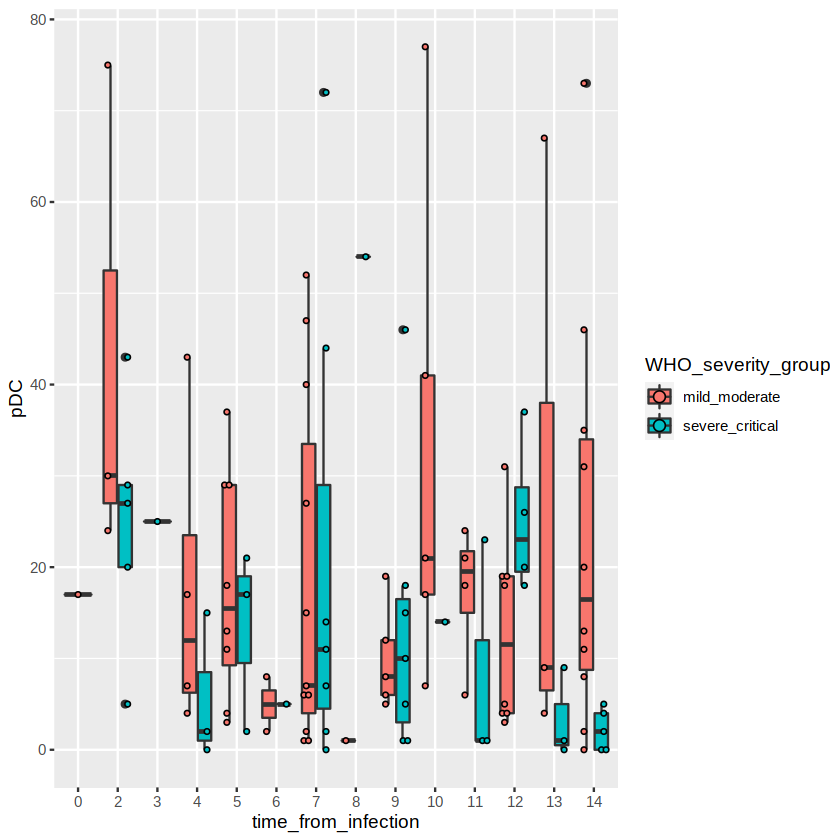

In [137]:
ggplot(tmp,aes(x=time_from_infection,y=pDC,fill=WHO_severity_group))+
    geom_boxplot()+
    geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1),binwidth = 0.5)
ggsave("pDC_issue.pdf",height=5,width=7)

In [ ]:
#now need to calculate proportions

In [152]:
cell_types<-names(new)[names(new)!="sample_id"]
cell_types

[1] "ASDC"               "B_ASC_dividing"     "B_ASC_IgA"         
 [4] "B_ASC_IgG"          "B_ASC_IgM"          "B_ASC_other"       
 [7] "B_CD11c"            "B_naive"            "B_non.switched_mem"
[10] "B_switched_mem"     "CD14mono"           "CD16mono"          
[13] "DC1"                "DC2"                "DC3"               
[16] "HSPC"               "ILC"                "Int.mono"          
[19] "MAIT"               "NK"                 "NK.CD56.bright"    
[22] "NKT"                "pDC"                "Platelet"          
[25] "RBC"                "T.CD4.CTL"          "T.CD4.cycling"     
[28] "T.CD4.Helper"       "T.CD4.Naive"        "T.CD8.CTL"         
[31] "T.CD8.EMRA"         "T.CD8.Mem"          "T.CD8.Naive"       
[34] "T.g.d"              "T.reg"

In [146]:
#tmp$sample_total<-sum(tmp[,cell_types])

In [153]:
head(tmp[,cell_types])

,ASDC,B_ASC_dividing,B_ASC_IgA,B_ASC_IgG,B_ASC_IgM,B_ASC_other,B_CD11c,B_naive,B_non.switched_mem,B_switched_mem,⋯,T.CD4.CTL,T.CD4.cycling,T.CD4.Helper,T.CD4.Naive,T.CD8.CTL,T.CD8.EMRA,T.CD8.Mem,T.CD8.Naive,T.g.d,T.reg
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,2,7,0,3,⋯,24,0,16,4,169,0,6,0,1,0
2,0,0,3,3,0,0,2,6,2,12,⋯,17,0,0,2,129,0,0,3,0,0
3,1,2,1,5,1,0,13,32,17,34,⋯,107,0,36,12,451,0,15,4,3,0
4,3,0,4,0,0,0,1,17,1,3,⋯,75,0,125,21,136,1,59,7,3,1
5,1,1,7,1,0,0,1,45,1,5,⋯,46,0,43,22,109,0,5,9,3,1
6,0,0,0,0,1,0,1,24,0,5,⋯,53,0,48,14,59,2,26,4,0,0


In [158]:
tmp2<-tmp %>% 
    #group_by(sample_id) %>%
    mutate(sample_total=rowSums(tmp[,cell_types])) %>%
    #ungroup() #%>%
    mutate(prop_pDC=(pDC/sample_total)*100) #%>%
    #group_by(cell_type,wave_case_control) %>%
    #mutate(mean_prop=mean(prop))
    

In [160]:
head(tmp2[,c("sample_id","pDC","sample_total","prop_pDC")])

,sample_id,pDC,sample_total,prop_pDC
,<chr>,<int>,<dbl>,<dbl>
1,C101_060121,15,347,4.3227666
2,C101_110121,18,567,3.1746032
3,C101_130121,23,2036,1.1296660
4,C108_150121,29,1489,1.9476158
5,C108_180121,17,804,2.1144279
6,C108_220121,5,698,0.7163324


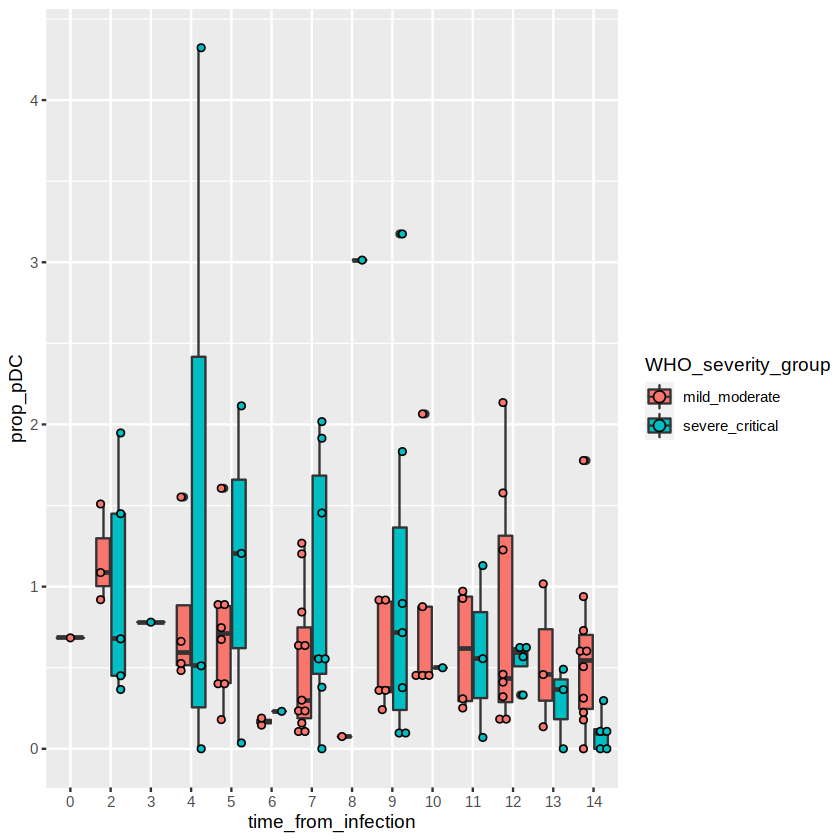

In [167]:
ggplot(tmp2,aes(x=time_from_infection,y=prop_pDC,fill=WHO_severity_group))+
    geom_boxplot()+
    geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1),binwidth = 0.04)
ggsave("prop_pDC_issue.pdf",height=5,width=7)

In [45]:
############################
# Now want to run early vs control for week level 1
############################

In [46]:
data<-data_new

In [188]:
unique(data@meta.data$level_1)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])



[1] "monocyte" "T reg"    "DC"       "T CD4+"   NA         "T CD8+"  
 [7] "NK"       "B"        "MAIT"     "T g/d"    "B_ASC"    "Platelet"
[13] "HSPC"     "RBC"

[1] FALSE

[1] FALSE

[1] NA

In [189]:

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1


[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 461478 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [190]:

abundances<-table(data1@meta.data$level_1,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data


class: SingleCellExperiment 
dim: 32913 461478 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(461478): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(178): orig.ident nCount_RNA ... week10 ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [191]:
sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age


In [192]:
min_cells<-10
ncpus<-8

In [193]:
nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
sce1 <- sce[,!sce$sample_id %in% rmSamples]


In [194]:
# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))


In [195]:
# want to check how to get rid of week 2 and NA

In [198]:
smrzd <- smrzd[, smrzd$week != "week_2"]


In [199]:
unique(smrzd$week)

[1] "week_1"  "control"

In [200]:
table(smrzd$week,useNA="always")


control  week_1    <NA> 
     37      49       0 

In [201]:

#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)



DataFrame with 6 rows and 185 columns
             orig.ident nCount_RNA nFeature_RNA nCount_ADT nFeature_ADT
            <character>  <numeric>    <integer>  <numeric>    <integer>
C101_060121          NA         NA           NA         NA           NA
C103_2204            NA         NA           NA         NA           NA
C104_2204            NA         NA           NA         NA           NA
C106_2204            NA         NA           NA         NA           NA
C108_150121          NA         NA           NA         NA           NA
C108_180121          NA         NA           NA         NA           NA
            nCount_ADT_raw nFeature_ADT_raw nCount_RNA_raw nFeature_RNA_raw
                 <numeric>        <integer>      <numeric>        <integer>
C101_060121             NA               NA             NA               NA
C103_2204               NA               NA             NA               NA
C104_2204               NA               NA             NA               NA
C106_2

[1]  86 185

[1]  13 147

[1] "C101_110121" "C101_130121" "C108_220121" "C113_2904"   "C123_2904"  
 [6] "C124_2404"   "C124_2704"   "C126_0605"   "C127_0405"   "C128_0405"  
[11] "C132_0205"   "C137_280121" "C138_260121" "C138_280121" "C138_300121"
[16] "C140_020221" "C140_040221" "C140_060221" "C141_220121" "C141_260121"
[21] "C145_140121" "C145_190121" "C146_190121" "C146_230121" "C147_230121"
[26] "C147_260121" "C168_260121" "C168_300121" "C169_260121" "C169_300121"
[31] "C170_020221" "C170_280121" "C170_300121" "C187_190121" "C190_050221"
[36] "C190_080221" "C190_100221" "C20_1004"    "C20_1404"    "C20_1604"   
[41] "C21_1704"    "C23_1004"    "C23_1504"    "C31_2004"    "C33_260121" 
[46] "C34_2504"    "C36_1504"    "C36_1704"    "C40_2204"    "C42_2204"   
[51] "C42_2704"    "C58_010221"  "C58_290121"  "C60_2104"    "C60_2504"   
[56] "C63_2404"    "C65_1704"    "C65_2104"    "C73_2404"    "C82_2504"   
[61] "C93_2704"

[1] 13 86

In [202]:
y <- DGEList(counts = abundances, samples = colData(smrzd))


y5 <- setupDGElist(y, 'week')



In [203]:
# sanity check
table(y5$samples$week, y5$samples$individual_id)
table(y5$samples$week, y5$samples$sex)
table(y5$samples$week, y5$samples$corrected_ethnicity)


         
          C101 C103 C104 C106 C108 C113 C123 C126 C127 C128 C132 C134 C137 C138
  control    0    1    1    1    1    0    0    0    0    0    0    1    1    1
  week_1     1    0    0    0    2    1    1    2    1    1    1    0    1    1
         
          C140 C141 C142 C145 C146 C147 C152 C161 C164 C167 C168 C169 C170 C187
  control    1    0    1    1    1    1    1    1    1    1    1    1    1    1
  week_1     2    1    0    2    3    2    0    0    0    0    2    2    2    2
         
          C190 C193 C195 C196 C197 C21 C212 C214 C224 C234 C237 C238 C240 C246
  control    1    1    1    1    1   0    1    1    1    1    1    1    1    1
  week_1     3    0    0    0    0   1    0    0    0    0    0    0    0    0
         
          C251 C31 C33 C34 C40 C42 C58 C60 C63 C69 C73 C82 C85 C93
  control    1   0   0   0   0   0   1   0   0   1   0   0   1   0
  week_1     0   1   3   2   1   1   2   1   1   0   1   1   0   1

         
           F  M
  control 14 23
  week_1  19 30

         
          African Asian European
  control       4    19       14
  week_1        4    27       18

In [207]:
res1 <- testDGElist_DA(y5,
            formula = as.formula("~ week + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)





n = 86 samples, 56 individuals
Time difference of 3.452489 secs

q_week
------
Not Significant     Significant 
              5               2 

q_sex
-----
Not Significant     Significant 
              6               1 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
              7 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
              6               1 

q_age_scaled
------------
Not Significant     Significant 
              4               3 

q_centre
--------
Not Significant     Significant 
              4               3 


In [208]:
head(res1$stats)


,Dispersion,AIC,logLik,(Intercept),weekweek_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.8436197,1136.5052,-559.2526,4.663732,0.32565282,0.19075048,0.0036829682,0.013996016,-0.52361530,0.64643407,⋯,0.56863583,5.832075e-02,0.001538813,4.325759e-02,0.28520762,0.5910126,0.8736821,0.1762539578,0.005385844,7.570078e-02
DC,0.5660555,954.1799,-468.0900,4.346742,-0.49357838,0.21500374,0.0018006039,0.001427553,-0.01910445,-0.01628045,⋯,0.74887037,8.346613e-01,0.893205497,9.534983e-01,0.05147802,0.5910126,0.8736821,0.9149883905,0.893205497,9.750447e-01
monocyte,0.7979607,1257.8965,-619.9482,6.026934,-0.71861940,0.48675506,0.0070287760,-0.000827753,-0.02563615,-0.01017478,⋯,0.28006394,9.149884e-01,0.881056999,9.750447e-01,0.03049643,0.3468835,0.8736821,0.9149883905,0.893205497,9.750447e-01
NK,0.4280238,1278.5384,-630.2692,5.976064,-0.05003687,0.15241232,0.0020271514,0.003021460,0.15454565,0.19913185,⋯,0.68396562,6.163224e-01,0.221099355,4.193034e-01,0.78978055,0.5910126,0.8736821,0.8628514123,0.386923871,5.870248e-01
T CD4+,0.6531252,1274.2390,-628.1195,5.513473,-0.19833826,-0.20630692,-0.0005215713,0.008317089,0.05196986,2.27130344,⋯,0.90691780,8.032359e-02,0.615484303,1.353746e-30,0.31976653,0.5910126,0.9069178,0.1762539578,0.861678024,4.738112e-30
T CD8+,0.4518420,1279.3028,-630.6514,6.071700,-0.36619323,0.06827378,-0.0084196085,0.020334634,0.26770523,0.74825321,⋯,0.05596497,7.318048e-05,0.011178869,3.906381e-04,0.07582259,0.7314268,0.3917548,0.0005122634,0.026084027,9.114890e-04


In [209]:
results1 <- degTable_modified(res1, contrast = 'week', group = 'week_1')



In [ ]:

head(res1$stats)
dim(res1$stats)



In [210]:

out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)

write.table(out,"DA_results_control_vs_week_1_all_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


,Dispersion,AIC,logLik,X.Intercept.,weekweek_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B,0.8436197,1136.5052,-559.2526,4.663732,0.32565282,0.19075048,0.0036829682,0.013996016,-0.52361530,0.64643407,⋯,5.832075e-02,0.001538813,4.325759e-02,0.28520762,0.5910126,0.8736821,0.1762539578,0.005385844,7.570078e-02,B
DC,0.5660555,954.1799,-468.0900,4.346742,-0.49357838,0.21500374,0.0018006039,0.001427553,-0.01910445,-0.01628045,⋯,8.346613e-01,0.893205497,9.534983e-01,0.05147802,0.5910126,0.8736821,0.9149883905,0.893205497,9.750447e-01,DC
monocyte,0.7979607,1257.8965,-619.9482,6.026934,-0.71861940,0.48675506,0.0070287760,-0.000827753,-0.02563615,-0.01017478,⋯,9.149884e-01,0.881056999,9.750447e-01,0.03049643,0.3468835,0.8736821,0.9149883905,0.893205497,9.750447e-01,monocyte
NK,0.4280238,1278.5384,-630.2692,5.976064,-0.05003687,0.15241232,0.0020271514,0.003021460,0.15454565,0.19913185,⋯,6.163224e-01,0.221099355,4.193034e-01,0.78978055,0.5910126,0.8736821,0.8628514123,0.386923871,5.870248e-01,NK
T CD4+,0.6531252,1274.2390,-628.1195,5.513473,-0.19833826,-0.20630692,-0.0005215713,0.008317089,0.05196986,2.27130344,⋯,8.032359e-02,0.615484303,1.353746e-30,0.31976653,0.5910126,0.9069178,0.1762539578,0.861678024,4.738112e-30,T CD4+
T CD8+,0.4518420,1279.3028,-630.6514,6.071700,-0.36619323,0.06827378,-0.0084196085,0.020334634,0.26770523,0.74825321,⋯,7.318048e-05,0.011178869,3.906381e-04,0.07582259,0.7314268,0.3917548,0.0005122634,0.026084027,9.114890e-04,T CD8+


In [211]:


out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)


,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B,0.32565282,0.203719726,0.28520762,0,0,B
NK,-0.05003687,0.789780547,0.78978055,0,0,NK
T CD8+,-0.36619323,0.043327194,0.07582259,0,0,T CD8+
DC,-0.49357838,0.022062009,0.05147802,0,0,DC
monocyte,-0.71861940,0.008713266,0.03049643,0,0,monocyte


In [212]:

write.table(out2,"DA_results_control_vs_week_1_no_warnings_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [47]:
############################
# Now want to run early vs control for week level 2
############################

In [110]:

data<-data_new


In [111]:

unique(data@meta.data$level_2)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])




[1] "CD14mono"           "T reg"              "CD16mono"          
 [4] "pDC"                "T CD4 Naive"        NA                  
 [7] "T CD4 Helper"       "T CD8 CTL"          "Int.mono"          
[10] "T CD4 CTL"          "NK"                 "B_switched_mem"    
[13] "NK CD56 bright"     "T CD8 Naive"        "B_ASC_dividing"    
[16] "DC2"                "MAIT"               "T g/d"             
[19] "B_naive"            "NKT"                "T CD8 Mem"         
[22] "B_ASC_IgA"          "Platelet"           "HSPC"              
[25] "B_ASC_IgM"          "B_non-switched_mem" "DC3"               
[28] "T CD4 cycling"      "B_ASC_IgG"          "B_CD11c"           
[31] "DC1"                "T CD8 EMRA"         "ILC"               
[34] "ASDC"               "RBC"                "B_ASC_other"

[1] FALSE

[1] FALSE

[1] NA

In [112]:


#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1



[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 461478 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [113]:

abundances<-table(data1@meta.data$level_2,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data



class: SingleCellExperiment 
dim: 32913 461478 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(461478): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(178): orig.ident nCount_RNA ... week10 ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [114]:

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age



In [115]:

min_cells<-10
ncpus<-8


In [116]:

nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
sce1 <- sce[,!sce$sample_id %in% rmSamples]


In [117]:
# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))


In [118]:


smrzd <- smrzd[, smrzd$week != "week_2"]


In [119]:


unique(smrzd$week)

table(smrzd$week,useNA="always")



[1] "week_1"  "control"


control  week_1    <NA> 
     37      49       0 

In [120]:

#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)


[1]  86 185

[1]  35 147

[1] "C101_110121" "C101_130121" "C108_220121" "C113_2904"   "C123_2904"  
 [6] "C124_2404"   "C124_2704"   "C126_0605"   "C127_0405"   "C128_0405"  
[11] "C132_0205"   "C137_280121" "C138_260121" "C138_280121" "C138_300121"
[16] "C140_020221" "C140_040221" "C140_060221" "C141_220121" "C141_260121"
[21] "C145_140121" "C145_190121" "C146_190121" "C146_230121" "C147_230121"
[26] "C147_260121" "C168_260121" "C168_300121" "C169_260121" "C169_300121"
[31] "C170_020221" "C170_280121" "C170_300121" "C187_190121" "C190_050221"
[36] "C190_080221" "C190_100221" "C20_1004"    "C20_1404"    "C20_1604"   
[41] "C21_1704"    "C23_1004"    "C23_1504"    "C31_2004"    "C33_260121" 
[46] "C34_2504"    "C36_1504"    "C36_1704"    "C40_2204"    "C42_2204"   
[51] "C42_2704"    "C58_010221"  "C58_290121"  "C60_2104"    "C60_2504"   
[56] "C63_2404"    "C65_1704"    "C65_2104"    "C73_2404"    "C82_2504"   
[61] "C93_2704"

[1] 35 86

In [121]:

y <- DGEList(counts = abundances, samples = colData(smrzd))


y5 <- setupDGElist(y, 'week')



In [122]:
# sanity check
table(y5$samples$week, y5$samples$individual_id)
table(y5$samples$week, y5$samples$sex)
table(y5$samples$week, y5$samples$corrected_ethnicity)


         
          C101 C103 C104 C106 C108 C113 C123 C126 C127 C128 C132 C134 C137 C138
  control    0    1    1    1    1    0    0    0    0    0    0    1    1    1
  week_1     1    0    0    0    2    1    1    2    1    1    1    0    1    1
         
          C140 C141 C142 C145 C146 C147 C152 C161 C164 C167 C168 C169 C170 C187
  control    1    0    1    1    1    1    1    1    1    1    1    1    1    1
  week_1     2    1    0    2    3    2    0    0    0    0    2    2    2    2
         
          C190 C193 C195 C196 C197 C21 C212 C214 C224 C234 C237 C238 C240 C246
  control    1    1    1    1    1   0    1    1    1    1    1    1    1    1
  week_1     3    0    0    0    0   1    0    0    0    0    0    0    0    0
         
          C251 C31 C33 C34 C40 C42 C58 C60 C63 C69 C73 C82 C85 C93
  control    1   0   0   0   0   0   1   0   0   1   0   0   1   0
  week_1     0   1   3   2   1   1   2   1   1   0   1   1   0   1

         
           F  M
  control 14 23
  week_1  19 30

         
          African Asian European
  control       4    19       14
  week_1        4    27       18

In [126]:
res1 <- testDGElist_DA(y5,
            formula = as.formula("~ week + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)



n = 86 samples, 56 individuals
Time difference of 4.199075 secs

q_week
------
Not Significant     Significant 
              5              13 

q_sex
-----
Not Significant     Significant 
             13               5 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
             18 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
             16               2 

q_age_scaled
------------
Not Significant     Significant 
             11               7 

q_centre
--------
Not Significant     Significant 
              8              10 


In [127]:
head(res1$stats)



,Dispersion,AIC,logLik,(Intercept),weekweek_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B_naive,1.2844283,1073.9190,-527.9595,4.083201,0.44949906,0.38763257,0.0054119374,0.0162682121,-0.60547812,0.61347642,⋯,0.4380113,0.04842160,1.243667e-09,2.707540e-09,7.499368e-05,1.413674e-03,0.8536252,0.2848451,5.596499e-09,6.091964e-09
B_non-switched_mem,1.0172406,609.8145,-295.9072,2.429726,-0.81275577,-0.51862745,0.0004743042,0.0001726404,-0.42030873,1.25541931,⋯,0.9365286,0.97871854,7.713091e-163,0.000000e+00,0.000000e+00,3.925617e-244,0.9365286,0.9787185,1.388356e-161,0.000000e+00
B_switched_mem,0.7147219,821.3822,-401.6911,3.087673,-0.06384793,0.01873287,0.0020155282,0.0138249184,-0.34673684,0.76108649,⋯,0.7162178,0.06329892,1.532003e-150,0.000000e+00,4.980129e-06,2.863650e-01,0.8536252,0.2848451,1.378803e-149,0.000000e+00
CD14mono,0.8790741,1151.4579,-566.7290,5.161479,-0.56323947,0.57332801,0.0096176949,-0.0036743320,-0.05778523,0.28398254,⋯,0.1326134,0.62493222,4.738940e-01,3.089006e-03,5.201495e-10,4.668585e-09,0.5967605,0.8652908,5.686728e-01,5.560211e-03
CD16mono,1.1478963,1066.6133,-524.3067,5.377471,-0.90877436,0.54476825,0.0027183044,0.0002151156,-0.08616084,-0.27128253,⋯,0.6783747,0.97397994,5.937777e-01,4.497847e-01,5.058717e-03,1.280440e-01,0.8536252,0.9787185,6.679999e-01,5.060077e-01
DC2,0.9957621,778.7420,-380.3710,3.751624,-1.01180639,-0.04714746,0.0030720961,-0.0036677445,-0.05876320,0.03153783,⋯,0.6181570,0.62117958,1.209441e-01,4.473933e-01,5.613812e-122,4.126116e-01,0.8536252,0.8652908,1.979086e-01,5.060077e-01


In [128]:
results1 <- degTable_modified(res1, contrast = 'week', group = 'week_1')



In [129]:

head(res1$stats)
dim(res1$stats)


,Dispersion,AIC,logLik,(Intercept),weekweek_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B_naive,1.2844283,1073.9190,-527.9595,4.083201,0.44949906,0.38763257,0.0054119374,0.0162682121,-0.60547812,0.61347642,⋯,0.4380113,0.04842160,1.243667e-09,2.707540e-09,7.499368e-05,1.413674e-03,0.8536252,0.2848451,5.596499e-09,6.091964e-09
B_non-switched_mem,1.0172406,609.8145,-295.9072,2.429726,-0.81275577,-0.51862745,0.0004743042,0.0001726404,-0.42030873,1.25541931,⋯,0.9365286,0.97871854,7.713091e-163,0.000000e+00,0.000000e+00,3.925617e-244,0.9365286,0.9787185,1.388356e-161,0.000000e+00
B_switched_mem,0.7147219,821.3822,-401.6911,3.087673,-0.06384793,0.01873287,0.0020155282,0.0138249184,-0.34673684,0.76108649,⋯,0.7162178,0.06329892,1.532003e-150,0.000000e+00,4.980129e-06,2.863650e-01,0.8536252,0.2848451,1.378803e-149,0.000000e+00
CD14mono,0.8790741,1151.4579,-566.7290,5.161479,-0.56323947,0.57332801,0.0096176949,-0.0036743320,-0.05778523,0.28398254,⋯,0.1326134,0.62493222,4.738940e-01,3.089006e-03,5.201495e-10,4.668585e-09,0.5967605,0.8652908,5.686728e-01,5.560211e-03
CD16mono,1.1478963,1066.6133,-524.3067,5.377471,-0.90877436,0.54476825,0.0027183044,0.0002151156,-0.08616084,-0.27128253,⋯,0.6783747,0.97397994,5.937777e-01,4.497847e-01,5.058717e-03,1.280440e-01,0.8536252,0.9787185,6.679999e-01,5.060077e-01
DC2,0.9957621,778.7420,-380.3710,3.751624,-1.01180639,-0.04714746,0.0030720961,-0.0036677445,-0.05876320,0.03153783,⋯,0.6181570,0.62117958,1.209441e-01,4.473933e-01,5.613812e-122,4.126116e-01,0.8536252,0.8652908,1.979086e-01,5.060077e-01


[1] 18 28

In [130]:


out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)

write.table(out,"DA_results_control_vs_week_1_all_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


,Dispersion,AIC,logLik,X.Intercept.,weekweek_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_naive,1.2844283,1073.9190,-527.9595,4.083201,0.44949906,0.38763257,0.0054119374,0.0162682121,-0.60547812,0.61347642,⋯,0.04842160,1.243667e-09,2.707540e-09,7.499368e-05,1.413674e-03,0.8536252,0.2848451,5.596499e-09,6.091964e-09,B_naive
B_non-switched_mem,1.0172406,609.8145,-295.9072,2.429726,-0.81275577,-0.51862745,0.0004743042,0.0001726404,-0.42030873,1.25541931,⋯,0.97871854,7.713091e-163,0.000000e+00,0.000000e+00,3.925617e-244,0.9365286,0.9787185,1.388356e-161,0.000000e+00,B_non-switched_mem
B_switched_mem,0.7147219,821.3822,-401.6911,3.087673,-0.06384793,0.01873287,0.0020155282,0.0138249184,-0.34673684,0.76108649,⋯,0.06329892,1.532003e-150,0.000000e+00,4.980129e-06,2.863650e-01,0.8536252,0.2848451,1.378803e-149,0.000000e+00,B_switched_mem
CD14mono,0.8790741,1151.4579,-566.7290,5.161479,-0.56323947,0.57332801,0.0096176949,-0.0036743320,-0.05778523,0.28398254,⋯,0.62493222,4.738940e-01,3.089006e-03,5.201495e-10,4.668585e-09,0.5967605,0.8652908,5.686728e-01,5.560211e-03,CD14mono
CD16mono,1.1478963,1066.6133,-524.3067,5.377471,-0.90877436,0.54476825,0.0027183044,0.0002151156,-0.08616084,-0.27128253,⋯,0.97397994,5.937777e-01,4.497847e-01,5.058717e-03,1.280440e-01,0.8536252,0.9787185,6.679999e-01,5.060077e-01,CD16mono
DC2,0.9957621,778.7420,-380.3710,3.751624,-1.01180639,-0.04714746,0.0030720961,-0.0036677445,-0.05876320,0.03153783,⋯,0.62117958,1.209441e-01,4.473933e-01,5.613812e-122,4.126116e-01,0.8536252,0.8652908,1.979086e-01,5.060077e-01,DC2


In [131]:


out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)



,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_naive,0.44949906,3.333053e-05,7.499368e-05,0,0,B_naive
pDC,0.12252780,6.218578e-01,6.584377e-01,0,0,pDC
NK,-0.07666083,7.217043e-01,7.217043e-01,0,0,NK
T CD8 CTL,-0.48830091,5.706160e-02,7.336492e-02,0,0,T CD8 CTL
DC3,-0.55240031,3.056885e-02,4.232611e-02,0,0,DC3
CD14mono,-0.56323947,1.155888e-10,5.201495e-10,0,0,CD14mono


In [132]:

write.table(out2,"DA_results_control_vs_week_1_no_warnings_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [ ]:
############################
# Now want to run early vs control for week10 level 1
############################

In [133]:
data<-data_new



In [134]:

unique(data@meta.data$level_1)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])


[1] "monocyte" "T reg"    "DC"       "T CD4+"   NA         "T CD8+"  
 [7] "NK"       "B"        "MAIT"     "T g/d"    "B_ASC"    "Platelet"
[13] "HSPC"     "RBC"

[1] FALSE

[1] FALSE

[1] NA

In [135]:
#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1


[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 461478 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [136]:

abundances<-table(data1@meta.data$level_1,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data


class: SingleCellExperiment 
dim: 32913 461478 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(461478): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(178): orig.ident nCount_RNA ... week10 ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [137]:

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age


In [138]:

min_cells<-10
ncpus<-8


In [139]:
nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
sce1 <- sce[,!sce$sample_id %in% rmSamples]



In [140]:

# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))


In [141]:
smrzd <- smrzd[, smrzd$week10 != "week_2"]



In [142]:

unique(smrzd$week10)

table(smrzd$week10,useNA="always")



[1] "week_1"  "control"


control  week_1    <NA> 
     37      69       0 

In [143]:
#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)


[1] 106 185

[1]  13 147

[1] "C101_130121" "C113_2904"   "C123_2904"   "C124_2704"   "C126_0605"  
 [6] "C127_0405"   "C128_0405"   "C137_280121" "C138_280121" "C138_300121"
[11] "C140_040221" "C140_060221" "C141_260121" "C145_190121" "C146_230121"
[16] "C147_230121" "C147_260121" "C168_260121" "C168_300121" "C169_300121"
[21] "C170_020221" "C170_300121" "C187_190121" "C190_080221" "C190_100221"
[26] "C20_1404"    "C20_1604"    "C21_1704"    "C23_1504"    "C31_2004"   
[31] "C33_260121"  "C34_2504"    "C36_1704"    "C42_2704"    "C58_010221" 
[36] "C60_2504"    "C63_2404"    "C65_2104"    "C73_2404"    "C82_2504"   
[41] "C93_2704"

[1]  13 106

In [144]:

y <- DGEList(counts = abundances, samples = colData(smrzd))


y5 <- setupDGElist(y, 'week10')



In [145]:
# sanity check
table(y5$samples$week10, y5$samples$individual_id)
table(y5$samples$week10, y5$samples$sex)
table(y5$samples$week10, y5$samples$corrected_ethnicity)


         
          C101 C103 C104 C106 C108 C113 C123 C124 C126 C127 C128 C132 C134 C137
  control    0    1    1    1    1    0    0    0    0    0    0    0    1    1
  week_1     2    0    0    0    3    1    1    1    2    1    1    2    0    1
         
          C138 C140 C141 C142 C145 C146 C147 C152 C161 C164 C167 C168 C169 C170
  control    1    1    0    1    1    1    1    1    1    1    1    1    1    1
  week_1     2    3    2    0    3    4    2    0    0    0    0    2    3    3
         
          C187 C190 C193 C195 C196 C197 C20 C21 C212 C214 C224 C23 C234 C237
  control    1    1    1    1    1    1   0   0    1    1    1   0    1    1
  week_1     2    4    0    0    0    0   1   1    0    0    0   1    0    0
         
          C238 C240 C246 C251 C31 C33 C34 C36 C40 C42 C58 C60 C63 C65 C69 C73
  control    1    1    1    1   0   0   0   0   0   0   1   0   0   0   1   0
  week_1     0    0    0    0   1   3   2   1   2   2   3   2   1   1   0   1
         
     

         
           F  M
  control 14 23
  week_1  27 42

         
          African Asian European
  control       4    19       14
  week_1        6    40       23

In [146]:
res1 <- testDGElist_DA(y5,
            formula = as.formula("~ week10 + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)



n = 106 samples, 61 individuals
Time difference of 1.869217 secs

q_week10
--------
Not Significant     Significant 
              3               4 

q_sex
-----
Not Significant     Significant 
              6               1 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
              7 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
              6               1 

q_age_scaled
------------
Not Significant     Significant 
              5               2 

q_centre
--------
Not Significant     Significant 
              4               3 


In [147]:

head(res1$stats)


,Dispersion,AIC,logLik,(Intercept),week10week_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.7925364,1392.957,-687.4784,4.736209,0.3332547,0.10130359,0.001982563,1.383595e-02,-0.453149260,0.54721228,⋯,0.7321865,0.049805440,0.002108254,5.253988e-02,0.19956992,0.8220828,0.7321865,0.17431904,0.00737889,9.194479e-02
DC,0.5933225,1159.946,-570.9732,4.434870,-0.4814710,0.16506444,0.002487674,1.099524e-03,-0.024095398,-0.13960940,⋯,0.6474184,0.871990200,0.860870605,6.053077e-01,0.03821625,0.8220828,0.7321865,0.99878521,0.95738856,6.844839e-01
monocyte,0.8404184,1520.487,-751.2436,6.279363,-0.8025435,0.30754384,0.006264662,-1.188825e-05,0.008488445,-0.30116434,⋯,0.3305403,0.998785206,0.957388561,3.422326e-01,0.01089558,0.6693493,0.7321865,0.99878521,0.95738856,4.791256e-01
NK,0.4333149,1546.418,-764.2091,6.076188,-0.1296995,0.02767037,0.001682837,3.220078e-03,0.172944960,0.09668828,⋯,0.7241037,0.592139792,0.156547967,6.844839e-01,0.48098916,0.9008187,0.7321865,0.82899571,0.27395894,6.844839e-01
T CD4+,0.6615354,1559.221,-770.6103,5.527038,-0.2428539,-0.22592956,0.002313357,4.659344e-03,-0.039819458,2.26568243,⋯,0.5506168,0.301039774,0.657132327,8.033694e-36,0.19956992,0.6693493,0.7321865,0.52681960,0.91998526,2.811793e-35
T CD8+,0.4423213,1560.359,-771.1796,6.069342,-0.4200138,0.08558732,-0.006210460,1.708274e-02,0.198547782,0.66277560,⋯,0.1554134,0.001576237,0.064711384,1.919890e-03,0.03685133,0.8220828,0.7321865,0.01103366,0.15099323,4.479743e-03


In [148]:

results1 <- degTable_modified(res1, contrast = 'week10', group = 'week_1')


In [149]:

head(res1$stats)
dim(res1$stats)


,Dispersion,AIC,logLik,(Intercept),week10week_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.7925364,1392.957,-687.4784,4.736209,0.3332547,0.10130359,0.001982563,1.383595e-02,-0.453149260,0.54721228,⋯,0.7321865,0.049805440,0.002108254,5.253988e-02,0.19956992,0.8220828,0.7321865,0.17431904,0.00737889,9.194479e-02
DC,0.5933225,1159.946,-570.9732,4.434870,-0.4814710,0.16506444,0.002487674,1.099524e-03,-0.024095398,-0.13960940,⋯,0.6474184,0.871990200,0.860870605,6.053077e-01,0.03821625,0.8220828,0.7321865,0.99878521,0.95738856,6.844839e-01
monocyte,0.8404184,1520.487,-751.2436,6.279363,-0.8025435,0.30754384,0.006264662,-1.188825e-05,0.008488445,-0.30116434,⋯,0.3305403,0.998785206,0.957388561,3.422326e-01,0.01089558,0.6693493,0.7321865,0.99878521,0.95738856,4.791256e-01
NK,0.4333149,1546.418,-764.2091,6.076188,-0.1296995,0.02767037,0.001682837,3.220078e-03,0.172944960,0.09668828,⋯,0.7241037,0.592139792,0.156547967,6.844839e-01,0.48098916,0.9008187,0.7321865,0.82899571,0.27395894,6.844839e-01
T CD4+,0.6615354,1559.221,-770.6103,5.527038,-0.2428539,-0.22592956,0.002313357,4.659344e-03,-0.039819458,2.26568243,⋯,0.5506168,0.301039774,0.657132327,8.033694e-36,0.19956992,0.6693493,0.7321865,0.52681960,0.91998526,2.811793e-35
T CD8+,0.4423213,1560.359,-771.1796,6.069342,-0.4200138,0.08558732,-0.006210460,1.708274e-02,0.198547782,0.66277560,⋯,0.1554134,0.001576237,0.064711384,1.919890e-03,0.03685133,0.8220828,0.7321865,0.01103366,0.15099323,4.479743e-03


[1]  7 28

In [150]:

out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)



,Dispersion,AIC,logLik,X.Intercept.,week10week_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B,0.7925364,1392.957,-687.4784,4.736209,0.3332547,0.10130359,0.001982563,1.383595e-02,-0.453149260,0.54721228,⋯,0.049805440,0.002108254,5.253988e-02,0.19956992,0.8220828,0.7321865,0.17431904,0.00737889,9.194479e-02,B
DC,0.5933225,1159.946,-570.9732,4.434870,-0.4814710,0.16506444,0.002487674,1.099524e-03,-0.024095398,-0.13960940,⋯,0.871990200,0.860870605,6.053077e-01,0.03821625,0.8220828,0.7321865,0.99878521,0.95738856,6.844839e-01,DC
monocyte,0.8404184,1520.487,-751.2436,6.279363,-0.8025435,0.30754384,0.006264662,-1.188825e-05,0.008488445,-0.30116434,⋯,0.998785206,0.957388561,3.422326e-01,0.01089558,0.6693493,0.7321865,0.99878521,0.95738856,4.791256e-01,monocyte
NK,0.4333149,1546.418,-764.2091,6.076188,-0.1296995,0.02767037,0.001682837,3.220078e-03,0.172944960,0.09668828,⋯,0.592139792,0.156547967,6.844839e-01,0.48098916,0.9008187,0.7321865,0.82899571,0.27395894,6.844839e-01,NK
T CD4+,0.6615354,1559.221,-770.6103,5.527038,-0.2428539,-0.22592956,0.002313357,4.659344e-03,-0.039819458,2.26568243,⋯,0.301039774,0.657132327,8.033694e-36,0.19956992,0.6693493,0.7321865,0.52681960,0.91998526,2.811793e-35,T CD4+
T CD8+,0.4423213,1560.359,-771.1796,6.069342,-0.4200138,0.08558732,-0.006210460,1.708274e-02,0.198547782,0.66277560,⋯,0.001576237,0.064711384,1.919890e-03,0.03685133,0.8220828,0.7321865,0.01103366,0.15099323,4.479743e-03,T CD8+


In [151]:

write.table(out,"DA_results_control_vs_week10_1_all_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [152]:

out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)



,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B,0.3332547,0.160566607,0.19956992,0,0,B
NK,-0.1296995,0.480989159,0.48098916,0,0,NK
T CD4+,-0.2428539,0.171059929,0.19956992,0,0,T CD4+
T CD8+,-0.4200138,0.015793425,0.03685133,0,0,T CD8+
DC,-0.4814710,0.021837856,0.03821625,0,0,DC
monocyte,-0.8025435,0.003113023,0.01089558,0,0,monocyte


In [153]:

write.table(out2,"DA_results_control_vs_week10_1_no_warnings_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [154]:
############################
# Now want to run early vs control for week10 level 2
############################

In [155]:

data<-data_new


In [156]:

unique(data@meta.data$level_2)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])


[1] "CD14mono"           "T reg"              "CD16mono"          
 [4] "pDC"                "T CD4 Naive"        NA                  
 [7] "T CD4 Helper"       "T CD8 CTL"          "Int.mono"          
[10] "T CD4 CTL"          "NK"                 "B_switched_mem"    
[13] "NK CD56 bright"     "T CD8 Naive"        "B_ASC_dividing"    
[16] "DC2"                "MAIT"               "T g/d"             
[19] "B_naive"            "NKT"                "T CD8 Mem"         
[22] "B_ASC_IgA"          "Platelet"           "HSPC"              
[25] "B_ASC_IgM"          "B_non-switched_mem" "DC3"               
[28] "T CD4 cycling"      "B_ASC_IgG"          "B_CD11c"           
[31] "DC1"                "T CD8 EMRA"         "ILC"               
[34] "ASDC"               "RBC"                "B_ASC_other"

[1] FALSE

[1] FALSE

[1] NA

In [157]:

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1



[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 461478 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [158]:

abundances<-table(data1@meta.data$level_2,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data


class: SingleCellExperiment 
dim: 32913 461478 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(461478): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(178): orig.ident nCount_RNA ... week10 ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [159]:

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age



In [160]:

min_cells<-10
ncpus<-8


In [161]:
nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
sce1 <- sce[,!sce$sample_id %in% rmSamples]



In [162]:
# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))



In [163]:

smrzd <- smrzd[, smrzd$week10 != "week_2"]


In [164]:


unique(smrzd$week10)

table(smrzd$week10,useNA="always")



[1] "week_1"  "control"


control  week_1    <NA> 
     37      69       0 

In [165]:

#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)


[1] 106 185

[1]  35 147

[1] "C101_130121" "C113_2904"   "C123_2904"   "C124_2704"   "C126_0605"  
 [6] "C127_0405"   "C128_0405"   "C137_280121" "C138_280121" "C138_300121"
[11] "C140_040221" "C140_060221" "C141_260121" "C145_190121" "C146_230121"
[16] "C147_230121" "C147_260121" "C168_260121" "C168_300121" "C169_300121"
[21] "C170_020221" "C170_300121" "C187_190121" "C190_080221" "C190_100221"
[26] "C20_1404"    "C20_1604"    "C21_1704"    "C23_1504"    "C31_2004"   
[31] "C33_260121"  "C34_2504"    "C36_1704"    "C42_2704"    "C58_010221" 
[36] "C60_2504"    "C63_2404"    "C65_2104"    "C73_2404"    "C82_2504"   
[41] "C93_2704"

[1]  35 106

In [166]:

y <- DGEList(counts = abundances, samples = colData(smrzd))


y5 <- setupDGElist(y, 'week10')


In [168]:

# sanity check
table(y5$samples$week10, y5$samples$individual_id)
table(y5$samples$week10, y5$samples$sex)
table(y5$samples$week10, y5$samples$corrected_ethnicity)


         
          C101 C103 C104 C106 C108 C113 C123 C124 C126 C127 C128 C132 C134 C137
  control    0    1    1    1    1    0    0    0    0    0    0    0    1    1
  week_1     2    0    0    0    3    1    1    1    2    1    1    2    0    1
         
          C138 C140 C141 C142 C145 C146 C147 C152 C161 C164 C167 C168 C169 C170
  control    1    1    0    1    1    1    1    1    1    1    1    1    1    1
  week_1     2    3    2    0    3    4    2    0    0    0    0    2    3    3
         
          C187 C190 C193 C195 C196 C197 C20 C21 C212 C214 C224 C23 C234 C237
  control    1    1    1    1    1    1   0   0    1    1    1   0    1    1
  week_1     2    4    0    0    0    0   1   1    0    0    0   1    0    0
         
          C238 C240 C246 C251 C31 C33 C34 C36 C40 C42 C58 C60 C63 C65 C69 C73
  control    1    1    1    1   0   0   0   0   0   0   1   0   0   0   1   0
  week_1     0    0    0    0   1   3   2   1   2   2   3   2   1   1   0   1
         
     

         
           F  M
  control 14 23
  week_1  27 42

         
          African Asian European
  control       4    19       14
  week_1        6    40       23

In [169]:

res1 <- testDGElist_DA(y5,
            formula = as.formula("~ week10 + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)




n = 106 samples, 61 individuals
Time difference of 7.207028 secs

q_week10
--------
Not Significant     Significant 
              7              12 

q_sex
-----
Not Significant     Significant 
             14               5 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
             19 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
             17               2 

q_age_scaled
------------
Not Significant     Significant 
             10               9 

q_centre
--------
Not Significant     Significant 
             11               8 


In [170]:

head(res1$stats)



,Dispersion,AIC,logLik,(Intercept),week10week_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B_naive,1.2410674,1318.7695,-650.3847,4.196744,0.40895162,0.24188854,0.0023748197,0.016836023,-0.515641009,0.4657740,⋯,0.7342662,0.04511287,4.105609e-03,1.792932e-01,2.061986e-01,6.581256e-01,0.9267611,0.2142861,1.114379e-02,2.838808e-01
B_non-switched_mem,0.9940320,751.1589,-366.5794,2.327614,-0.65541491,-0.40750916,-0.0007484227,0.002576367,-0.334138575,1.1489414,⋯,0.8977955,0.72209061,1.677263e-27,1.918124e-280,1.309898e-92,3.922255e-36,0.9267611,0.9776932,1.062267e-26,1.822218e-279
B_switched_mem,0.6473721,1004.5822,-493.2911,3.045787,-0.01089202,0.06439581,0.0028427741,0.013374992,-0.338847153,0.7317499,⋯,0.6188278,0.05824900,1.579249e-02,8.942918e-03,9.589398e-01,8.547636e-01,0.9267611,0.2213462,3.750715e-02,2.123943e-02
CD14mono,0.9438272,1401.1635,-691.5817,5.536298,-0.64734097,0.35295357,0.0081622523,-0.002227120,-0.001311727,-0.1269335,⋯,0.1944037,0.77002886,9.804972e-01,3.084578e-02,1.086293e-30,6.234141e-10,0.7387339,0.9776932,9.804972e-01,6.511886e-02
CD16mono,1.1281621,1282.9417,-632.4709,5.436562,-0.98297408,0.32136867,0.0022066052,0.000654506,0.015239570,-0.4915352,⋯,0.7465952,0.93300398,9.261619e-01,1.551326e-01,2.349179e-03,5.606779e-01,0.9267611,0.9848375,9.804972e-01,2.679563e-01
DC2,1.0248206,939.6968,-460.8484,3.876736,-1.05488280,-0.19847379,0.0028477960,-0.004406663,-0.012182396,-0.1391265,⋯,0.6859619,0.60566206,9.443965e-01,6.886855e-01,2.978771e-04,6.581256e-01,0.9267611,0.9589649,9.804972e-01,6.886855e-01


In [171]:

results1 <- degTable_modified(res1, contrast = 'week10', group = 'week_1')


In [172]:

head(res1$stats)
dim(res1$stats)



,Dispersion,AIC,logLik,(Intercept),week10week_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B_naive,1.2410674,1318.7695,-650.3847,4.196744,0.40895162,0.24188854,0.0023748197,0.016836023,-0.515641009,0.4657740,⋯,0.7342662,0.04511287,4.105609e-03,1.792932e-01,2.061986e-01,6.581256e-01,0.9267611,0.2142861,1.114379e-02,2.838808e-01
B_non-switched_mem,0.9940320,751.1589,-366.5794,2.327614,-0.65541491,-0.40750916,-0.0007484227,0.002576367,-0.334138575,1.1489414,⋯,0.8977955,0.72209061,1.677263e-27,1.918124e-280,1.309898e-92,3.922255e-36,0.9267611,0.9776932,1.062267e-26,1.822218e-279
B_switched_mem,0.6473721,1004.5822,-493.2911,3.045787,-0.01089202,0.06439581,0.0028427741,0.013374992,-0.338847153,0.7317499,⋯,0.6188278,0.05824900,1.579249e-02,8.942918e-03,9.589398e-01,8.547636e-01,0.9267611,0.2213462,3.750715e-02,2.123943e-02
CD14mono,0.9438272,1401.1635,-691.5817,5.536298,-0.64734097,0.35295357,0.0081622523,-0.002227120,-0.001311727,-0.1269335,⋯,0.1944037,0.77002886,9.804972e-01,3.084578e-02,1.086293e-30,6.234141e-10,0.7387339,0.9776932,9.804972e-01,6.511886e-02
CD16mono,1.1281621,1282.9417,-632.4709,5.436562,-0.98297408,0.32136867,0.0022066052,0.000654506,0.015239570,-0.4915352,⋯,0.7465952,0.93300398,9.261619e-01,1.551326e-01,2.349179e-03,5.606779e-01,0.9267611,0.9848375,9.804972e-01,2.679563e-01
DC2,1.0248206,939.6968,-460.8484,3.876736,-1.05488280,-0.19847379,0.0028477960,-0.004406663,-0.012182396,-0.1391265,⋯,0.6859619,0.60566206,9.443965e-01,6.886855e-01,2.978771e-04,6.581256e-01,0.9267611,0.9589649,9.804972e-01,6.886855e-01


[1] 19 28

In [173]:


out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)


,Dispersion,AIC,logLik,X.Intercept.,week10week_1,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_naive,1.2410674,1318.7695,-650.3847,4.196744,0.40895162,0.24188854,0.0023748197,0.016836023,-0.515641009,0.4657740,⋯,0.04511287,4.105609e-03,1.792932e-01,2.061986e-01,6.581256e-01,0.9267611,0.2142861,1.114379e-02,2.838808e-01,B_naive
B_non-switched_mem,0.9940320,751.1589,-366.5794,2.327614,-0.65541491,-0.40750916,-0.0007484227,0.002576367,-0.334138575,1.1489414,⋯,0.72209061,1.677263e-27,1.918124e-280,1.309898e-92,3.922255e-36,0.9267611,0.9776932,1.062267e-26,1.822218e-279,B_non-switched_mem
B_switched_mem,0.6473721,1004.5822,-493.2911,3.045787,-0.01089202,0.06439581,0.0028427741,0.013374992,-0.338847153,0.7317499,⋯,0.05824900,1.579249e-02,8.942918e-03,9.589398e-01,8.547636e-01,0.9267611,0.2213462,3.750715e-02,2.123943e-02,B_switched_mem
CD14mono,0.9438272,1401.1635,-691.5817,5.536298,-0.64734097,0.35295357,0.0081622523,-0.002227120,-0.001311727,-0.1269335,⋯,0.77002886,9.804972e-01,3.084578e-02,1.086293e-30,6.234141e-10,0.7387339,0.9776932,9.804972e-01,6.511886e-02,CD14mono
CD16mono,1.1281621,1282.9417,-632.4709,5.436562,-0.98297408,0.32136867,0.0022066052,0.000654506,0.015239570,-0.4915352,⋯,0.93300398,9.261619e-01,1.551326e-01,2.349179e-03,5.606779e-01,0.9267611,0.9848375,9.804972e-01,2.679563e-01,CD16mono
DC2,1.0248206,939.6968,-460.8484,3.876736,-1.05488280,-0.19847379,0.0028477960,-0.004406663,-0.012182396,-0.1391265,⋯,0.60566206,9.443965e-01,6.886855e-01,2.978771e-04,6.581256e-01,0.9267611,0.9589649,9.804972e-01,6.886855e-01,DC2


In [174]:

write.table(out,"DA_results_control_vs_week10_1_all_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [175]:


out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)


,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_naive,0.40895162,0.16278840,0.2061986,0,0,B_naive
pDC,0.14628113,0.53533174,0.5650724,0,0,pDC
B_switched_mem,-0.01089202,0.95893983,0.9589398,0,0,B_switched_mem
NK,-0.19352379,0.35120594,0.4170570,0,0,NK
NK CD56 bright,-0.30409892,0.15701773,0.2061986,0,0,NK CD56 bright
T CD8 CTL,-0.53845528,0.02310348,0.0365805,0,0,T CD8 CTL


In [176]:


write.table(out2,"DA_results_control_vs_week10_1_no_warnings_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [177]:
############################
# Now want to run early vs late for week level 1
############################

In [178]:
data<-data_new


In [179]:

unique(data@meta.data$level_1)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])


[1] "monocyte" "T reg"    "DC"       "T CD4+"   NA         "T CD8+"  
 [7] "NK"       "B"        "MAIT"     "T g/d"    "B_ASC"    "Platelet"
[13] "HSPC"     "RBC"

[1] FALSE

[1] FALSE

[1] NA

In [180]:

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1


[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 461478 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [181]:

abundances<-table(data1@meta.data$level_1,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data


class: SingleCellExperiment 
dim: 32913 461478 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(461478): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(178): orig.ident nCount_RNA ... week10 ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [182]:

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age


In [183]:

min_cells<-10
ncpus<-8


In [184]:
nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
sce1 <- sce[,!sce$sample_id %in% rmSamples]


In [185]:

# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))


In [187]:

smrzd <- smrzd[, smrzd$week != "control"]


In [188]:

unique(smrzd$week)

table(smrzd$week,useNA="always")


[1] "week_1" "week_2"


week_1 week_2   <NA> 
    49     60      0 

In [189]:

#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)


[1] 109 185

[1]  13 147

[1] "C103_2204"   "C104_2204"   "C106_2204"   "C108_220420" "C134_2904"  
 [6] "C137_300420" "C138_300420" "C140_300420" "C142_3004"   "C145_300420"
[11] "C146_300420" "C147_300420" "C152_0405"   "C161_1105"   "C164_1105"  
[16] "C167_1205"   "C168_120520" "C168_260121" "C169_120520" "C170_120520"
[21] "C187_260520" "C190_260520" "C193_2605"   "C195_2605"   "C196_2605"  
[26] "C197_2605"   "C212_2705"   "C214_2705"   "C224_2805"   "C234_2805"  
[31] "C237_2805"   "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"  
[36] "C58_160420"  "C69_1804"    "C85_2004"

[1]  13 109

In [190]:

y <- DGEList(counts = abundances, samples = colData(smrzd))


y5 <- setupDGElist(y, 'week')



In [191]:

# sanity check
table(y5$samples$week, y5$samples$individual_id)
table(y5$samples$week, y5$samples$sex)
table(y5$samples$week, y5$samples$corrected_ethnicity)


        
         C101 C108 C113 C123 C124 C126 C127 C128 C132 C137 C138 C140 C141 C145
  week_1    1    2    1    1    0    2    1    1    1    1    1    2    1    2
  week_2    2    1    1    1    2    1    1    1    1    1    3    3    2    2
        
         C146 C147 C168 C169 C170 C187 C190 C20 C21 C23 C31 C33 C34 C36 C40 C42
  week_1    3    2    2    2    2    2    3   0   1   0   1   3   2   0   1   1
  week_2    2    2    1    2    3    1    3   3   1   2   1   1   1   2   1   2
        
         C58 C60 C63 C65 C73 C82 C93
  week_1   2   1   1   0   1   1   1
  week_2   2   2   1   2   1   1   1

        
          F  M
  week_1 19 30
  week_2 22 38

        
         African Asian European
  week_1       4    27       18
  week_2       5    38       17

In [192]:

res1 <- testDGElist_DA(y5,
            formula = as.formula("~ week + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)



n = 109 samples, 37 individuals
Time difference of 2.510579 secs

q_week
------
Not Significant     Significant 
              6               2 

q_sex
-----
Not Significant     Significant 
              6               2 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
              8 

q_PC2_asianVsEuropean
---------------------
Not Significant 
              8 

q_age_scaled
------------
Not Significant     Significant 
              5               3 

q_centre
--------
Not Significant     Significant 
              2               6 


In [193]:

head(res1$stats)


,Dispersion,AIC,logLik,(Intercept),weekweek_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.6922698,1446.5273,-714.2636,4.990415,0.08838787,0.31211052,0.002444083,0.012720296,-0.52922374,0.2841892,⋯,0.6563876,0.05463935,1.404142e-04,2.870659e-01,0.6231174642,0.616110662,0.6563876,0.2185574,3.744380e-04,3.280753e-01
B_ASC,1.9056234,892.0878,-437.0439,1.155734,0.52091375,1.15109872,0.010213823,-0.008577169,0.01376210,1.4295941,⋯,0.1766011,0.32948292,9.407224e-01,7.493096e-05,0.2579047652,0.009090458,0.6026184,0.6589658,9.407224e-01,1.498619e-04
DC,0.6537020,1161.0393,-571.5197,4.082545,0.16536116,-0.02225836,0.003245205,-0.002578990,-0.17773037,-0.3447304,⋯,0.5272911,0.69033154,4.325627e-06,6.976737e-18,0.0001025596,0.763105464,0.6026184,0.7889503,1.730251e-05,1.860463e-17
monocyte,1.0370072,1502.2168,-742.1084,5.568449,0.25106617,0.30250212,0.005640082,-0.002142167,-0.21323238,-0.8453259,⋯,0.4187795,0.80151392,2.349857e-01,1.622828e-02,0.5195431362,0.616110662,0.6026184,0.8015139,4.699714e-01,2.596524e-02
NK,0.4662791,1565.4823,-773.7412,5.935228,-0.09265849,0.11054527,0.003769804,0.005046409,-0.02309362,-0.0215875,⋯,0.4806404,0.44674459,8.672874e-01,9.350542e-01,0.6061043528,0.776533234,0.6026184,0.7147913,9.407224e-01,9.350542e-01
T CD4+,0.8316876,1560.7590,-771.3795,5.206216,-0.13080656,-0.16616144,0.004598405,0.002312313,-0.06777149,2.4861062,⋯,0.2368266,0.61304320,4.506197e-01,6.867722e-39,0.6061043528,0.616110662,0.6026184,0.7889503,7.209915e-01,2.747089e-38


In [194]:

results1 <- degTable_modified(res1, contrast = 'week', group = 'week_2')




In [195]:


head(res1$stats)
dim(res1$stats)



,Dispersion,AIC,logLik,(Intercept),weekweek_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.6922698,1446.5273,-714.2636,4.990415,0.08838787,0.31211052,0.002444083,0.012720296,-0.52922374,0.2841892,⋯,0.6563876,0.05463935,1.404142e-04,2.870659e-01,0.6231174642,0.616110662,0.6563876,0.2185574,3.744380e-04,3.280753e-01
B_ASC,1.9056234,892.0878,-437.0439,1.155734,0.52091375,1.15109872,0.010213823,-0.008577169,0.01376210,1.4295941,⋯,0.1766011,0.32948292,9.407224e-01,7.493096e-05,0.2579047652,0.009090458,0.6026184,0.6589658,9.407224e-01,1.498619e-04
DC,0.6537020,1161.0393,-571.5197,4.082545,0.16536116,-0.02225836,0.003245205,-0.002578990,-0.17773037,-0.3447304,⋯,0.5272911,0.69033154,4.325627e-06,6.976737e-18,0.0001025596,0.763105464,0.6026184,0.7889503,1.730251e-05,1.860463e-17
monocyte,1.0370072,1502.2168,-742.1084,5.568449,0.25106617,0.30250212,0.005640082,-0.002142167,-0.21323238,-0.8453259,⋯,0.4187795,0.80151392,2.349857e-01,1.622828e-02,0.5195431362,0.616110662,0.6026184,0.8015139,4.699714e-01,2.596524e-02
NK,0.4662791,1565.4823,-773.7412,5.935228,-0.09265849,0.11054527,0.003769804,0.005046409,-0.02309362,-0.0215875,⋯,0.4806404,0.44674459,8.672874e-01,9.350542e-01,0.6061043528,0.776533234,0.6026184,0.7147913,9.407224e-01,9.350542e-01
T CD4+,0.8316876,1560.7590,-771.3795,5.206216,-0.13080656,-0.16616144,0.004598405,0.002312313,-0.06777149,2.4861062,⋯,0.2368266,0.61304320,4.506197e-01,6.867722e-39,0.6061043528,0.616110662,0.6026184,0.7889503,7.209915e-01,2.747089e-38


[1]  8 28

In [196]:


out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)


,Dispersion,AIC,logLik,X.Intercept.,weekweek_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B,0.6922698,1446.5273,-714.2636,4.990415,0.08838787,0.31211052,0.002444083,0.012720296,-0.52922374,0.2841892,⋯,0.05463935,1.404142e-04,2.870659e-01,0.6231174642,0.616110662,0.6563876,0.2185574,3.744380e-04,3.280753e-01,B
B_ASC,1.9056234,892.0878,-437.0439,1.155734,0.52091375,1.15109872,0.010213823,-0.008577169,0.01376210,1.4295941,⋯,0.32948292,9.407224e-01,7.493096e-05,0.2579047652,0.009090458,0.6026184,0.6589658,9.407224e-01,1.498619e-04,B_ASC
DC,0.6537020,1161.0393,-571.5197,4.082545,0.16536116,-0.02225836,0.003245205,-0.002578990,-0.17773037,-0.3447304,⋯,0.69033154,4.325627e-06,6.976737e-18,0.0001025596,0.763105464,0.6026184,0.7889503,1.730251e-05,1.860463e-17,DC
monocyte,1.0370072,1502.2168,-742.1084,5.568449,0.25106617,0.30250212,0.005640082,-0.002142167,-0.21323238,-0.8453259,⋯,0.80151392,2.349857e-01,1.622828e-02,0.5195431362,0.616110662,0.6026184,0.8015139,4.699714e-01,2.596524e-02,monocyte
NK,0.4662791,1565.4823,-773.7412,5.935228,-0.09265849,0.11054527,0.003769804,0.005046409,-0.02309362,-0.0215875,⋯,0.44674459,8.672874e-01,9.350542e-01,0.6061043528,0.776533234,0.6026184,0.7147913,9.407224e-01,9.350542e-01,NK
T CD4+,0.8316876,1560.7590,-771.3795,5.206216,-0.13080656,-0.16616144,0.004598405,0.002312313,-0.06777149,2.4861062,⋯,0.61304320,4.506197e-01,6.867722e-39,0.6061043528,0.616110662,0.6026184,0.7889503,7.209915e-01,2.747089e-38,T CD4+


In [197]:
write.table(out,"DA_results_week_1_vs_week_2_all_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [198]:


out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)


,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_ASC,0.52091375,0.09671429,0.2579048,0,0,B_ASC
monocyte,0.25106617,0.25977157,0.5195431,0,0,monocyte
B,0.08838787,0.62311746,0.6231175,0,0,B
NK,-0.09265849,0.53034131,0.6061044,0,0,NK
T CD8+,-0.11249527,0.44853811,0.6061044,0,0,T CD8+


In [199]:

write.table(out2,"DA_results_week_1_vs_week_2_no_warnings_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [200]:
############################
# Now want to run early vs late for week level 2
############################

In [201]:

data<-data_new


In [202]:

unique(data@meta.data$level_2)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])



[1] "CD14mono"           "T reg"              "CD16mono"          
 [4] "pDC"                "T CD4 Naive"        NA                  
 [7] "T CD4 Helper"       "T CD8 CTL"          "Int.mono"          
[10] "T CD4 CTL"          "NK"                 "B_switched_mem"    
[13] "NK CD56 bright"     "T CD8 Naive"        "B_ASC_dividing"    
[16] "DC2"                "MAIT"               "T g/d"             
[19] "B_naive"            "NKT"                "T CD8 Mem"         
[22] "B_ASC_IgA"          "Platelet"           "HSPC"              
[25] "B_ASC_IgM"          "B_non-switched_mem" "DC3"               
[28] "T CD4 cycling"      "B_ASC_IgG"          "B_CD11c"           
[31] "DC1"                "T CD8 EMRA"         "ILC"               
[34] "ASDC"               "RBC"                "B_ASC_other"

[1] FALSE

[1] FALSE

[1] NA

In [203]:


#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1



[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 461478 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [204]:

abundances<-table(data1@meta.data$level_2,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data


class: SingleCellExperiment 
dim: 32913 461478 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(461478): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(178): orig.ident nCount_RNA ... week10 ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [205]:

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age



In [206]:
min_cells<-10
ncpus<-8


In [207]:
nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
sce1 <- sce[,!sce$sample_id %in% rmSamples]



In [208]:

# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))



In [210]:

smrzd <- smrzd[, smrzd$week != "control"]


In [211]:

unique(smrzd$week)

table(smrzd$week,useNA="always")



[1] "week_1" "week_2"


week_1 week_2   <NA> 
    49     60      0 

In [212]:


#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)


[1] 109 185

[1]  35 147

[1] "C103_2204"   "C104_2204"   "C106_2204"   "C108_220420" "C134_2904"  
 [6] "C137_300420" "C138_300420" "C140_300420" "C142_3004"   "C145_300420"
[11] "C146_300420" "C147_300420" "C152_0405"   "C161_1105"   "C164_1105"  
[16] "C167_1205"   "C168_120520" "C168_260121" "C169_120520" "C170_120520"
[21] "C187_260520" "C190_260520" "C193_2605"   "C195_2605"   "C196_2605"  
[26] "C197_2605"   "C212_2705"   "C214_2705"   "C224_2805"   "C234_2805"  
[31] "C237_2805"   "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"  
[36] "C58_160420"  "C69_1804"    "C85_2004"

[1]  35 109

In [213]:

y <- DGEList(counts = abundances, samples = colData(smrzd))


y5 <- setupDGElist(y, 'week')



In [214]:

# sanity check
table(y5$samples$week, y5$samples$individual_id)
table(y5$samples$week, y5$samples$sex)
table(y5$samples$week, y5$samples$corrected_ethnicity)


        
         C101 C108 C113 C123 C124 C126 C127 C128 C132 C137 C138 C140 C141 C145
  week_1    1    2    1    1    0    2    1    1    1    1    1    2    1    2
  week_2    2    1    1    1    2    1    1    1    1    1    3    3    2    2
        
         C146 C147 C168 C169 C170 C187 C190 C20 C21 C23 C31 C33 C34 C36 C40 C42
  week_1    3    2    2    2    2    2    3   0   1   0   1   3   2   0   1   1
  week_2    2    2    1    2    3    1    3   3   1   2   1   1   1   2   1   2
        
         C58 C60 C63 C65 C73 C82 C93
  week_1   2   1   1   0   1   1   1
  week_2   2   2   1   2   1   1   1

        
          F  M
  week_1 19 30
  week_2 22 38

        
         African Asian European
  week_1       4    27       18
  week_2       5    38       17

In [215]:

res1 <- testDGElist_DA(y5,
            formula = as.formula("~ week + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)



n = 109 samples, 37 individuals
Time difference of 6.464243 secs

q_week
------
Not Significant     Significant 
             13               5 

q_sex
-----
Not Significant     Significant 
             13               5 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
             18 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
             16               2 

q_age_scaled
------------
Not Significant     Significant 
             12               6 

q_centre
--------
Not Significant     Significant 
              9               9 


In [216]:

head(res1$stats)


,Dispersion,AIC,logLik,(Intercept),weekweek_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B_CD11c,0.8124051,761.4656,-371.7328,2.043034,0.11182467,0.00833788,-0.001614347,0.005401908,-0.04767393,0.2633453,⋯,0.7660947,0.4174648,7.307368e-01,3.257783e-01,7.442851e-01,9.753820e-01,0.8933669,0.8303506,7.737213e-01,4.886674e-01
B_naive,1.1707892,1367.6973,-674.8487,4.569134,-0.04525378,0.21898422,0.001901809,0.017093738,-0.59840104,0.2681524,⋯,0.7775760,0.0366600,1.440055e-122,1.416413e-24,1.617703e-01,9.681164e-17,0.8933669,0.1649700,2.592098e-121,3.186928e-24
B_non-switched_mem,0.9089936,761.8839,-371.9420,1.477053,0.75015412,0.03872232,-0.002553560,0.003483324,-0.37879126,0.6827962,⋯,0.6142341,0.5621868,1.102605e-75,2.389203e-233,2.590266e-305,1.559223e-01,0.8933669,0.8432803,9.923444e-75,1.075142e-232
B_switched_mem,0.5915250,1043.6021,-512.8011,2.916635,0.32458434,0.31367399,0.004477296,0.010187890,-0.37027888,0.3951885,⋯,0.4042693,0.1105600,2.067049e-02,7.192080e-260,1.548477e-178,1.455330e-181,0.8933669,0.3980161,5.315269e-02,6.472872e-259
CD14mono,1.1456935,1408.0755,-695.0378,4.981444,0.41952247,0.35352598,0.005314068,-0.002543939,-0.20476875,-0.7580231,⋯,0.4577284,0.7723225,2.630363e-01,3.046317e-02,1.535589e-01,5.531217e-01,0.8933669,0.9548410,3.642042e-01,5.483370e-02
CD16mono,1.3453726,1211.9794,-596.9897,4.444942,-0.28394728,0.34682969,0.005194568,-0.001477345,-0.13673427,-0.7258426,⋯,0.4704180,0.8651583,1.986446e-07,1.327251e-148,4.772341e-26,7.473970e-38,0.8933669,0.9548410,1.191868e-06,4.778103e-148


In [217]:
results1 <- degTable_modified(res1, contrast = 'week', group = 'week_2')


In [218]:

head(res1$stats)
dim(res1$stats)


,Dispersion,AIC,logLik,(Intercept),weekweek_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B_CD11c,0.8124051,761.4656,-371.7328,2.043034,0.11182467,0.00833788,-0.001614347,0.005401908,-0.04767393,0.2633453,⋯,0.7660947,0.4174648,7.307368e-01,3.257783e-01,7.442851e-01,9.753820e-01,0.8933669,0.8303506,7.737213e-01,4.886674e-01
B_naive,1.1707892,1367.6973,-674.8487,4.569134,-0.04525378,0.21898422,0.001901809,0.017093738,-0.59840104,0.2681524,⋯,0.7775760,0.0366600,1.440055e-122,1.416413e-24,1.617703e-01,9.681164e-17,0.8933669,0.1649700,2.592098e-121,3.186928e-24
B_non-switched_mem,0.9089936,761.8839,-371.9420,1.477053,0.75015412,0.03872232,-0.002553560,0.003483324,-0.37879126,0.6827962,⋯,0.6142341,0.5621868,1.102605e-75,2.389203e-233,2.590266e-305,1.559223e-01,0.8933669,0.8432803,9.923444e-75,1.075142e-232
B_switched_mem,0.5915250,1043.6021,-512.8011,2.916635,0.32458434,0.31367399,0.004477296,0.010187890,-0.37027888,0.3951885,⋯,0.4042693,0.1105600,2.067049e-02,7.192080e-260,1.548477e-178,1.455330e-181,0.8933669,0.3980161,5.315269e-02,6.472872e-259
CD14mono,1.1456935,1408.0755,-695.0378,4.981444,0.41952247,0.35352598,0.005314068,-0.002543939,-0.20476875,-0.7580231,⋯,0.4577284,0.7723225,2.630363e-01,3.046317e-02,1.535589e-01,5.531217e-01,0.8933669,0.9548410,3.642042e-01,5.483370e-02
CD16mono,1.3453726,1211.9794,-596.9897,4.444942,-0.28394728,0.34682969,0.005194568,-0.001477345,-0.13673427,-0.7258426,⋯,0.4704180,0.8651583,1.986446e-07,1.327251e-148,4.772341e-26,7.473970e-38,0.8933669,0.9548410,1.191868e-06,4.778103e-148


[1] 18 28

In [219]:


out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)


,Dispersion,AIC,logLik,X.Intercept.,weekweek_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_CD11c,0.8124051,761.4656,-371.7328,2.043034,0.11182467,0.00833788,-0.001614347,0.005401908,-0.04767393,0.2633453,⋯,0.4174648,7.307368e-01,3.257783e-01,7.442851e-01,9.753820e-01,0.8933669,0.8303506,7.737213e-01,4.886674e-01,B_CD11c
B_naive,1.1707892,1367.6973,-674.8487,4.569134,-0.04525378,0.21898422,0.001901809,0.017093738,-0.59840104,0.2681524,⋯,0.0366600,1.440055e-122,1.416413e-24,1.617703e-01,9.681164e-17,0.8933669,0.1649700,2.592098e-121,3.186928e-24,B_naive
B_non-switched_mem,0.9089936,761.8839,-371.9420,1.477053,0.75015412,0.03872232,-0.002553560,0.003483324,-0.37879126,0.6827962,⋯,0.5621868,1.102605e-75,2.389203e-233,2.590266e-305,1.559223e-01,0.8933669,0.8432803,9.923444e-75,1.075142e-232,B_non-switched_mem
B_switched_mem,0.5915250,1043.6021,-512.8011,2.916635,0.32458434,0.31367399,0.004477296,0.010187890,-0.37027888,0.3951885,⋯,0.1105600,2.067049e-02,7.192080e-260,1.548477e-178,1.455330e-181,0.8933669,0.3980161,5.315269e-02,6.472872e-259,B_switched_mem
CD14mono,1.1456935,1408.0755,-695.0378,4.981444,0.41952247,0.35352598,0.005314068,-0.002543939,-0.20476875,-0.7580231,⋯,0.7723225,2.630363e-01,3.046317e-02,1.535589e-01,5.531217e-01,0.8933669,0.9548410,3.642042e-01,5.483370e-02,CD14mono
CD16mono,1.3453726,1211.9794,-596.9897,4.444942,-0.28394728,0.34682969,0.005194568,-0.001477345,-0.13673427,-0.7258426,⋯,0.8651583,1.986446e-07,1.327251e-148,4.772341e-26,7.473970e-38,0.8933669,0.9548410,1.191868e-06,4.778103e-148,CD16mono


In [220]:

write.table(out,"DA_results_week_1_vs_week_2_all_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [221]:


out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)



,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CD14mono,0.41952247,0.06824839,0.1535589,0,0,CD14mono
DC3,0.15717567,0.43011696,0.7442851,0,0,DC3
NK CD56 bright,0.12520606,0.48086443,0.7442851,0,0,NK CD56 bright
B_CD11c,0.11182467,0.57888841,0.7442851,0,0,B_CD11c
T CD4 CTL,0.01571514,0.95336379,0.9533638,0,0,T CD4 CTL
T g/d,-0.09956978,0.66451001,0.7822331,0,0,T g/d


In [222]:

write.table(out2,"DA_results_week_1_vs_week_2_no_warnings_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [223]:
############################
# Now want to run early vs late for week10 level 1
############################

In [224]:

data<-data_new


In [225]:

unique(data@meta.data$level_1)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])


[1] "monocyte" "T reg"    "DC"       "T CD4+"   NA         "T CD8+"  
 [7] "NK"       "B"        "MAIT"     "T g/d"    "B_ASC"    "Platelet"
[13] "HSPC"     "RBC"

[1] FALSE

[1] FALSE

[1] NA

In [226]:


#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1



[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 461478 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [227]:


abundances<-table(data1@meta.data$level_1,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data


class: SingleCellExperiment 
dim: 32913 461478 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(461478): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(178): orig.ident nCount_RNA ... week10 ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [228]:

sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age


In [229]:

min_cells<-10
ncpus<-8


In [230]:

nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
sce1 <- sce[,!sce$sample_id %in% rmSamples]


In [231]:

# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))


In [233]:

smrzd <- smrzd[, smrzd$week10 != "control"]


In [234]:

unique(smrzd$week10)

table(smrzd$week10,useNA="always")


[1] "week_1" "week_2"


week_1 week_2   <NA> 
    69     40      0 

In [235]:

#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)


[1] 109 185

[1]  13 147

[1] "C103_2204"   "C104_2204"   "C106_2204"   "C108_220420" "C134_2904"  
 [6] "C137_300420" "C138_300420" "C140_300420" "C142_3004"   "C145_300420"
[11] "C146_300420" "C147_300420" "C152_0405"   "C161_1105"   "C164_1105"  
[16] "C167_1205"   "C168_120520" "C168_260121" "C169_120520" "C170_120520"
[21] "C187_260520" "C190_260520" "C193_2605"   "C195_2605"   "C196_2605"  
[26] "C197_2605"   "C212_2705"   "C214_2705"   "C224_2805"   "C234_2805"  
[31] "C237_2805"   "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"  
[36] "C58_160420"  "C69_1804"    "C85_2004"

[1]  13 109

In [236]:

y <- DGEList(counts = abundances, samples = colData(smrzd))


y5 <- setupDGElist(y, 'week10')



In [237]:

# sanity check
table(y5$samples$week10, y5$samples$individual_id)
table(y5$samples$week10, y5$samples$sex)
table(y5$samples$week10, y5$samples$corrected_ethnicity)


        
         C101 C108 C113 C123 C124 C126 C127 C128 C132 C137 C138 C140 C141 C145
  week_1    2    3    1    1    1    2    1    1    2    1    2    3    2    3
  week_2    1    0    1    1    1    1    1    1    0    1    2    2    1    1
        
         C146 C147 C168 C169 C170 C187 C190 C20 C21 C23 C31 C33 C34 C36 C40 C42
  week_1    4    2    2    3    3    2    4   1   1   1   1   3   2   1   2   2
  week_2    1    2    1    1    2    1    2   2   1   1   1   1   1   1   0   1
        
         C58 C60 C63 C65 C73 C82 C93
  week_1   3   2   1   1   1   1   1
  week_2   1   1   1   1   1   1   1

        
          F  M
  week_1 27 42
  week_2 14 26

        
         African Asian European
  week_1       6    40       23
  week_2       3    25       12

In [238]:
res1 <- testDGElist_DA(y5,
            formula = as.formula("~ week10 + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)




n = 109 samples, 37 individuals
Time difference of 1.736826 secs

q_week10
--------
Not Significant     Significant 
              6               2 

q_sex
-----
Not Significant     Significant 
              7               1 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
              8 

q_PC2_asianVsEuropean
---------------------
Not Significant 
              8 

q_age_scaled
------------
Not Significant     Significant 
              6               2 

q_centre
--------
Not Significant     Significant 
              2               6 


In [239]:

head(res1$stats)


,Dispersion,AIC,logLik,(Intercept),week10week_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.6922698,1446.6226,-714.3113,5.015642,0.0692229216,0.30948733,0.002460243,0.012839253,-0.52533498,0.2875190,⋯,0.6529472,0.05064622,1.390470e-04,2.786994e-01,8.029001e-01,0.5539150,0.6529472,0.2025849,5.561881e-04,3.185136e-01
B_ASC,1.9056234,893.3966,-437.6983,1.333271,0.3795822801,1.16138969,0.009280910,-0.007459213,0.04431069,1.4284200,⋯,0.1744033,0.34139214,5.105480e-02,0.000000e+00,1.266690e-60,0.0000000,0.6307423,0.7633017,1.281396e-01,0.000000e+00
DC,0.6537020,1161.5734,-571.7867,4.132641,0.1035632360,-0.02738498,0.003407252,-0.002351892,-0.17192880,-0.3300613,⋯,0.5029537,0.71221274,1.647245e-08,2.903779e-26,4.976804e-03,0.5539150,0.6307423,0.8139574,1.317796e-07,7.743412e-26
monocyte,1.0370072,1501.5857,-741.7929,5.606134,0.3070217744,0.28668771,0.005560011,-0.001608079,-0.19832152,-0.8379677,⋯,0.4148348,0.84217819,2.517009e-01,1.217659e-02,4.556630e-01,0.5539150,0.6307423,0.8421782,4.027215e-01,1.948254e-02
NK,0.4662791,1565.8750,-773.9375,5.892127,-0.0002288217,0.11362778,0.003510109,0.004732678,-0.02444676,-0.0431410,⋯,0.5143381,0.47706357,8.605217e-01,8.714239e-01,9.988060e-01,0.7689078,0.6307423,0.7633017,8.605217e-01,8.714239e-01
T CD4+,0.8316876,1560.8657,-771.4329,5.169626,-0.1219787519,-0.15509934,0.004551509,0.002492114,-0.06559824,2.4922911,⋯,0.2419011,0.58706804,4.677629e-01,1.723898e-38,8.029001e-01,0.5539150,0.6307423,0.7827574,6.236839e-01,6.895592e-38


In [240]:

results1 <- degTable_modified(res1, contrast = 'week10', group = 'week_2')



In [241]:

head(res1$stats)
dim(res1$stats)


,Dispersion,AIC,logLik,(Intercept),week10week_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B,0.6922698,1446.6226,-714.3113,5.015642,0.0692229216,0.30948733,0.002460243,0.012839253,-0.52533498,0.2875190,⋯,0.6529472,0.05064622,1.390470e-04,2.786994e-01,8.029001e-01,0.5539150,0.6529472,0.2025849,5.561881e-04,3.185136e-01
B_ASC,1.9056234,893.3966,-437.6983,1.333271,0.3795822801,1.16138969,0.009280910,-0.007459213,0.04431069,1.4284200,⋯,0.1744033,0.34139214,5.105480e-02,0.000000e+00,1.266690e-60,0.0000000,0.6307423,0.7633017,1.281396e-01,0.000000e+00
DC,0.6537020,1161.5734,-571.7867,4.132641,0.1035632360,-0.02738498,0.003407252,-0.002351892,-0.17192880,-0.3300613,⋯,0.5029537,0.71221274,1.647245e-08,2.903779e-26,4.976804e-03,0.5539150,0.6307423,0.8139574,1.317796e-07,7.743412e-26
monocyte,1.0370072,1501.5857,-741.7929,5.606134,0.3070217744,0.28668771,0.005560011,-0.001608079,-0.19832152,-0.8379677,⋯,0.4148348,0.84217819,2.517009e-01,1.217659e-02,4.556630e-01,0.5539150,0.6307423,0.8421782,4.027215e-01,1.948254e-02
NK,0.4662791,1565.8750,-773.9375,5.892127,-0.0002288217,0.11362778,0.003510109,0.004732678,-0.02444676,-0.0431410,⋯,0.5143381,0.47706357,8.605217e-01,8.714239e-01,9.988060e-01,0.7689078,0.6307423,0.7633017,8.605217e-01,8.714239e-01
T CD4+,0.8316876,1560.8657,-771.4329,5.169626,-0.1219787519,-0.15509934,0.004551509,0.002492114,-0.06559824,2.4922911,⋯,0.2419011,0.58706804,4.677629e-01,1.723898e-38,8.029001e-01,0.5539150,0.6307423,0.7827574,6.236839e-01,6.895592e-38


[1]  8 28

In [242]:

out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)


,Dispersion,AIC,logLik,X.Intercept.,week10week_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B,0.6922698,1446.6226,-714.3113,5.015642,0.0692229216,0.30948733,0.002460243,0.012839253,-0.52533498,0.2875190,⋯,0.05064622,1.390470e-04,2.786994e-01,8.029001e-01,0.5539150,0.6529472,0.2025849,5.561881e-04,3.185136e-01,B
B_ASC,1.9056234,893.3966,-437.6983,1.333271,0.3795822801,1.16138969,0.009280910,-0.007459213,0.04431069,1.4284200,⋯,0.34139214,5.105480e-02,0.000000e+00,1.266690e-60,0.0000000,0.6307423,0.7633017,1.281396e-01,0.000000e+00,B_ASC
DC,0.6537020,1161.5734,-571.7867,4.132641,0.1035632360,-0.02738498,0.003407252,-0.002351892,-0.17192880,-0.3300613,⋯,0.71221274,1.647245e-08,2.903779e-26,4.976804e-03,0.5539150,0.6307423,0.8139574,1.317796e-07,7.743412e-26,DC
monocyte,1.0370072,1501.5857,-741.7929,5.606134,0.3070217744,0.28668771,0.005560011,-0.001608079,-0.19832152,-0.8379677,⋯,0.84217819,2.517009e-01,1.217659e-02,4.556630e-01,0.5539150,0.6307423,0.8421782,4.027215e-01,1.948254e-02,monocyte
NK,0.4662791,1565.8750,-773.9375,5.892127,-0.0002288217,0.11362778,0.003510109,0.004732678,-0.02444676,-0.0431410,⋯,0.47706357,8.605217e-01,8.714239e-01,9.988060e-01,0.7689078,0.6307423,0.7633017,8.605217e-01,8.714239e-01,NK
T CD4+,0.8316876,1560.8657,-771.4329,5.169626,-0.1219787519,-0.15509934,0.004551509,0.002492114,-0.06559824,2.4922911,⋯,0.58706804,4.677629e-01,1.723898e-38,8.029001e-01,0.5539150,0.6307423,0.7827574,6.236839e-01,6.895592e-38,T CD4+


In [243]:

write.table(out,"DA_results_week_1_vs_week10_2_all_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")



In [244]:


out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)



,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
monocyte,0.3070217744,0.1708736,0.4556630,0,0,monocyte
B,0.0692229216,0.7025376,0.8029001,0,0,B
NK,-0.0002288217,0.9988060,0.9988060,0,0,NK
T CD8+,-0.0682721692,0.6584781,0.8029001,0,0,T CD8+
T g/d,-0.1032033340,0.6654030,0.8029001,0,0,T g/d


In [245]:

write.table(out2,"DA_results_week_1_vs_week10_2_no_warnings_level_1.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [246]:
############################
# Now want to run early vs late for week10 level 2
############################

In [247]:

data<-data_new


In [248]:

unique(data@meta.data$level_2)

"C139"%in%data@meta.data$patient_id
"C116"%in%data@meta.data$patient_id

unique(data@meta.data[data@meta.data$patient_id=="C141" & data@meta.data$case_control=="RECOVERY","sample_id"])



[1] "CD14mono"           "T reg"              "CD16mono"          
 [4] "pDC"                "T CD4 Naive"        NA                  
 [7] "T CD4 Helper"       "T CD8 CTL"          "Int.mono"          
[10] "T CD4 CTL"          "NK"                 "B_switched_mem"    
[13] "NK CD56 bright"     "T CD8 Naive"        "B_ASC_dividing"    
[16] "DC2"                "MAIT"               "T g/d"             
[19] "B_naive"            "NKT"                "T CD8 Mem"         
[22] "B_ASC_IgA"          "Platelet"           "HSPC"              
[25] "B_ASC_IgM"          "B_non-switched_mem" "DC3"               
[28] "T CD4 cycling"      "B_ASC_IgG"          "B_CD11c"           
[31] "DC1"                "T CD8 EMRA"         "ILC"               
[34] "ASDC"               "RBC"                "B_ASC_other"

[1] FALSE

[1] FALSE

[1] NA

In [249]:

#remove C141 recovery anl all C139 & C116 from the samples
data1<-subset(data,subset=patient_id%in%c("C139","C116"),invert=TRUE)

data1<-subset(data1,subset=sample_id!="C141_090321")

"C116"%in%data1@meta.data$patient_id
"C139"%in%data1@meta.data$patient_id

data
data1



[1] FALSE

[1] FALSE

An object of class Seurat 
32913 features across 580040 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

An object of class Seurat 
32913 features across 461478 samples within 1 assay 
Active assay: RNA (32913 features, 2000 variable features)
 7 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_new

In [250]:

abundances<-table(data1@meta.data$level_2,data1@meta.data$sample_id)


abundances<-unclass(abundances)

data<-as.SingleCellExperiment(data1)

data

sce<-data


class: SingleCellExperiment 
dim: 32913 461478 
metadata(0):
assays(2): counts logcounts
rownames(32913): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(0):
colnames(461478): UK-CIC10689738+UK-CIC10690026_AAACCTGAGGCAATTA-1
  UK-CIC10689738+UK-CIC10690026_AAACCTGCAAGCCGCT-1 ...
  UK-CIC10690384+UK-CIC10690576_TTTGGTTTCTTAACCT-1
  UK-CIC10690384+UK-CIC10690576_TTTGTCAGTACAAGTA-1
colData names(178): orig.ident nCount_RNA ... week10 ident
reducedDimNames(7): PCA_RNA UMAPBEFOREHARMONY_RNA ... HARMONY
  UMAP_HARMONY_NEW
mainExpName: RNA
altExpNames(0):

In [251]:


sce$individual_id<-factor(sce$individual_id)
sce$sample_id<-factor(sce$sample_id)
sce$ethnicity<-factor(sce$ethnicity)
sce$sex<-factor(sce$sex)
sce$case_control <- factor(sce$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
sce$WHO_temp_severity <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
sce$WHO_temp_severity_group <- factor(sce$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
sce$WHO_severity_group <- factor(sce$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
sce$grouped_temp_severity <- ifelse(sce$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$grouped_severity <- ifelse(sce$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
sce$age_scaled <- scale(sce$calc_age) # scale age



In [252]:

min_cells<-10
ncpus<-8


In [253]:

nCells <- table(sce$sample_id)
rmSamples <- names(nCells[nCells < min_cells])
sce1 <- sce[,!sce$sample_id %in% rmSamples]


In [254]:

# Summarize Counts
smrzd <- aggregateAcrossCells(sce1, id = as.character(colData(sce1)[, c("sample_id")]))


In [256]:

smrzd <- smrzd[, smrzd$week10 != "control"]



In [257]:

unique(smrzd$week10)

table(smrzd$week10,useNA="always")


[1] "week_1" "week_2"


week_1 week_2   <NA> 
    69     40      0 

In [258]:

#head(colData(smrzd))
dim(colData(smrzd))

dim(abundances)

colnames(abundances)[!colnames(abundances)%in%rownames(colData(smrzd))]

abundances<-abundances[,colnames(abundances)%in%rownames(colData(smrzd))]



dim(abundances)


[1] 109 185

[1]  35 147

[1] "C103_2204"   "C104_2204"   "C106_2204"   "C108_220420" "C134_2904"  
 [6] "C137_300420" "C138_300420" "C140_300420" "C142_3004"   "C145_300420"
[11] "C146_300420" "C147_300420" "C152_0405"   "C161_1105"   "C164_1105"  
[16] "C167_1205"   "C168_120520" "C168_260121" "C169_120520" "C170_120520"
[21] "C187_260520" "C190_260520" "C193_2605"   "C195_2605"   "C196_2605"  
[26] "C197_2605"   "C212_2705"   "C214_2705"   "C224_2805"   "C234_2805"  
[31] "C237_2805"   "C238_2905"   "C240_2905"   "C246_2905"   "C251_2905"  
[36] "C58_160420"  "C69_1804"    "C85_2004"

[1]  35 109

In [259]:

y <- DGEList(counts = abundances, samples = colData(smrzd))


y5 <- setupDGElist(y, 'week10')



In [260]:

# sanity check
table(y5$samples$week10, y5$samples$individual_id)
table(y5$samples$week10, y5$samples$sex)
table(y5$samples$week10, y5$samples$corrected_ethnicity)



        
         C101 C108 C113 C123 C124 C126 C127 C128 C132 C137 C138 C140 C141 C145
  week_1    2    3    1    1    1    2    1    1    2    1    2    3    2    3
  week_2    1    0    1    1    1    1    1    1    0    1    2    2    1    1
        
         C146 C147 C168 C169 C170 C187 C190 C20 C21 C23 C31 C33 C34 C36 C40 C42
  week_1    4    2    2    3    3    2    4   1   1   1   1   3   2   1   2   2
  week_2    1    2    1    1    2    1    2   2   1   1   1   1   1   1   0   1
        
         C58 C60 C63 C65 C73 C82 C93
  week_1   3   2   1   1   1   1   1
  week_2   1   1   1   1   1   1   1

        
          F  M
  week_1 27 42
  week_2 14 26

        
         African Asian European
  week_1       6    40       23
  week_2       3    25       12

In [261]:
res1 <- testDGElist_DA(y5,
            formula = as.formula("~ week10 + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + centre + (1|individual_id)"),
            individual_id = "individual_id",
            modified = TRUE,
            ncores = ncpus)



n = 109 samples, 37 individuals
Time difference of 5.237695 secs

q_week10
--------
Not Significant     Significant 
             10               8 

q_sex
-----
Not Significant     Significant 
             13               5 

q_PC1_nonafricanVsAfrican
-------------------------
Not Significant 
             18 

q_PC2_asianVsEuropean
---------------------
Not Significant     Significant 
             16               2 

q_age_scaled
------------
Not Significant     Significant 
              9               9 

q_centre
--------
Not Significant     Significant 
              7              11 


In [262]:

head(res1$stats)



,Dispersion,AIC,logLik,(Intercept),week10week_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B_CD11c,0.8124051,761.5452,-371.7726,2.075655,0.09888831,0.0006993142,-0.001669041,0.005535400,-0.03933569,0.2640655,⋯,0.7154724,0.31525929,1.436735e-04,2.796758e-143,8.300519e-21,9.462663e-01,0.8855766,0.7093334,3.694462e-04,1.006833e-142
B_naive,1.1707892,1367.6217,-674.8108,4.566520,-0.07969503,0.2244796615,0.002005431,0.017069522,-0.60074901,0.2744021,⋯,0.7871792,0.06082156,1.498358e-03,4.493013e-01,9.270448e-01,6.794920e-01,0.8855766,0.2736970,3.371305e-03,6.221094e-01
B_non-switched_mem,0.9089936,762.8657,-372.4328,1.603755,0.71206996,0.0418842756,-0.002187584,0.004343115,-0.36566489,0.6835627,⋯,0.7124486,0.53419160,1.200739e-02,1.759695e-02,2.965873e-03,9.364966e-01,0.8855766,0.8688615,2.401477e-02,3.167452e-02
B_switched_mem,0.5915250,1044.4492,-513.2246,2.991277,0.28477528,0.3116077331,0.004564131,0.010585629,-0.36013856,0.4055522,⋯,0.4307702,0.13646372,2.438057e-115,1.126281e-141,6.546590e-71,4.006617e-85,0.8855766,0.4912694,2.194251e-114,3.378842e-141
CD14mono,1.1456935,1406.9324,-694.4662,5.072631,0.48512082,0.3134521202,0.005169756,-0.001855444,-0.18254397,-0.7650165,⋯,0.4465978,0.82323107,2.823508e-01,2.316406e-02,8.504504e-02,6.305184e-01,0.8855766,0.9522578,3.630225e-01,3.790482e-02
CD16mono,1.3453726,1212.1091,-597.0545,4.393454,-0.26462325,0.3551345820,0.005072520,-0.001806396,-0.15695678,-0.7769201,⋯,0.4736306,0.83165957,4.440589e-12,5.184488e-231,1.598547e-30,1.942608e-53,0.8855766,0.9522578,2.664354e-11,3.110693e-230


In [263]:

results1 <- degTable_modified(res1, contrast = 'week10', group = 'week_2')



In [264]:

head(res1$stats)
dim(res1$stats)


,Dispersion,AIC,logLik,(Intercept),week10week_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC1_nonafricanVsAfrican,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre
B_CD11c,0.8124051,761.5452,-371.7726,2.075655,0.09888831,0.0006993142,-0.001669041,0.005535400,-0.03933569,0.2640655,⋯,0.7154724,0.31525929,1.436735e-04,2.796758e-143,8.300519e-21,9.462663e-01,0.8855766,0.7093334,3.694462e-04,1.006833e-142
B_naive,1.1707892,1367.6217,-674.8108,4.566520,-0.07969503,0.2244796615,0.002005431,0.017069522,-0.60074901,0.2744021,⋯,0.7871792,0.06082156,1.498358e-03,4.493013e-01,9.270448e-01,6.794920e-01,0.8855766,0.2736970,3.371305e-03,6.221094e-01
B_non-switched_mem,0.9089936,762.8657,-372.4328,1.603755,0.71206996,0.0418842756,-0.002187584,0.004343115,-0.36566489,0.6835627,⋯,0.7124486,0.53419160,1.200739e-02,1.759695e-02,2.965873e-03,9.364966e-01,0.8855766,0.8688615,2.401477e-02,3.167452e-02
B_switched_mem,0.5915250,1044.4492,-513.2246,2.991277,0.28477528,0.3116077331,0.004564131,0.010585629,-0.36013856,0.4055522,⋯,0.4307702,0.13646372,2.438057e-115,1.126281e-141,6.546590e-71,4.006617e-85,0.8855766,0.4912694,2.194251e-114,3.378842e-141
CD14mono,1.1456935,1406.9324,-694.4662,5.072631,0.48512082,0.3134521202,0.005169756,-0.001855444,-0.18254397,-0.7650165,⋯,0.4465978,0.82323107,2.823508e-01,2.316406e-02,8.504504e-02,6.305184e-01,0.8855766,0.9522578,3.630225e-01,3.790482e-02
CD16mono,1.3453726,1212.1091,-597.0545,4.393454,-0.26462325,0.3551345820,0.005072520,-0.001806396,-0.15695678,-0.7769201,⋯,0.4736306,0.83165957,4.440589e-12,5.184488e-231,1.598547e-30,1.942608e-53,0.8855766,0.9522578,2.664354e-11,3.110693e-230


[1] 18 28

In [265]:

out<-data.frame(res1$stats)
out$cell_type<-rownames(out)
head(out)


,Dispersion,AIC,logLik,X.Intercept.,week10week_2,sexM,PC1_nonafricanVsAfrican,PC2_asianVsEuropean,age_scaled,centreNCL,⋯,P_PC2_asianVsEuropean,P_age_scaled,P_centre,q_week10,q_sex,q_PC1_nonafricanVsAfrican,q_PC2_asianVsEuropean,q_age_scaled,q_centre,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_CD11c,0.8124051,761.5452,-371.7726,2.075655,0.09888831,0.0006993142,-0.001669041,0.005535400,-0.03933569,0.2640655,⋯,0.31525929,1.436735e-04,2.796758e-143,8.300519e-21,9.462663e-01,0.8855766,0.7093334,3.694462e-04,1.006833e-142,B_CD11c
B_naive,1.1707892,1367.6217,-674.8108,4.566520,-0.07969503,0.2244796615,0.002005431,0.017069522,-0.60074901,0.2744021,⋯,0.06082156,1.498358e-03,4.493013e-01,9.270448e-01,6.794920e-01,0.8855766,0.2736970,3.371305e-03,6.221094e-01,B_naive
B_non-switched_mem,0.9089936,762.8657,-372.4328,1.603755,0.71206996,0.0418842756,-0.002187584,0.004343115,-0.36566489,0.6835627,⋯,0.53419160,1.200739e-02,1.759695e-02,2.965873e-03,9.364966e-01,0.8855766,0.8688615,2.401477e-02,3.167452e-02,B_non-switched_mem
B_switched_mem,0.5915250,1044.4492,-513.2246,2.991277,0.28477528,0.3116077331,0.004564131,0.010585629,-0.36013856,0.4055522,⋯,0.13646372,2.438057e-115,1.126281e-141,6.546590e-71,4.006617e-85,0.8855766,0.4912694,2.194251e-114,3.378842e-141,B_switched_mem
CD14mono,1.1456935,1406.9324,-694.4662,5.072631,0.48512082,0.3134521202,0.005169756,-0.001855444,-0.18254397,-0.7650165,⋯,0.82323107,2.823508e-01,2.316406e-02,8.504504e-02,6.305184e-01,0.8855766,0.9522578,3.630225e-01,3.790482e-02,CD14mono
CD16mono,1.3453726,1212.1091,-597.0545,4.393454,-0.26462325,0.3551345820,0.005072520,-0.001806396,-0.15695678,-0.7769201,⋯,0.83165957,4.440589e-12,5.184488e-231,1.598547e-30,1.942608e-53,0.8855766,0.9522578,2.664354e-11,3.110693e-230,CD16mono


In [266]:

write.table(out,"DA_results_week_1_vs_week10_2_all_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [267]:


out2<-data.frame(results1)

out2$cell_type<-rownames(out2)

head(out2)



,beta,pval,qval,Singular,Conv,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B_non-switched_mem,0.712069961,0.001153395,0.002965873,0,0,B_non-switched_mem
CD14mono,0.485120818,0.042522521,0.085045041,0,0,CD14mono
NK CD56 bright,0.169375200,0.351207549,0.526811323,0,0,NK CD56 bright
NK,0.021193025,0.907744447,0.961141179,0,0,NK
T CD4 CTL,-0.009294223,0.973785990,0.973785990,0,0,T CD4 CTL
T CD8 CTL,-0.034749627,0.866033124,0.961141179,0,0,T CD8 CTL


In [268]:

write.table(out2,"DA_results_week_1_vs_week10_2_no_warnings_level_2.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")


In [ ]:
##################
# Severity time interaction level 1
##################